
## RNN for data with time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


Unnamed: 0  SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0           0  1.152  2021-08-01 00:00:00                8.084517   
1           1  1.152  2021-08-01 00:01:00                8.079545   
2           2  1.152  2021-08-01 00:02:00                8.074573   
3           3  1.152  2021-08-01 00:03:00                8.069602   
4           4  1.152  2021-08-01 00:04:00                8.064630   

   NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0    158.478922    245.634175    145.396538    220.717349   
1    159.637733    252.459217    145.570895    226.360600   
2    160.796544    252.645736    145.745252    230.297540   
3    161.955355    247.987563    145.919609    225.220292   
4    163.102736    226.923719    146.093966    218.827693   

   Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0            22.322068             18.729296  ...            54.250139   
1            22.335329             18.731320  ...            54.194257   
2            22.348590             18.733343  ...            54.138374   
3            22.361852             18.735367  ...            54.082797   
4            22.375113             18.737391  ...            54.063779   

   HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0          1999.604384   179.749638               2.510680           0.0   
1          2000.288837   179.765945               2.489381           0.0   
2          1999.242862   179.782251               2.489037           0.0   
3          1999.884442   179.798490               2.496867           0.0   
4          1999.849729   179.784430               2.501961           0.0   

   NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0            4034.234339           992           1.048           0.546   
1            4024.947376           992           1.048           0.546   
2            4011.601682           992           1.048           0.546   
3            4012.024633           992           1.048           0.546   
4            4000.467204           992           1.048           0.546   

   Slag_Fe_f2  
0        0.05  
1        0.05  
2        0.05  
3        0.05  
4        0.05  

[5 rows x 21 columns]

In [7]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0                0  1.152000  2021-08-01 00:00:00                8.084517   
1                1  1.152000  2021-08-01 00:01:00                8.079545   
2                2  1.152000  2021-08-01 00:02:00                8.074573   
3                3  1.152000  2021-08-01 00:03:00                8.069602   
4                4  1.152000  2021-08-01 00:04:00                8.064630   
...            ...       ...                  ...                     ...   
265731      265731  0.662065  2022-01-31 16:12:00                5.155158   
265732      265732  0.662446  2022-01-31 16:13:00                5.161362   
265733      265733  0.662826  2022-01-31 16:14:00                5.167567   
265734      265734  0.663207  2022-01-31 16:15:00                5.173771   
265735      265735  0.663587  2022-01-31 16:16:00                5.179976   

        NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0         158.478922    245.634175    145.396538    220.717349   
1         159.637733    252.459217    145.570895    226.360600   
2         160.796544    252.645736    145.745252    230.297540   
3         161.955355    247.987563    145.919609    225.220292   
4         163.102736    226.923719    146.093966    218.827693   
...              ...           ...           ...           ...   
265731    168.935281    202.117809    163.555824    219.714757   
265732    170.715532    202.106673    164.493156    220.911245   
265733    172.495783    205.875063    165.430489    222.902059   
265734    174.440392    212.764586    166.688229    232.269437   
265735    178.348950    219.654109    170.012230    243.436510   

        Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0                 22.322068             18.729296  ...            54.250139   
1                 22.335329             18.731320  ...            54.194257   
2                 22.348590             18.733343  ...            54.138374   
3                 22.361852             18.735367  ...            54.082797   
4                 22.375113             18.737391  ...            54.063779   
...                     ...                   ...  ...                  ...   
265731            20.510372             17.817248  ...            55.682915   
265732            20.510606             17.815391  ...            55.688159   
265733            20.510840             17.813534  ...            55.693057   
265734            20.511074             17.811677  ...            55.697567   
265735            20.511309             17.809820  ...            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992         

In [8]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [9]:
l_new = ['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [10]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [11]:

for_RNN_data_CIVS 


SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000  2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000  2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000  2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000  2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000  2021-08-01 00:04:00                8.064630    163.102736   
...          ...                  ...                     ...           ...   
265731  0.662065  2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446  2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826  2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207  2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587  2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3      

In [12]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   265736 non-null  float64
 1   MM_Timestamp_f1         265736 non-null  object 
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64
 3   NE_Uptake_f3            265736 non-null  float64
 4   SE_Uptake_f3            265736 non-null  float64
 5   NW_Uptake_f3            265736 non-null  float64
 6   SW_Uptake_f3            265736 non-null  float64
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64
 12  WINDRATE_f3             265736 non-null  float64
 13  HIGH_PURITY_OXYGEN_f3   265736 non-null  float64
 14  COAL_FLOW_f3        


## Plots


In [13]:

for_RNN_data_CIVS['MM_Timestamp_f1'] = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")

rc22 = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")


In [14]:

rc22


0        2021-08-01 00:00:00
1        2021-08-01 00:01:00
2        2021-08-01 00:02:00
3        2021-08-01 00:03:00
4        2021-08-01 00:04:00
                 ...        
265731   2022-01-31 16:12:00
265732   2022-01-31 16:13:00
265733   2022-01-31 16:14:00
265734   2022-01-31 16:15:00
265735   2022-01-31 16:16:00
Name: MM_Timestamp_f1, Length: 265736, dtype: datetime64[ns]

In [15]:

plt.rcParams["figure.figsize"] = [15, 5]


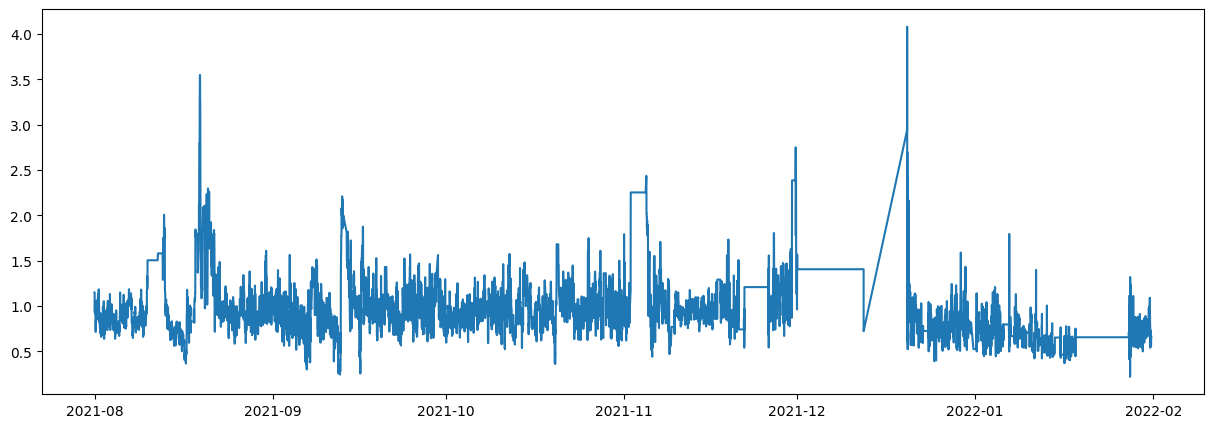

In [16]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

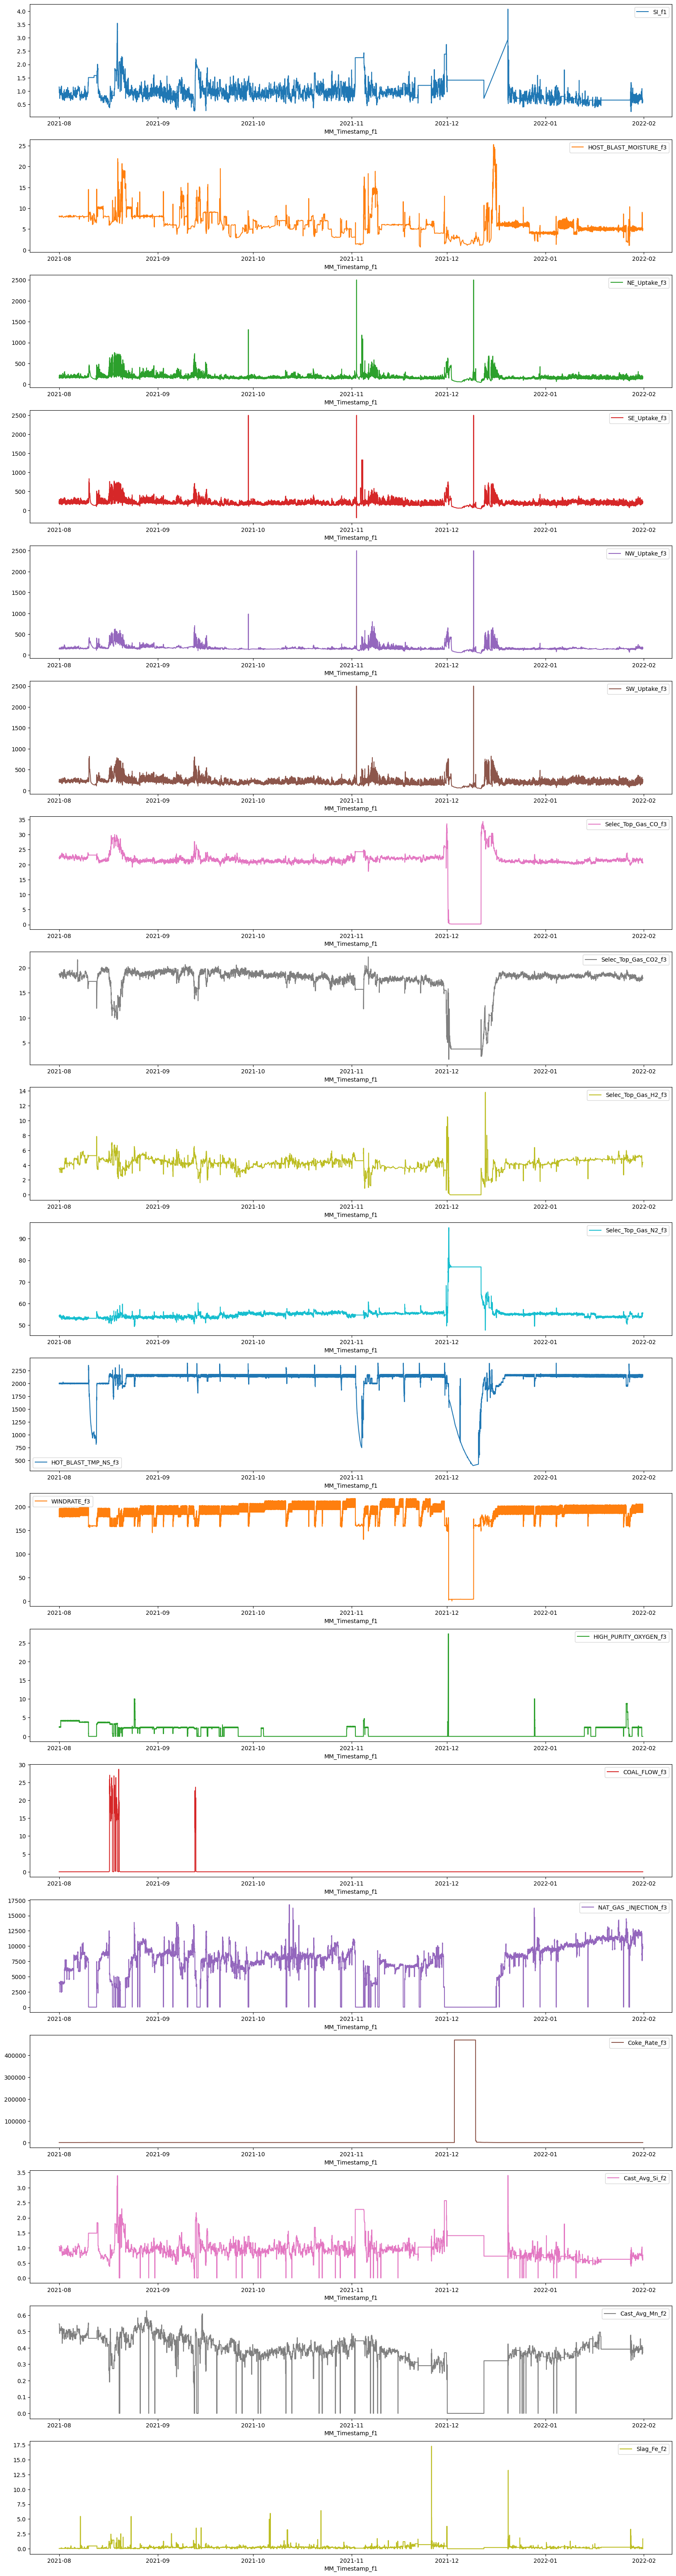

In [17]:

## layout=(4, 3), 
## style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
## xticks=np.arange(0, len(df), 16)

## for_RNN_data_CIVS.plot( xticks=rc22, figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [18]:

l_new


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

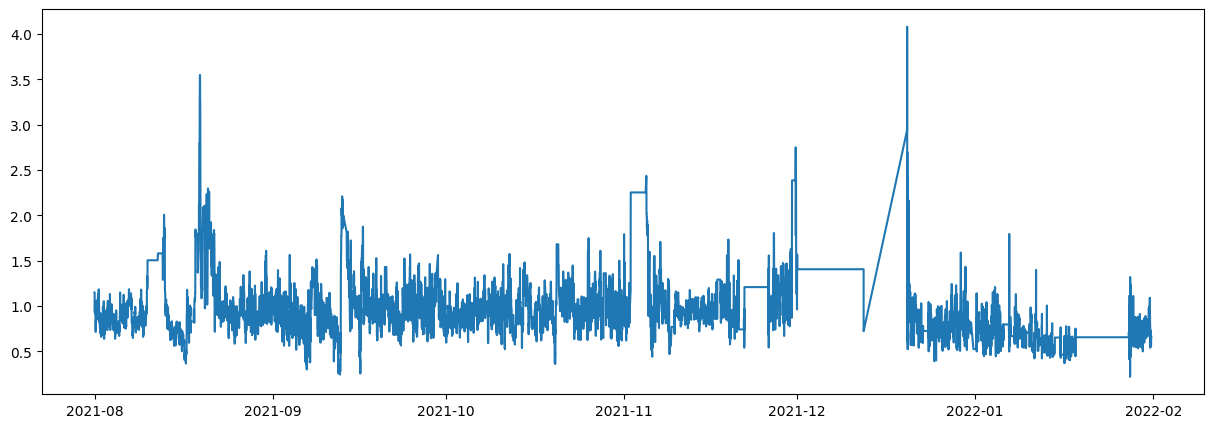

In [19]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


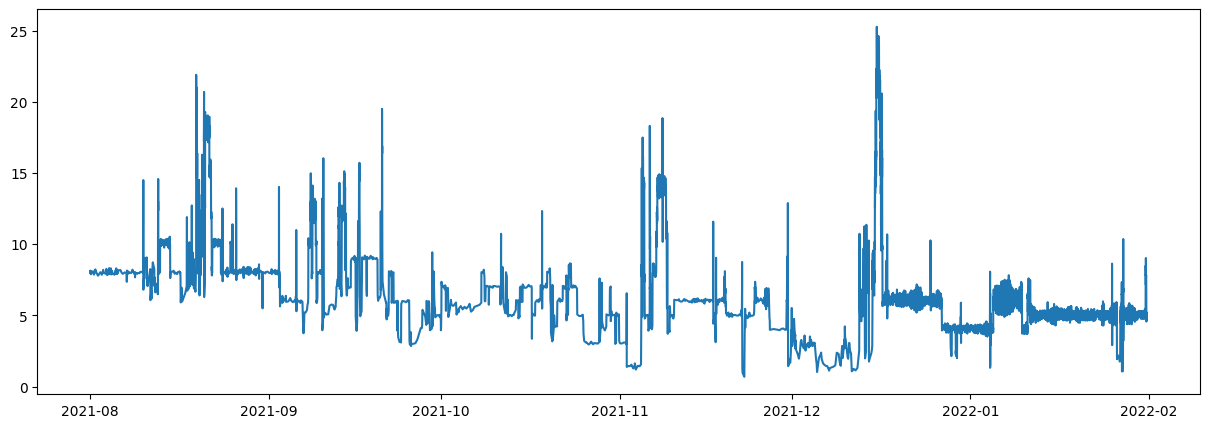

In [20]:

plt.plot(rc22, for_RNN_data_CIVS['HOST_BLAST_MOISTURE_f3'])


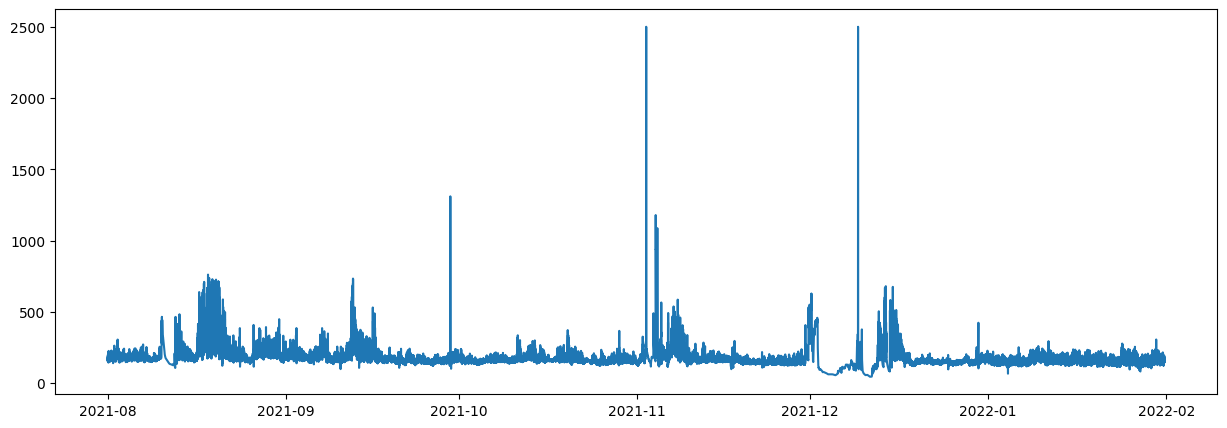

In [21]:

plt.plot(rc22, for_RNN_data_CIVS['NE_Uptake_f3'])


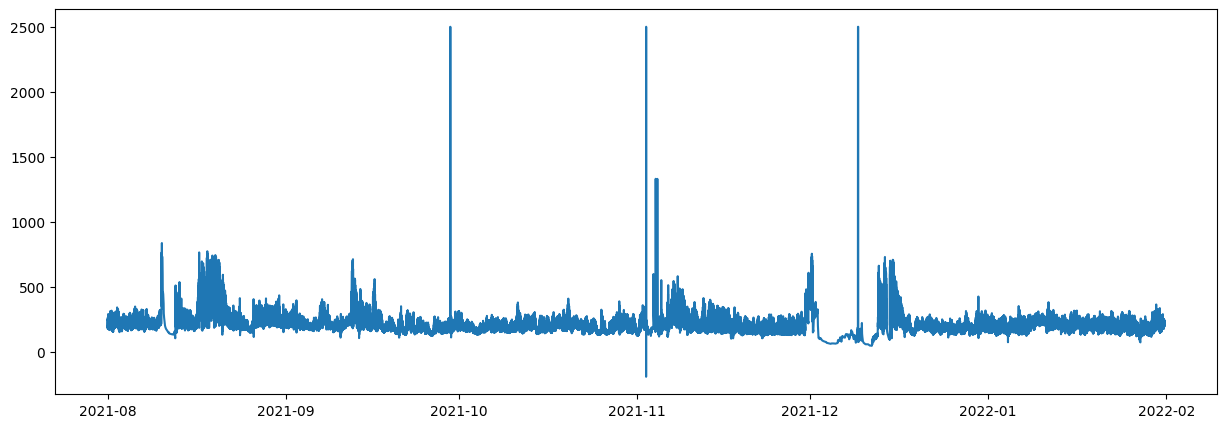

In [22]:

plt.plot(rc22, for_RNN_data_CIVS['SE_Uptake_f3'])


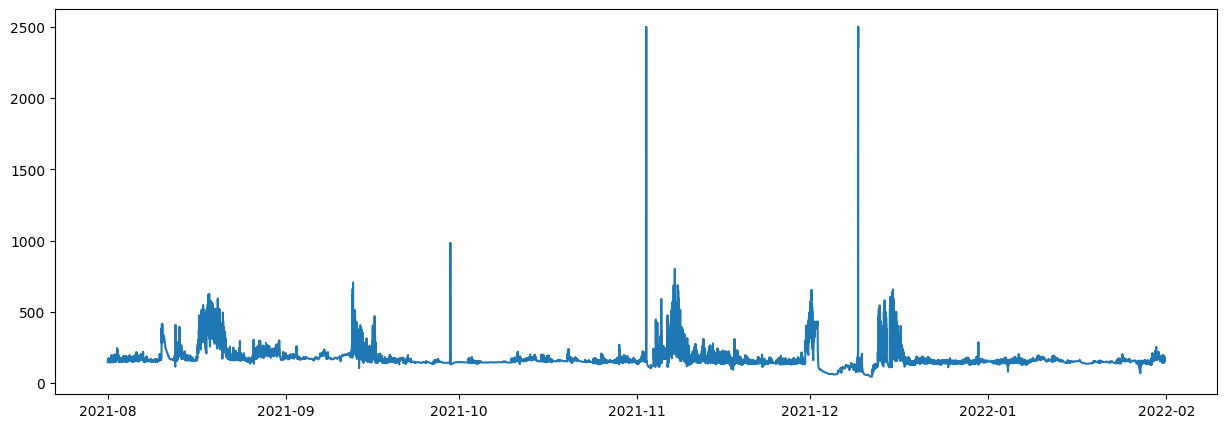

In [23]:

plt.plot(rc22, for_RNN_data_CIVS['NW_Uptake_f3'])


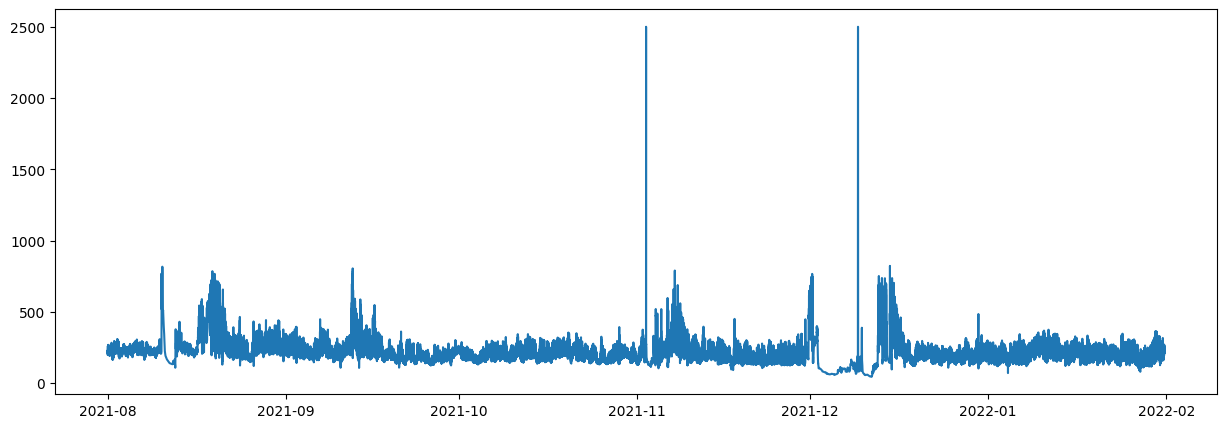

In [24]:

plt.plot(rc22, for_RNN_data_CIVS['SW_Uptake_f3'])


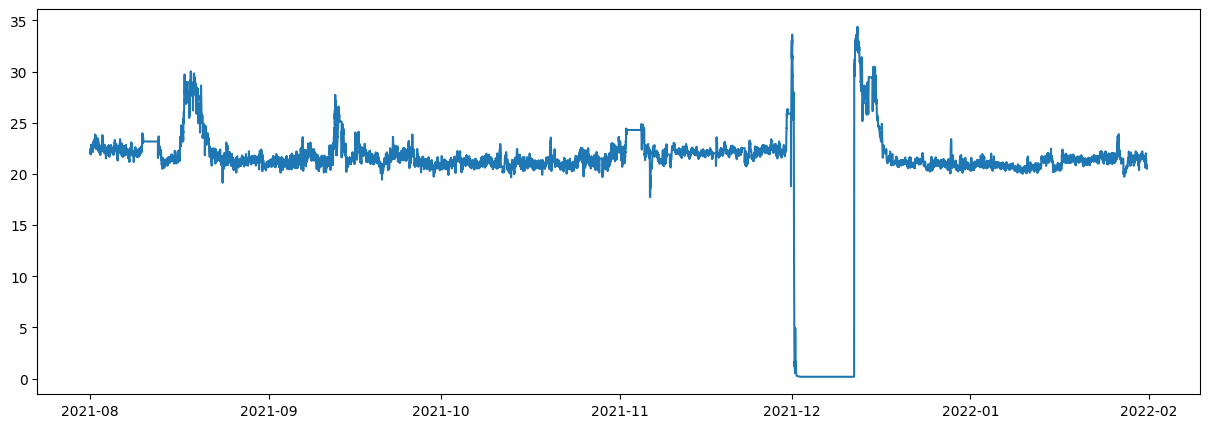

In [25]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO_f3'])


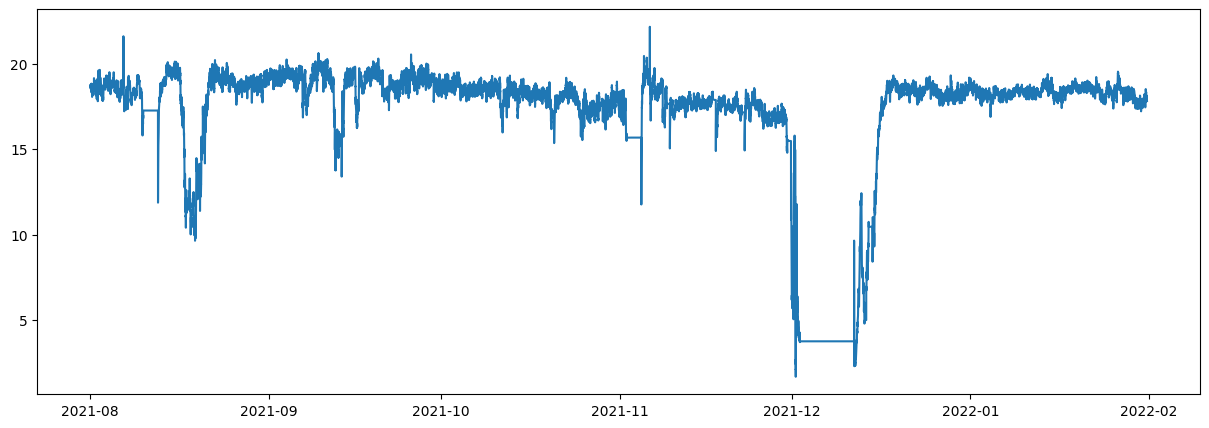

In [26]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO2_f3'])


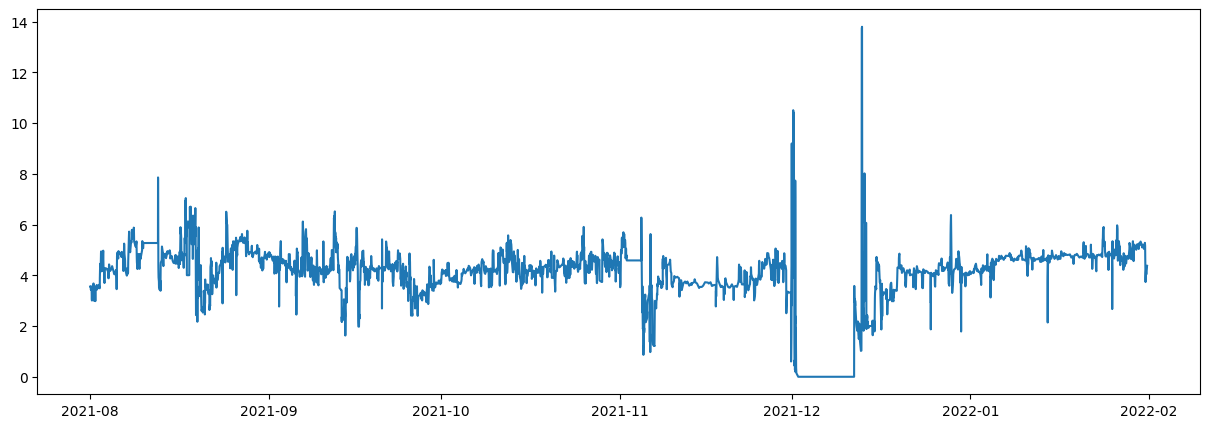

In [27]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_H2_f3'])


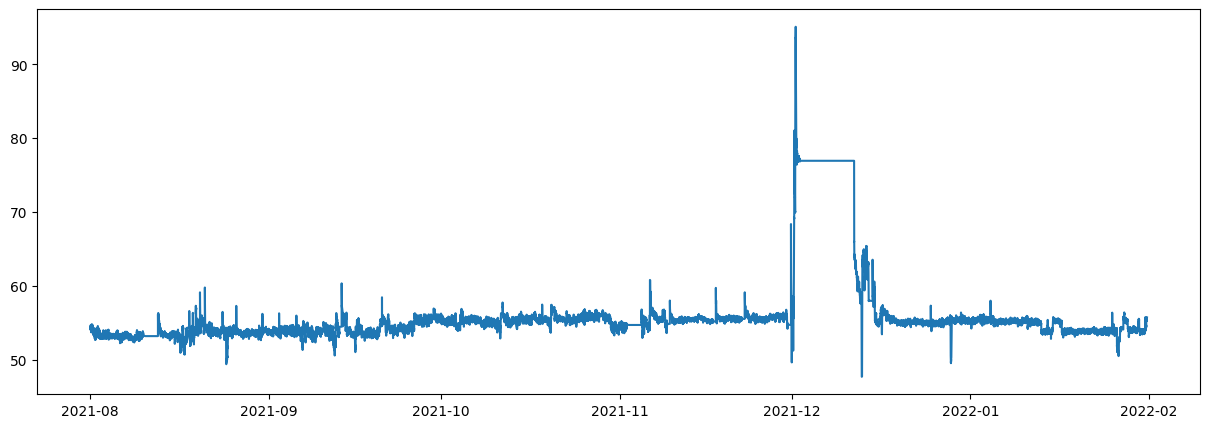

In [28]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_N2_f3'])


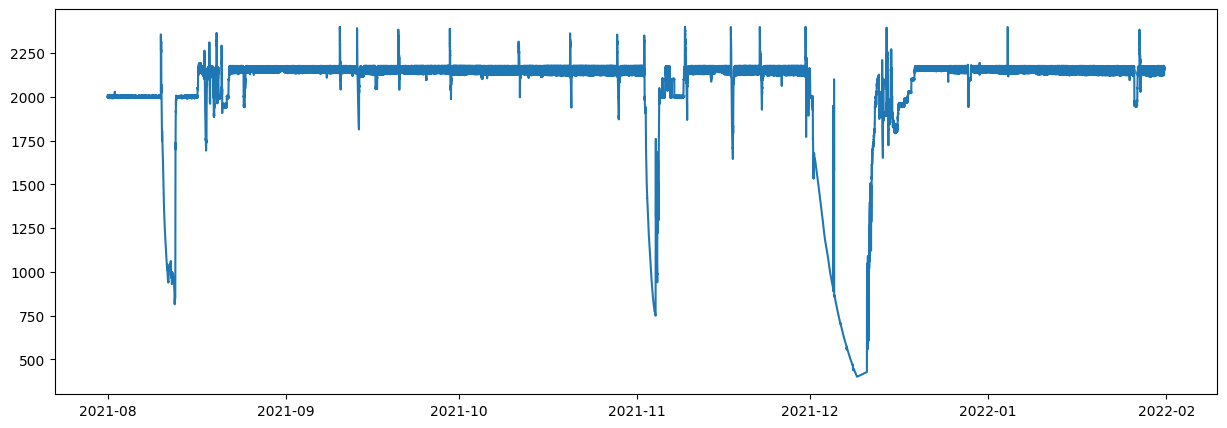

In [29]:

plt.plot(rc22, for_RNN_data_CIVS['HOT_BLAST_TMP_NS_f3'])


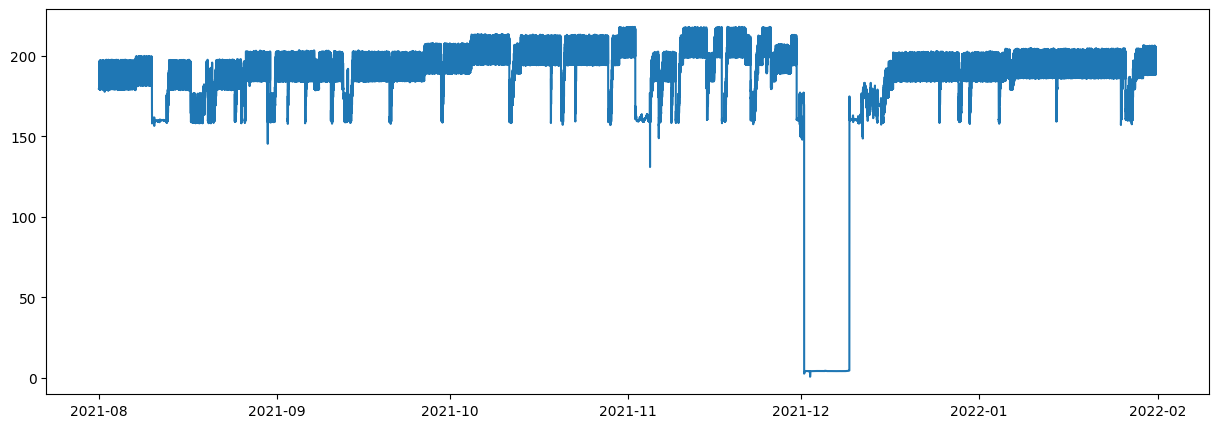

In [30]:

plt.plot(rc22, for_RNN_data_CIVS['WINDRATE_f3'])


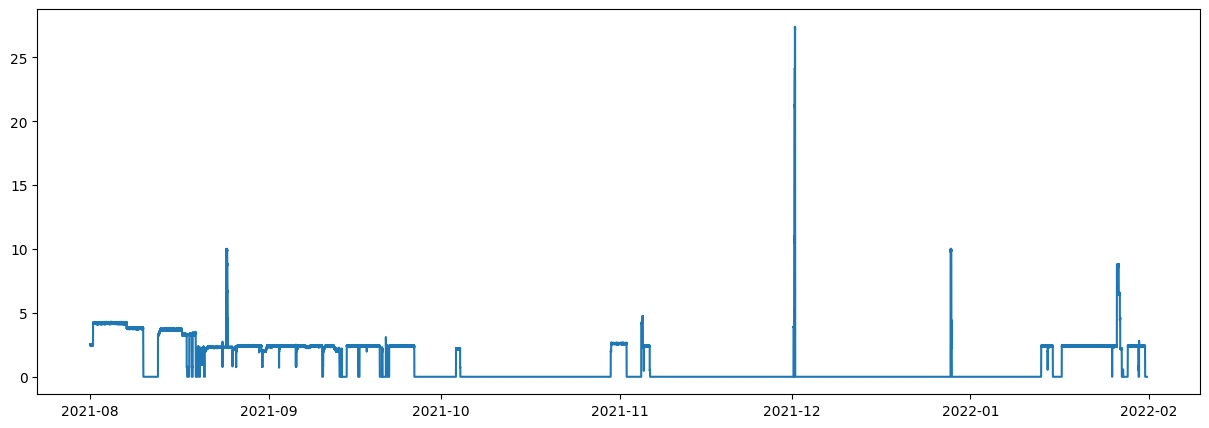

In [31]:

plt.plot(rc22, for_RNN_data_CIVS['HIGH_PURITY_OXYGEN_f3'])


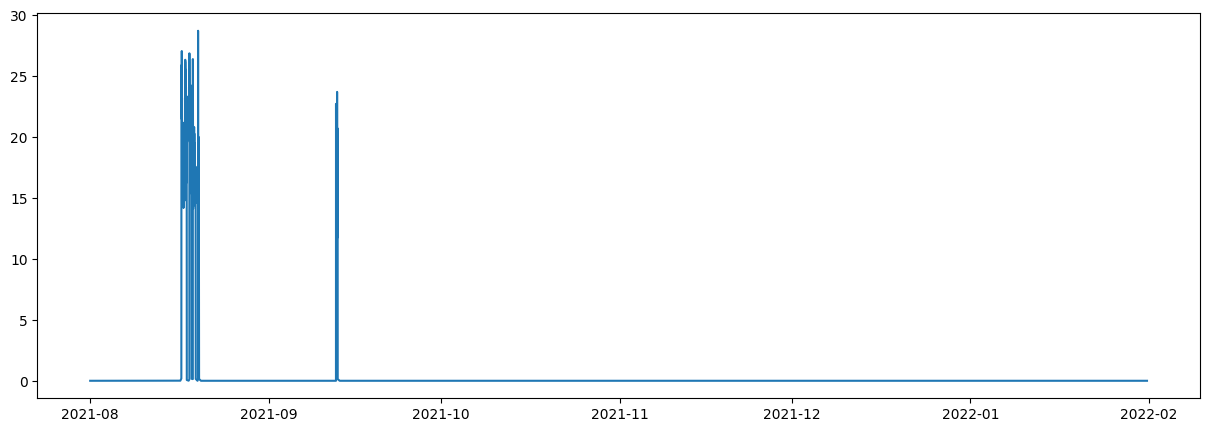

In [32]:

plt.plot(rc22, for_RNN_data_CIVS[ 'COAL_FLOW_f3'])


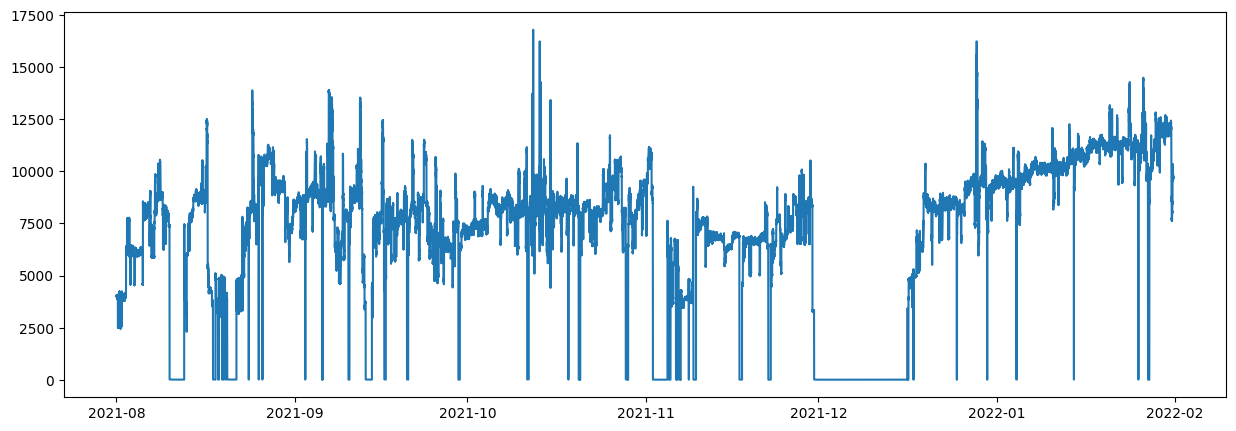

In [33]:

plt.plot(rc22, for_RNN_data_CIVS['NAT_GAS _INJECTION_f3'])


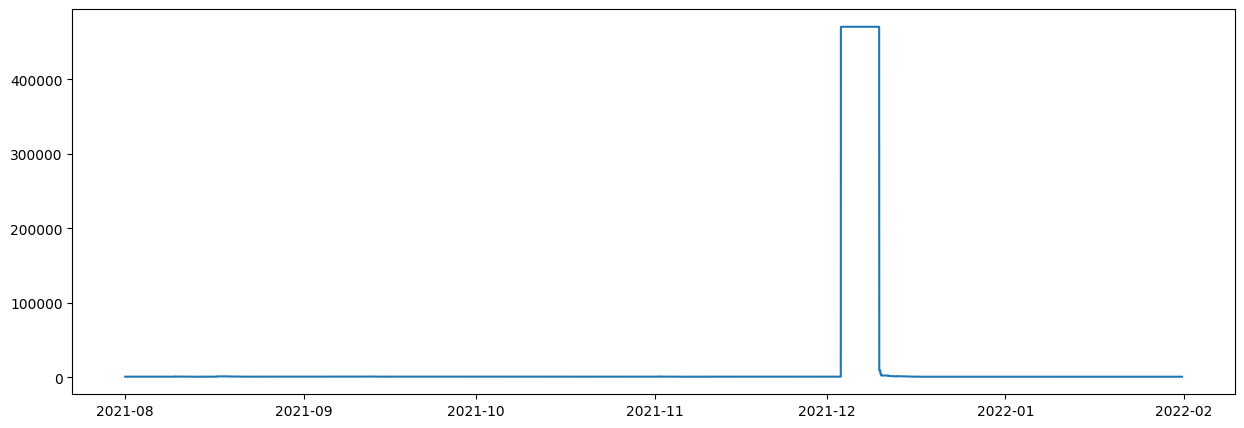

In [34]:

plt.plot(rc22, for_RNN_data_CIVS['Coke_Rate_f3'])


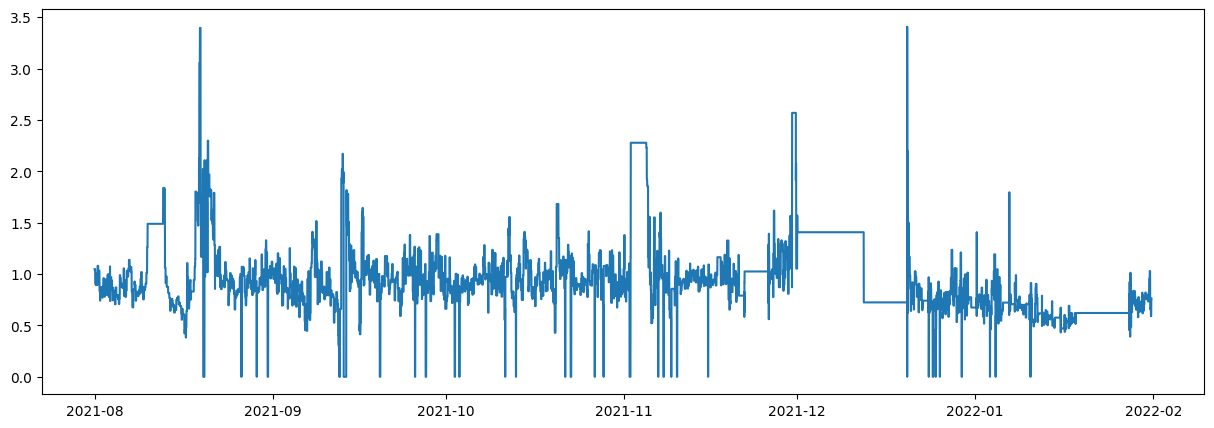

In [35]:

plt.plot(rc22, for_RNN_data_CIVS['Cast_Avg_Si_f2'])


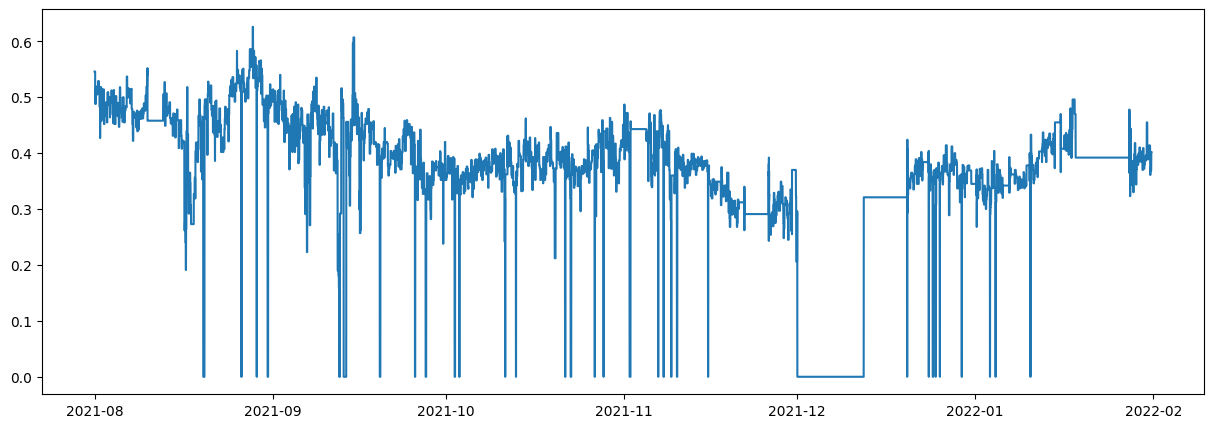

In [36]:

plt.plot(rc22, for_RNN_data_CIVS[ 'Cast_Avg_Mn_f2'])


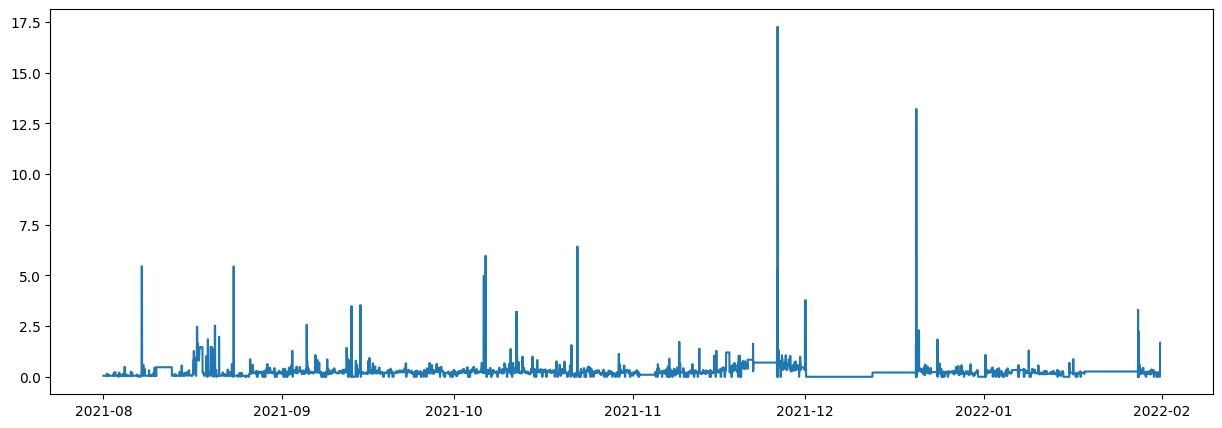

In [37]:

plt.plot(rc22, for_RNN_data_CIVS['Slag_Fe_f2'])



## Back to the Data Processing


In [38]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [39]:

## for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [40]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SI_f1                   265736 non-null  float64       
 1   MM_Timestamp_f1         265736 non-null  datetime64[ns]
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64       
 3   NE_Uptake_f3            265736 non-null  float64       
 4   SE_Uptake_f3            265736 non-null  float64       
 5   NW_Uptake_f3            265736 non-null  float64       
 6   SW_Uptake_f3            265736 non-null  float64       
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64       
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64       
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64       
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64       
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64       
 12  WINDRATE_f3             265736

In [41]:

for_RNN_data_CIVS


SI_f1     MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000 2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000 2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000 2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000 2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000 2021-08-01 00:04:00                8.064630    163.102736   
...          ...                 ...                     ...           ...   
265731  0.662065 2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446 2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826 2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207 2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587 2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4


## Iterate and mark transitions


In [42]:

for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control1',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control4',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control2',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control3',
                                value = 0)



for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              0         0         0         0  1.152000 2021-08-01 00:01:00   
2              0         0         0         0  1.152000 2021-08-01 00:02:00   
3              0         0         0         0  1.152000 2021-08-01 00:03:00   
4              0         0         0         0  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0         0         0         0  0.662065 2022-01-31 16:12:00   
265732         0         0         0         0  0.662446 2022-01-31 16:13:00   
265733         0         0         0         0  0.662826 2022-01-31 16:14:00   
265734         0         0         0         0  0.663207 2022-01-31 16:15:00   
265735         0         0         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

In [43]:

indeces_to_2500_control2 = []

indeces_to_2500 = [] 

counter_control2 = 0

counter = 500

prev_val = 0.0
    
for index, row in for_RNN_data_CIVS.iterrows():

    ## print( row["SI_f1"]  )
    #########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control1'] = counter
        counter = counter + 1
        indeces_to_2500.append( index )
    else:
        if counter > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1
            indeces_to_2500 = []
        else:
            indeces_to_2500 = []
        counter = 0

    ##########################################################################
    if row["SI_f1"] != prev_val:
        for_RNN_data_CIVS.at[index, 'control2'] = counter_control2
        counter_control2 = counter_control2 + 1
        indeces_to_2500_control2.append(  index  )
    else:
        if counter_control2 > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500_control2 ] = 1
            indeces_to_2500_control2 = []
        else:
            indeces_to_2500_control2 = []
        counter_control2 = 0

    ##########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control3'] = 1.0

    ##########################################################################
    if index  % 50000 == 0:
        print(index )
    prev_val = row["SI_f1"]
        
    

    


0
50000
100000
150000
200000
250000


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

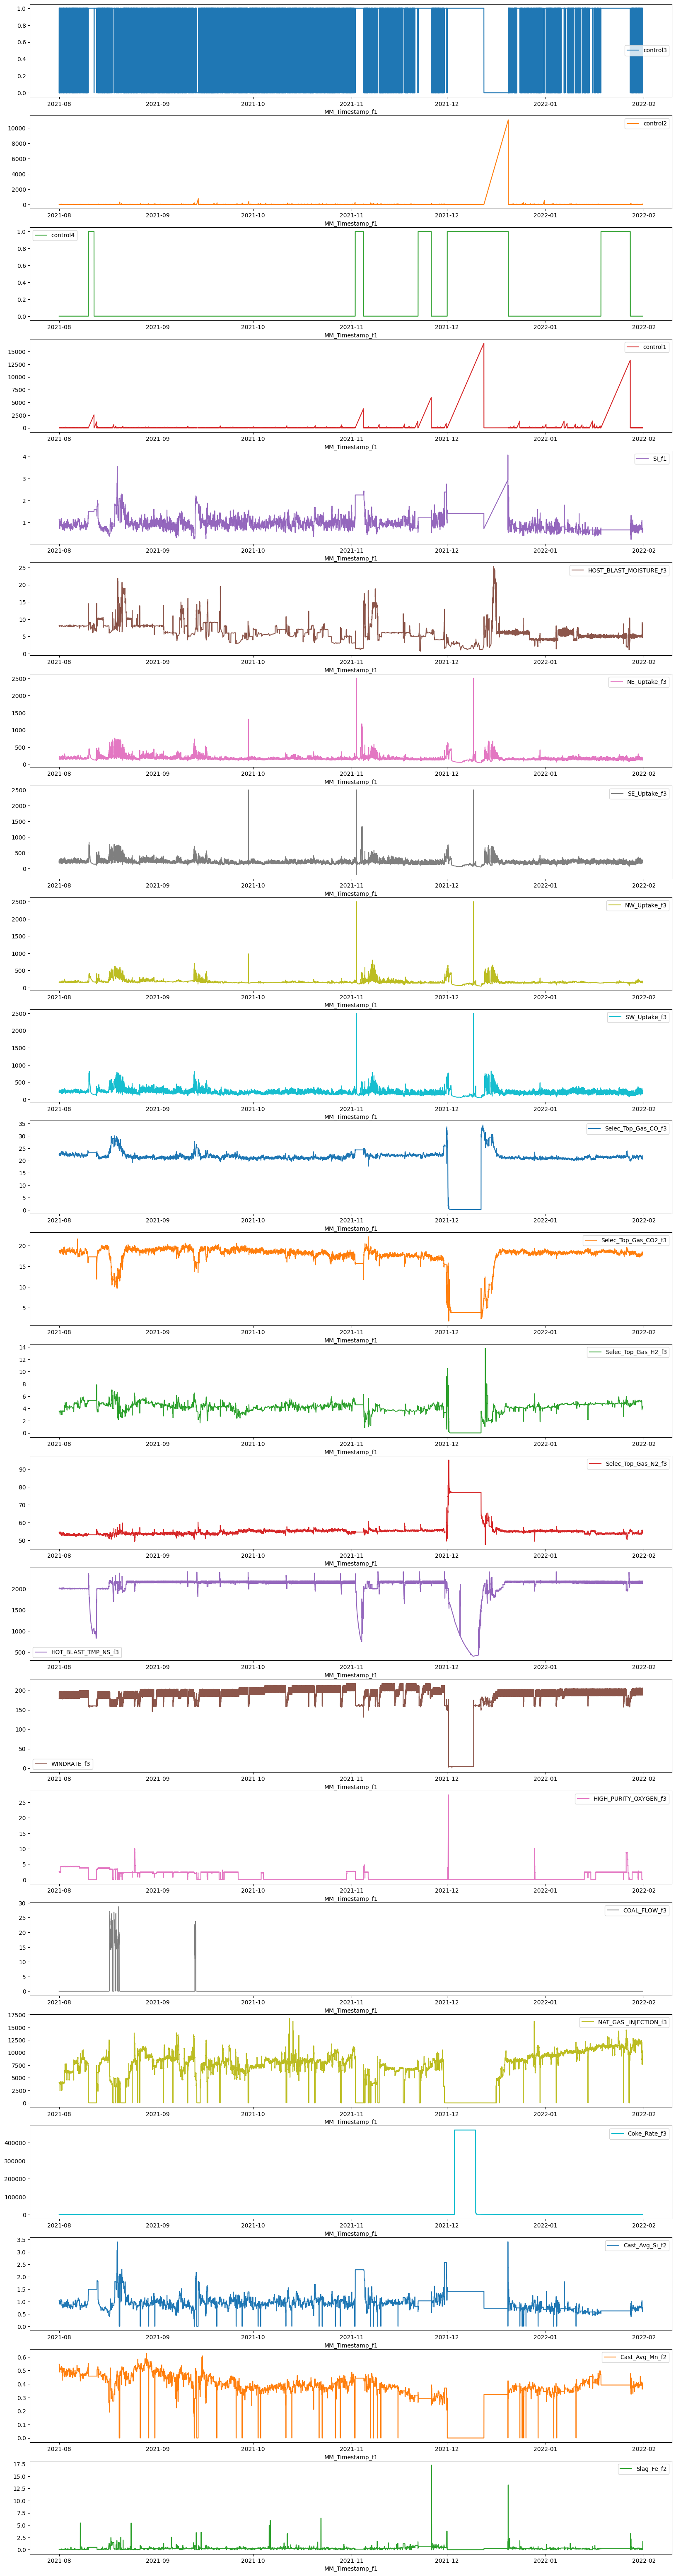

In [44]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [45]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0        57         0         0  0.662065 2022-01-31 16:12:00   
265732         0        58         0         0  0.662446 2022-01-31 16:13:00   
265733         0        59         0         0  0.662826 2022-01-31 16:14:00   
265734         0        60         0         0  0.663207 2022-01-31 16:15:00   
265735         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .


## Drop row with value above x


In [46]:

## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)

for_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one


In [47]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
212427         0        57         0         0  0.662065 2022-01-31 16:12:00   
212428         0        58         0         0  0.662446 2022-01-31 16:13:00   
212429         0        59         0         0  0.662826 2022-01-31 16:14:00   
212430         0        60         0         0  0.663207 2022-01-31 16:15:00   
212431         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
212427                5.155158    168.935281    202.117809    163.555824  ...   
212428                5.161362    170.715532    202.106673    164.493156  ...   
212429                5.167567    172.495783    205.875063    165.430489  ...   
212430                5.173771    174.440392    212.764586    166.688229  ...   
212431                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
212427            55.682915          2162.689809   188.599806   
212428            55.688159          2162.438593   188.536026   
212429            55.693057          2162.032539   189.264351   
212430            55.697567          2160.858603   189.426471   
212431            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
212427               0.000000           0.0            9680.930154   
212428               0.000000           0.0            9665.389423   
212429               0.000000           0.0            9652.217004   
212430               0.000000           0.0            9661.236786   
212431               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

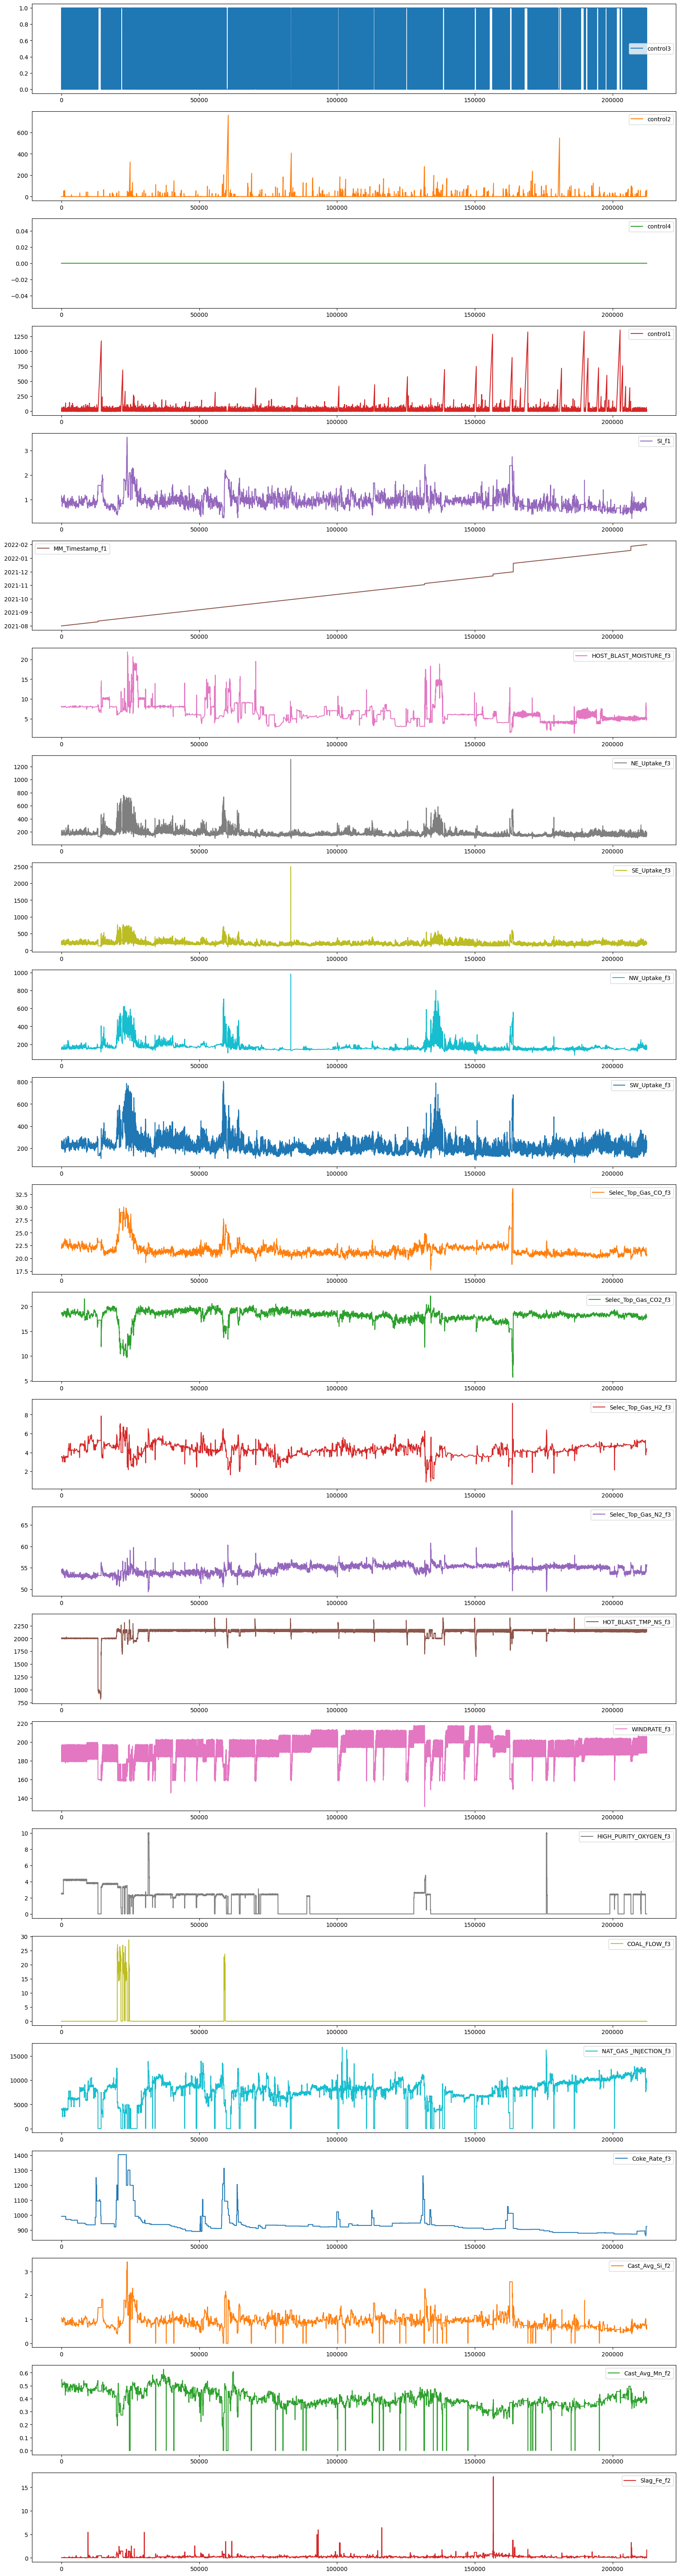

In [48]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )



## Remove date time columns 


In [49]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [50]:

for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [51]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212432 entries, 0 to 212431
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   212432 non-null  float64
 1   HOST_BLAST_MOISTURE_f3  212432 non-null  float64
 2   NE_Uptake_f3            212432 non-null  float64
 3   SE_Uptake_f3            212432 non-null  float64
 4   NW_Uptake_f3            212432 non-null  float64
 5   SW_Uptake_f3            212432 non-null  float64
 6   Selec_Top_Gas_CO_f3     212432 non-null  float64
 7   Selec_Top_Gas_CO2_f3    212432 non-null  float64
 8   Selec_Top_Gas_H2_f3     212432 non-null  float64
 9   Selec_Top_Gas_N2_f3     212432 non-null  float64
 10  HOT_BLAST_TMP_NS_f3     212432 non-null  float64
 11  WINDRATE_f3             212432 non-null  float64
 12  HIGH_PURITY_OXYGEN_f3   212432 non-null  float64
 13  COAL_FLOW_f3            212432 non-null  float64
 14  NAT_GAS _INJECTION_f

In [52]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0       1.152000                8.084517    158.478922    245.634175   
1       1.152000                8.079545    159.637733    252.459217   
2       1.152000                8.074573    160.796544    252.645736   
3       1.152000                8.069602    161.955355    247.987563   
4       1.152000                8.064630    163.102736    226.923719   
...          ...                     ...           ...           ...   
212427  0.662065                5.155158    168.935281    202.117809   
212428  0.662446                5.161362    170.715532    202.106673   
212429  0.662826                5.167567    172.495783    205.875063   
212430  0.663207                5.173771    174.440392    212.764586   
212431  0.663587                5.179976    178.348950    219.654109   

        NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0         145.396538    220.717349            22.322068             18.729296   
1         145.570895    226.360600            22.335329             18.731320   
2         145.745252    230.297540            22.348590             18.733343   
3         145.919609    225.220292            22.361852             18.735367   
4         146.093966    218.827693            22.375113             18.737391   
...              ...           ...                  ...                   ...   
212427    163.555824    219.714757            20.510372             17.817248   
212428    164.493156    220.911245            20.510606             17.815391   
212429    165.430489    222.902059            20.510840             17.813534   
212430    166.688229    232.269437            20.511074             17.811677   
212431    170.012230    243.436510            20.511309             17.809820   

        Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                  3.559210            54.250139          1999.604384   
1                  3.559234            54.194257          2000.288837   
2                  3.559259            54.138374          1999.242862   
3                  3.559284            54.082797          1999.884442   
4                  3.559309            54.063779          1999.849729   
...                     ...                  ...                  ...   
212427             4.376637            55.682915          2162.689809   
212428             4.376798            55.688159          2162.438593   
212429             4.376959            55.693057          2162.032539   
212430             4.377119            55.697567          2160.858603   
212431             4.377280            55.698785          2159.580246   

        WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0        179.749638               2.510680           0.0   
1        179.765945               2.489381           0.0   
2        179.782251               2.489037           0.0   
3        179.798490               2.496867           0.0   
4        179.784430               2.501961           0.0   
...             ...                    ...           ...   
212427   188.599806               0.000000           0.0   
212428   188.536026               0.000000           0.0   
212429   189.264351               0.000000           0.0   
212430   189.426471               0.000000           0.0   
212431   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992           1.048           0.546   
4                 4000.467204           992           1.048           0.546   
...                       ...           ...             ...             ...   
212427            9680


## Average the rows to control time step


In [53]:

window                 = 3    ## 90   ## 30          ## seq length

silicon_feature_index  = 0

avg_the_rows_parameter =   2  ## 15




## 1    ->  1 minute time step
## 15   -> 15 minute time step
## 1440 -> 24 hour time step
## 480  -> 8 hour shift
## 60   -> 1 hour time step



## Sanity check


In [54]:



data = [
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30]
]



df_example = pd.DataFrame( data, columns=['a', 'b', 'c', 'd'] )
 

print(df_example)


     a   b   c   d
0   20   9  15  47
1    2  50  25  26
2    4  11  38  44
3    6  33  16  25
4    8  37  27  25
5   10  28  48  32
6   12  47  35  45
7   14   8  16   7
8   16  12  16  30
9   18  22  39  29
10  20   9  15  47
11  20   9  15  47
12   2  50  25  26
13   4  11  38  44
14   6  33  16  25
15   8  37  27  25
16  10  28  48  32
17  12  47  35  45
18  14   8  16   7
19  16  12  16  30
20  18  22  39  29
21  20   9  15  47
22   2  50  25  26
23   4  11  38  44
24   6  33  16  25
25   8  37  27  25
26  10  28  48  32
27  12  47  35  45
28  14   8  16   7
29  16  12  16  30


In [55]:

print(df_example.shape)


(30, 4)


In [56]:

avg_df_example = df_example.groupby(np.arange(len(df_example))//avg_the_rows_parameter).mean()
avg_df_example.shape


(15, 4)

In [57]:

avg_df_example


a     b     c     d
0   11.0  29.5  20.0  36.5
1    5.0  22.0  27.0  34.5
2    9.0  32.5  37.5  28.5
3   13.0  27.5  25.5  26.0
4   17.0  17.0  27.5  29.5
5   20.0   9.0  15.0  47.0
6    3.0  30.5  31.5  35.0
7    7.0  35.0  21.5  25.0
8   11.0  37.5  41.5  38.5
9   15.0  10.0  16.0  18.5
10  19.0  15.5  27.0  38.0
11   3.0  30.5  31.5  35.0
12   7.0  35.0  21.5  25.0
13  11.0  37.5  41.5  38.5
14  15.0  10.0  16.0  18.5


## Now Avg to change time step


In [58]:

## for_RNN_data_CIVS

print(for_RNN_data_CIVS.shape)


(212432, 19)


In [59]:

for_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()
for_RNN_data_CIVS.shape


(106216, 19)

In [60]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0       1.152000                8.082031    159.058328    249.046696   
1       1.152000                8.072088    161.375949    250.316649   
2       1.152000                8.062144    163.161754    215.970237   
3       1.152000                8.052201    162.395342    197.228506   
4       1.152000                8.042257    161.294769    202.768983   
...          ...                     ...           ...           ...   
106211  0.660353                5.127237    154.558102    202.248010   
106212  0.661114                5.139646    164.484653    202.166798   
106213  0.661875                5.152055    168.045155    202.127607   
106214  0.662636                5.164464    171.605658    203.990868   
106215  0.663397                5.176873    176.394671    216.209347   

        NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0         145.483717    223.538974            22.328698             18.730308   
1         145.832430    227.758916            22.355221             18.734355   
2         146.181144    215.807416            22.381744             18.738403   
3         146.529858    210.037398            22.408266             18.737987   
4         146.878572    207.783617            22.430580             18.732144   
...              ...           ...                  ...                   ...   
106211    156.469227    214.330562            20.509319             17.825891   
106212    161.212492    216.723537            20.509787             17.821890   
106213    163.087158    219.116513            20.510255             17.818176   
106214    164.961823    221.906652            20.510723             17.814462   
106215    168.350229    237.852974            20.511192             17.810748   

        Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                  3.559222            54.222198          1999.946611   
1                  3.559271            54.110585          1999.563652   
2                  3.559321            54.066862          1999.832373   
3                  3.559370            54.079194          1999.762948   
4                  3.559420            54.091526          1999.693522   
...                     ...                  ...                  ...   
106211             4.375914            55.671521          2163.820282   
106212             4.376236            55.677221          2163.317850   
106213             4.376557            55.680074          2162.815417   
106214             4.376878            55.690608          2162.235566   
106215             4.377199            55.698176          2160.219425   

        WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0        179.757791               2.500030           0.0   
1        179.790371               2.492952           0.0   
2        179.764876               2.499558           0.0   
3        179.686662               2.493282           0.0   
4        179.608448               2.496593           0.0   
...             ...                    ...           ...   
106211   189.487291               0.000000           0.0   
106212   189.112815               0.000000           0.0   
106213   188.631696               0.000000           0.0   
106214   188.900189               0.000000           0.0   
106215   189.294926               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4029.590858         992.0           1.048           0.546   
1                 4011.813157         992.0           1.048           0.546   
2                 3999.010402         992.0           1.048           0.546   
3                 4035.416067         992.0           1.048           0.546   
4                 4035.080645         992.0           1.048           0.546   
...                       ...           ...             ...             ...   
106211            9726


## Create datasets of selected features


In [61]:

pd.options.display.max_columns = None


In [62]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'xt_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## Make Data Sequential


In [63]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(106216, 19)
Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       106203, 106204, 106205, 106206, 106207, 106208, 106209, 106210, 106211,
       106212],
      dtype='int64', length=106213)
(106213,)
(106213, 3, 19)
(106213, 57)
(106213, 19)


In [64]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1   xt_1_fx_2   xt_1_fx_3   xt_1_fx_4   xt_1_fx_5  \
0        1.152000   8.082031  159.058328  249.046696  145.483717  223.538974   
1        1.152000   8.072088  161.375949  250.316649  145.832430  227.758916   
2        1.152000   8.062144  163.161754  215.970237  146.181144  215.807416   
3        1.152000   8.052201  162.395342  197.228506  146.529858  210.037398   
4        1.152000   8.042257  161.294769  202.768983  146.878572  207.783617   
...           ...        ...         ...         ...         ...         ...   
106208   0.658071   5.090011  178.753353  229.283298  170.801665  241.292097   
106209   0.658832   5.102420  175.116715  233.824207  169.955463  244.185441   
106210   0.659592   5.114828  155.759714  215.835806  158.462805  225.118840   
106211   0.660353   5.127237  154.558102  202.248010  156.469227  214.330562   
106212   0.661114   5.139646  164.484653  202.166798  161.212492  216.723537   

        xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9   xt_1_fx_10  xt_1_fx_11  \
0       22.328698  18.730308   3.559222  54.222198  1999.946611  179.757791   
1       22.355221  18.734355   3.559271  54.110585  1999.563652  179.790371   
2       22.381744  18.738403   3.559321  54.066862  1999.832373  179.764876   
3       22.408266  18.737987   3.559370  54.079194  1999.762948  179.686662   
4       22.430580  18.732144   3.559420  54.091526  1999.693522  179.608448   
...           ...        ...        ...        ...          ...         ...   
106208  20.508241  17.845761   4.374951  55.625427  2161.332275  189.236389   
106209  20.508383  17.844108   4.375272  55.640646  2163.313313  189.076841   
106210  20.508851  17.834648   4.375593  55.656084  2164.308027  188.556210   
106211  20.509319  17.825891   4.375914  55.671521  2163.820282  189.487291   
106212  20.509787  17.821890   4.376236  55.677221  2163.317850  189.112815   

        xt_1_fx_12  xt_1_fx_13   xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  \
0         2.500030         0.0  4029.590858       992.0       1.048   
1         2.492952         0.0  4011.813157       992.0       1.048   
2         2.499558         0.0  3999.010402       992.0       1.048   
3         2.493282         0.0  4035.416067       992.0       1.048   
4         2.496593         0.0  4035.080645       992.0       1.048   
...            ...         ...          ...         ...         ...   
106208    0.000000         0.0  9686.321083       924.0       0.762   
106209    0.000000         0.0  9688.569821       924.0       0.762   
106210    0.000000         0.0  9764.962869       924.0       0.762   
106211    0.000000         0.0  9726.924678       924.0       0.762   
106212    0.000000         0.0  9703.209742       924.0       0.762   

        xt_1_fx_17  xt_1_fx_18  xt_2_fx_0  xt_2_fx_1   xt_2_fx_2   xt_2_fx_3  \
0            0.546        0.05   1.152000   8.072088  161.375949  250.316649   
1            0.546        0.05   1.152000   8.062144  163.161754  215.970237   
2            0.546        0.05   1.152000   8.052201  162.395342  197.228506   
3            0.546        0.05   1.152000   8.042257  161.294769  202.768983   
4            0.546        0.05   1.152000   8.032314  160.194197  208.753699   
...            ...         ...        ...        ...         ...         ...   
106208       0.402        1.68   0.658832   5.102420  175.116715  233.824207   
106209       0.402        1.68   0.659592   5.114828  155.759714  215.835806   
106210       0.402        1.68   0.660353   5.127237  154.558102  202.248010   
106211       0.402        1.68   0.661114   5.139646  164.484653  202.166798   
106212       0.402        1.68   0.661875   5.152055  168.045155  202.127607   

         xt_2_fx_4   xt_2_fx_5  xt_2_fx_6  xt_2_fx_7  xt_2_fx_8  xt_2_fx_9  \
0       145.832430  227.758916  22.355221  18.734355   3.559271  54.110585   
1       146.181144  215.807416  22.381744  18.738403   3.559321  54.066862   
2       146.529858  210.037398  22.408266  18.7379

In [65]:

print( res_multi_feature_df.shape )


(106213, 76)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [66]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(106213, 73)


In [67]:

print( res_multi_feature_df.shape )


(106213, 73)


In [68]:

res_multi_feature_df


xt_1_fx_1   xt_1_fx_2   xt_1_fx_3   xt_1_fx_4   xt_1_fx_5  xt_1_fx_6  \
0        8.082031  159.058328  249.046696  145.483717  223.538974  22.328698   
1        8.072088  161.375949  250.316649  145.832430  227.758916  22.355221   
2        8.062144  163.161754  215.970237  146.181144  215.807416  22.381744   
3        8.052201  162.395342  197.228506  146.529858  210.037398  22.408266   
4        8.042257  161.294769  202.768983  146.878572  207.783617  22.430580   
...           ...         ...         ...         ...         ...        ...   
106208   5.090011  178.753353  229.283298  170.801665  241.292097  20.508241   
106209   5.102420  175.116715  233.824207  169.955463  244.185441  20.508383   
106210   5.114828  155.759714  215.835806  158.462805  225.118840  20.508851   
106211   5.127237  154.558102  202.248010  156.469227  214.330562  20.509319   
106212   5.139646  164.484653  202.166798  161.212492  216.723537  20.509787   

        xt_1_fx_7  xt_1_fx_8  xt_1_fx_9   xt_1_fx_10  xt_1_fx_11  xt_1_fx_12  \
0       18.730308   3.559222  54.222198  1999.946611  179.757791    2.500030   
1       18.734355   3.559271  54.110585  1999.563652  179.790371    2.492952   
2       18.738403   3.559321  54.066862  1999.832373  179.764876    2.499558   
3       18.737987   3.559370  54.079194  1999.762948  179.686662    2.493282   
4       18.732144   3.559420  54.091526  1999.693522  179.608448    2.496593   
...           ...        ...        ...          ...         ...         ...   
106208  17.845761   4.374951  55.625427  2161.332275  189.236389    0.000000   
106209  17.844108   4.375272  55.640646  2163.313313  189.076841    0.000000   
106210  17.834648   4.375593  55.656084  2164.308027  188.556210    0.000000   
106211  17.825891   4.375914  55.671521  2163.820282  189.487291    0.000000   
106212  17.821890   4.376236  55.677221  2163.317850  189.112815    0.000000   

        xt_1_fx_13   xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0              0.0  4029.590858       992.0       1.048       0.546   
1              0.0  4011.813157       992.0       1.048       0.546   
2              0.0  3999.010402       992.0       1.048       0.546   
3              0.0  4035.416067       992.0       1.048       0.546   
4              0.0  4035.080645       992.0       1.048       0.546   
...            ...          ...         ...         ...         ...   
106208         0.0  9686.321083       924.0       0.762       0.402   
106209         0.0  9688.569821       924.0       0.762       0.402   
106210         0.0  9764.962869       924.0       0.762       0.402   
106211         0.0  9726.924678       924.0       0.762       0.402   
106212         0.0  9703.209742       924.0       0.762       0.402   

        xt_1_fx_18  xt_2_fx_1   xt_2_fx_2   xt_2_fx_3   xt_2_fx_4   xt_2_fx_5  \
0             0.05   8.072088  161.375949  250.316649  145.832430  227.758916   
1             0.05   8.062144  163.161754  215.970237  146.181144  215.807416   
2             0.05   8.052201  162.395342  197.228506  146.529858  210.037398   
3             0.05   8.042257  161.294769  202.768983  146.878572  207.783617   
4             0.05   8.032314  160.194197  208.753699  147.227286  205.529836   
...            ...        ...         ...         ...         ...         ...   
106208        1.68   5.102420  175.116715  233.824207  169.955463  244.185441   
106209        1.68   5.114828  155.759714  215.835806  158.462805  225.118840   
106210        1.68   5.127237  154.558102  202.248010  156.469227  214.330562   
106211        1.68   5.139646  164.484653  202.166798  161.212492  216.723537   
106212        1.68   5.152055  168.045155  202.127607  163.087158  219.116513   

        xt_2_fx_6  xt_2_fx_7  xt_2_fx_8  xt_2_fx_9   xt_2_fx_10  xt_2_fx_11  \
0       22.355221  18.734355   3.559271  54.110585  1999.563652  179.790371   
1       22.381744  18.738403   3.559321  54.066862  1999.832373  179.764876   
2       22.408266  18.7


## Drop last in X input sequence

* predict the one not seen , i think




In [69]:

window_str = str(window)
window_str


'3'

In [70]:

string_match_last_seq = "xt_" + window_str
string_match_last_seq 


'xt_3'

In [71]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(106213, 55)


In [72]:

print( res_multi_feature_df.shape )


(106213, 55)


In [73]:

res_multi_feature_df


xt_1_fx_1   xt_1_fx_2   xt_1_fx_3   xt_1_fx_4   xt_1_fx_5  xt_1_fx_6  \
0        8.082031  159.058328  249.046696  145.483717  223.538974  22.328698   
1        8.072088  161.375949  250.316649  145.832430  227.758916  22.355221   
2        8.062144  163.161754  215.970237  146.181144  215.807416  22.381744   
3        8.052201  162.395342  197.228506  146.529858  210.037398  22.408266   
4        8.042257  161.294769  202.768983  146.878572  207.783617  22.430580   
...           ...         ...         ...         ...         ...        ...   
106208   5.090011  178.753353  229.283298  170.801665  241.292097  20.508241   
106209   5.102420  175.116715  233.824207  169.955463  244.185441  20.508383   
106210   5.114828  155.759714  215.835806  158.462805  225.118840  20.508851   
106211   5.127237  154.558102  202.248010  156.469227  214.330562  20.509319   
106212   5.139646  164.484653  202.166798  161.212492  216.723537  20.509787   

        xt_1_fx_7  xt_1_fx_8  xt_1_fx_9   xt_1_fx_10  xt_1_fx_11  xt_1_fx_12  \
0       18.730308   3.559222  54.222198  1999.946611  179.757791    2.500030   
1       18.734355   3.559271  54.110585  1999.563652  179.790371    2.492952   
2       18.738403   3.559321  54.066862  1999.832373  179.764876    2.499558   
3       18.737987   3.559370  54.079194  1999.762948  179.686662    2.493282   
4       18.732144   3.559420  54.091526  1999.693522  179.608448    2.496593   
...           ...        ...        ...          ...         ...         ...   
106208  17.845761   4.374951  55.625427  2161.332275  189.236389    0.000000   
106209  17.844108   4.375272  55.640646  2163.313313  189.076841    0.000000   
106210  17.834648   4.375593  55.656084  2164.308027  188.556210    0.000000   
106211  17.825891   4.375914  55.671521  2163.820282  189.487291    0.000000   
106212  17.821890   4.376236  55.677221  2163.317850  189.112815    0.000000   

        xt_1_fx_13   xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0              0.0  4029.590858       992.0       1.048       0.546   
1              0.0  4011.813157       992.0       1.048       0.546   
2              0.0  3999.010402       992.0       1.048       0.546   
3              0.0  4035.416067       992.0       1.048       0.546   
4              0.0  4035.080645       992.0       1.048       0.546   
...            ...          ...         ...         ...         ...   
106208         0.0  9686.321083       924.0       0.762       0.402   
106209         0.0  9688.569821       924.0       0.762       0.402   
106210         0.0  9764.962869       924.0       0.762       0.402   
106211         0.0  9726.924678       924.0       0.762       0.402   
106212         0.0  9703.209742       924.0       0.762       0.402   

        xt_1_fx_18  xt_2_fx_1   xt_2_fx_2   xt_2_fx_3   xt_2_fx_4   xt_2_fx_5  \
0             0.05   8.072088  161.375949  250.316649  145.832430  227.758916   
1             0.05   8.062144  163.161754  215.970237  146.181144  215.807416   
2             0.05   8.052201  162.395342  197.228506  146.529858  210.037398   
3             0.05   8.042257  161.294769  202.768983  146.878572  207.783617   
4             0.05   8.032314  160.194197  208.753699  147.227286  205.529836   
...            ...        ...         ...         ...         ...         ...   
106208        1.68   5.102420  175.116715  233.824207  169.955463  244.185441   
106209        1.68   5.114828  155.759714  215.835806  158.462805  225.118840   
106210        1.68   5.127237  154.558102  202.248010  156.469227  214.330562   
106211        1.68   5.139646  164.484653  202.166798  161.212492  216.723537   
106212        1.68   5.152055  168.045155  202.127607  163.087158  219.116513   

        xt_2_fx_6  xt_2_fx_7  xt_2_fx_8  xt_2_fx_9   xt_2_fx_10  xt_2_fx_11  \
0       22.355221  18.734355   3.559271  54.110585  1999.563652  179.790371   
1       22.381744  18.738403   3.559321  54.066862  1999.832373  179.764876   
2       22.408266  18.7


## Need to adjust windows based on previous step


In [74]:


window = window - 1
window


2


## Utility Functions


In [75]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        the_sigma = self.sigma[-19:]
        the_mu    = self.mu[-19:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [76]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [77]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [78]:

train_si


xt_1_fx_1  xt_1_fx_2  xt_1_fx_3  xt_1_fx_4  xt_1_fx_5  xt_1_fx_6  \
0       0.466324  -0.482246   0.493200  -0.599738  -0.041734   0.380700   
1       0.462152  -0.442880   0.512864  -0.593403   0.021443   0.399225   
2       0.457979  -0.412547  -0.018961  -0.587069  -0.157482   0.417749   
3       0.453807  -0.425565  -0.309160  -0.580734  -0.243864   0.436274   
4       0.449634  -0.444259  -0.223371  -0.574399  -0.277605   0.451858   
...          ...        ...        ...        ...        ...        ...   
67972   3.201549   1.152756   0.901445   2.084007   1.046812   0.163589   
67973   3.179348   1.209241   0.856701   2.142328   1.022081   0.157917   
67974   3.157148   1.389144   0.925521   1.933517   0.989227   0.150510   
67975   3.134947   1.036629   0.877189   1.567989   0.680794   0.142392   
67976   3.112746   2.020372   2.071620   2.700468   1.630338   0.134275   

       xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  xt_1_fx_12  \
0       0.299423  -1.030962  -0.198928   -0.923504   -0.496792    0.573643   
1       0.302230  -1.030892  -0.301450   -0.926444   -0.493729    0.569025   
2       0.305036  -1.030822  -0.341613   -0.924381   -0.496126    0.573335   
3       0.304748  -1.030752  -0.330285   -0.924914   -0.503478    0.569241   
4       0.300696  -1.030682  -0.318957   -0.925447   -0.510830    0.571400   
...          ...        ...        ...         ...         ...         ...   
67972  -0.058195  -0.870725   0.650085   -0.924223   -0.023100   -1.057506   
67973  -0.092067  -0.870688   0.639745   -0.922610   -0.017896   -1.057506   
67974  -0.149309  -0.870651   0.636729   -0.920997   -0.012827   -1.057506   
67975  -0.254935  -0.870613   0.639389   -0.919384   -0.007759   -1.057506   
67976  -0.312452  -0.870576   0.642048   -0.917772   -0.002690   -1.057506   

       xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  xt_1_fx_18  \
0       -0.155237   -1.168752    0.342668    0.258167    1.501940   -0.476525   
1       -0.155237   -1.175399    0.342668    0.258167    1.501940   -0.476525   
2       -0.155237   -1.180186    0.342668    0.258167    1.501940   -0.476525   
3       -0.155237   -1.166574    0.342668    0.258167    1.501940   -0.476525   
4       -0.155237   -1.166699    0.342668    0.258167    1.501940   -0.476525   
...           ...         ...         ...         ...         ...         ...   
67972   -0.155237   -1.368528   -0.341251    0.384155   -0.048269   -0.279730   
67973   -0.155237   -1.366169   -0.341251    0.384155   -0.048269   -0.279730   
67974   -0.155237   -1.367162   -0.341251    0.384155   -0.048269   -0.279730   
67975   -0.155237   -1.363369   -0.341251    0.384155   -0.048269   -0.279730   
67976   -0.155237   -1.367850   -0.341251    0.384155   -0.048269   -0.279730   

       xt_2_fx_1  xt_2_fx_2  xt_2_fx_3  xt_2_fx_4  xt_2_fx_5  xt_2_fx_6  \
0       0.462081  -0.442904   0.512812  -0.593415   0.021410   0.399229   
1       0.457909  -0.412573  -0.018989  -0.587081  -0.157508   0.417753   
2       0.453737  -0.425590  -0.309176  -0.580747  -0.243888   0.436278   
3       0.449565  -0.444283  -0.223391  -0.574413  -0.277628   0.451862   
4       0.445392  -0.462976  -0.130726  -0.568079  -0.311368   0.437907   
...          ...        ...        ...        ...        ...        ...   
67972   3.179092   1.209140   0.856633   2.142110   1.022015   0.157921   
67973   3.156892   1.389035   0.925450   1.933315   0.989162   0.150514   
67974   3.134693   1.036536   0.877121   1.567814   0.680739   0.142396   
67975   3.112494   2.020233   2.071499   2.700207   1.630252   0.134279   
67976   3.090294   2.558573   2.499152   3.259327   2.124007   0.126161   

       xt_2_fx_7  xt_2_fx_8  xt_2_fx_9  xt_2_fx_10  xt_2_fx_11  xt_2_fx_12  \
0       0.302239  -1.030897  -0.301462   -0.926444   -0.493738    0.569046   
1       0.305045  -1.030827  -0.341624   -0.924381   -0.496134    0.573356   
2       0.304757  -1.030757  -0.330296   -0.924914   -0.50348


## Some Sanity Checks


In [79]:

print( scale_civs.split)


0.2


In [80]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 67977 , val:16994, test: 21242 



In [81]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [82]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [83]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [84]:

def Convert_to_RNN_tensors( list_data_civs ):
    
    y = [ torch.from_numpy(  col.iloc[ :,  -19: ].values.reshape(-1, 19)                         ).float()   for col in list_data_civs ]
    x = [ torch.from_numpy(  col.iloc[ :, :-19 ].values.reshape( *col.iloc[ :, :-19 ].shape )  ).float()   for col in list_data_civs ]
    
    return y, x


In [85]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [86]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [87]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([67977, 19])
torch.Size([16994, 19])
torch.Size([21242, 19])
torch.Size([67977, 36])
torch.Size([16994, 36])
torch.Size([21242, 36])



## Parameters (set these manually)


In [88]:

params_si = {
'seq_length': window,       ## this is the window
'input_size': 18,  ## 4,            ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':19,
'units': 40,         ## 32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr':  0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [89]:

test_si.index


Index([ 84971,  84972,  84973,  84974,  84975,  84976,  84977,  84978,  84979,
        84980,
       ...
       106203, 106204, 106205, 106206, 106207, 106208, 106209, 106210, 106211,
       106212],
      dtype='int64', length=21242)


## Training Function



In [90]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data
  
        loss    = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Inference Utility functions


In [91]:

def bins_inference_model_pt(model, x_test, y_test ):

    model_type='RNN'

    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            
            y_pred, h0 = model( input_test_x , h0 )
           
            
            temp_x_test = input_test_x[:, 18:]
            
            concat_part = y_pred[:, 1:]
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 
            y_real_si     = y_test[i, 0].detach().numpy() 


            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    l_real = list_real_si
    l_pred = list_pred_si
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.plot(x, l_real, label = "real", color='red') 
    plt.plot(x, l_pred, label = "pred", color='blue') 
    plt.legend() 
    plt.show()

## return list_real_si, list_pred_si
            


In [92]:


def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ## print(y_pred)
            
            ## print("y_pred", y_pred.shape)
            
            ## temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            ## concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            ## new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            ## input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [93]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ##############################
            ## print(y_pred[:, 1:])
            ## print(x_test[i, -18:])
            ## input()
            ##############################
            
            ## print("y_pred", y_pred.shape)
            
            temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



## Normal RNN


In [94]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)

        
        self.fc1        = nn.Linear(n_features, 30)
        self.relu       = nn.ReLU()
        self.fc2        = nn.Linear(30, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
        ## -> (seq_length,  batch_size,     input_size)
        
        ## x = x.view(x.shape[1], x.shape[0], x.shape[2])

        x = x.permute(1, 0, 2)

        ## print(x.shape)
        ## input()
        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)

        ########################################
        ## original      
        ## output = self.fc( hn )
        ########################################
        ## remove
        output = self.fc1( hn )
        output = self.relu( output ) 
        output = self.fc2( output )
        ########################################
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


0/500 - Loss:  1.0322751998901367, val_loss: 0.6115171313285828
25/500 - Loss:  0.2351078987121582, val_loss: 0.18522490561008453
50/500 - Loss:  0.1260867863893509, val_loss: 0.10767323523759842
75/500 - Loss:  0.09186507761478424, val_loss: 0.07981602102518082
100/500 - Loss:  0.07817457616329193, val_loss: 0.06769213825464249
125/500 - Loss:  0.07019075006246567, val_loss: 0.060035303235054016
150/500 - Loss:  0.0659017413854599, val_loss: 0.05636642500758171
175/500 - Loss:  0.06396394968032837, val_loss: 0.0560135655105114
200/500 - Loss:  0.060909103602170944, val_loss: 0.05309190973639488
225/500 - Loss:  0.061149243265390396, val_loss: 0.053276386111974716
250/500 - Loss:  0.058717962354421616, val_loss: 0.051810313016176224
275/500 - Loss:  0.057695526629686356, val_loss: 0.05114543437957764
300/500 - Loss:  0.05837930738925934, val_loss: 0.05290400609374046
325/500 - Loss:  0.05688387155532837, val_loss: 0.0507902130484581
350/500 - Loss:  0.05603814125061035, val_loss: 0.050

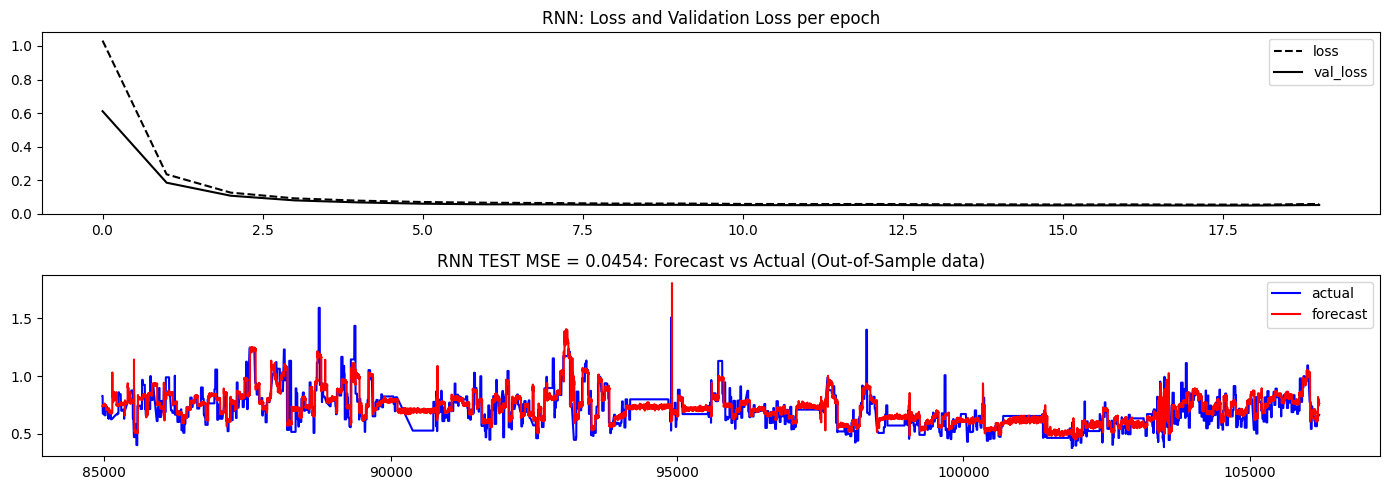

In [95]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference simple RNN



## Inference sanity check first


In [96]:

model = si_normal_rnn


In [97]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0
10000
20000


In [98]:

l_real[:20]


[0.8280000158792664,
 0.8280000158792664,
 0.7510000166267639,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615]

In [99]:

l_pred[:20]


[array([0.73660684], dtype=float32),
 array([0.7361169], dtype=float32),
 array([0.73775303], dtype=float32),
 array([0.74765694], dtype=float32),
 array([0.74489415], dtype=float32),
 array([0.74440956], dtype=float32),
 array([0.7398485], dtype=float32),
 array([0.73951447], dtype=float32),
 array([0.74317884], dtype=float32),
 array([0.7428646], dtype=float32),
 array([0.74226546], dtype=float32),
 array([0.7425833], dtype=float32),
 array([0.7423043], dtype=float32),
 array([0.73947304], dtype=float32),
 array([0.73987216], dtype=float32),
 array([0.7408484], dtype=float32),
 array([0.7403786], dtype=float32),
 array([0.74441415], dtype=float32),
 array([0.74620533], dtype=float32),
 array([0.7459336], dtype=float32)]

In [100]:

## plt.rcParams["figure.figsize"] = [14, 5] 


21242


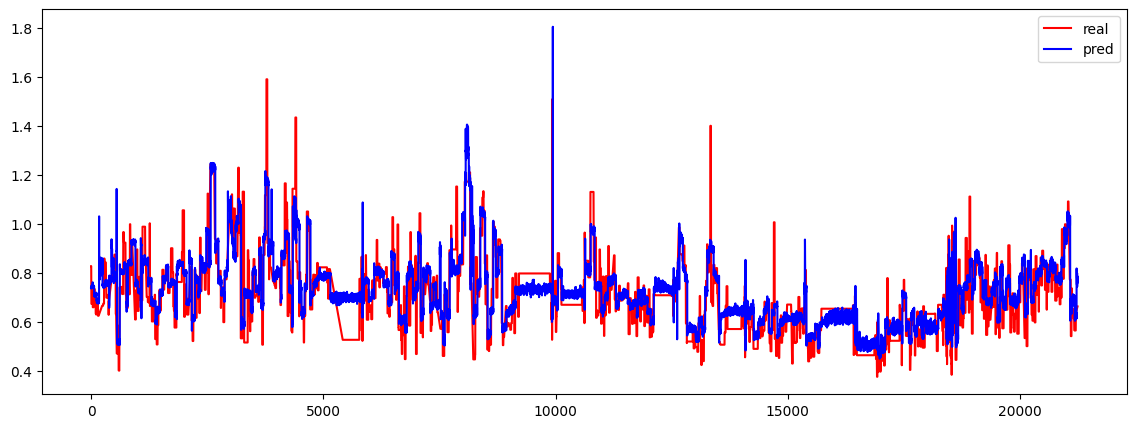

In [101]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [102]:

model = si_normal_rnn


In [103]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0
10000
20000


In [104]:

l_real[:20]


[0.8280000158792664,
 0.8280000158792664,
 0.7510000166267639,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615]

In [105]:

l_pred[:20]


[array([0.73660684], dtype=float32),
 array([0.727118], dtype=float32),
 array([0.71386576], dtype=float32),
 array([0.69190335], dtype=float32),
 array([0.65854406], dtype=float32),
 array([0.61496884], dtype=float32),
 array([0.5636241], dtype=float32),
 array([0.5086651], dtype=float32),
 array([0.45542723], dtype=float32),
 array([0.43589264], dtype=float32),
 array([0.41525382], dtype=float32),
 array([0.39755124], dtype=float32),
 array([0.38915366], dtype=float32),
 array([0.3908224], dtype=float32),
 array([0.40031534], dtype=float32),
 array([0.4257052], dtype=float32),
 array([0.45699704], dtype=float32),
 array([0.48448414], dtype=float32),
 array([0.5090528], dtype=float32),
 array([0.52625644], dtype=float32)]

21242


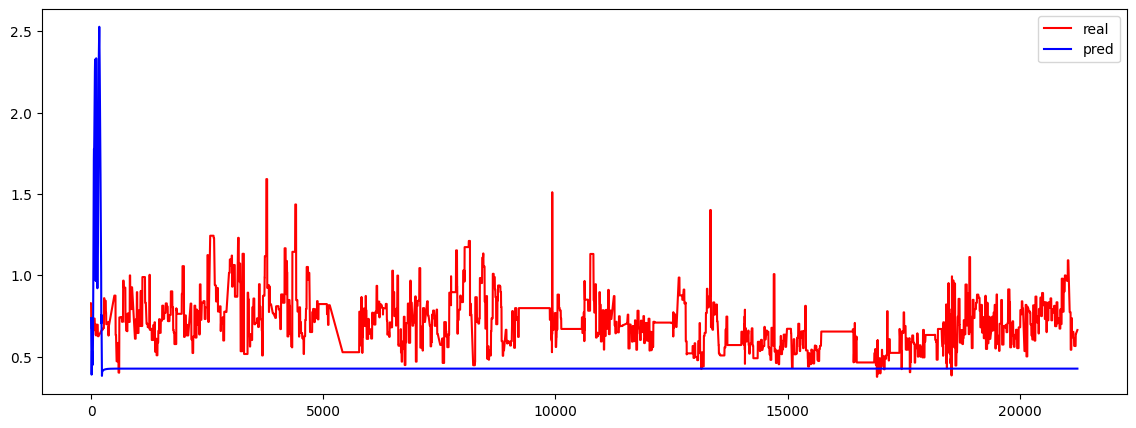

In [106]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [107]:

model = si_normal_rnn


In [108]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)




In [109]:

x_test.shape


torch.Size([21242, 36])

In [110]:

bin_size = int( x_test.shape[0] / window )
bin_size 


10621

In [114]:

21242 / 800


26.5525

In [115]:

bin_size = 600


torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


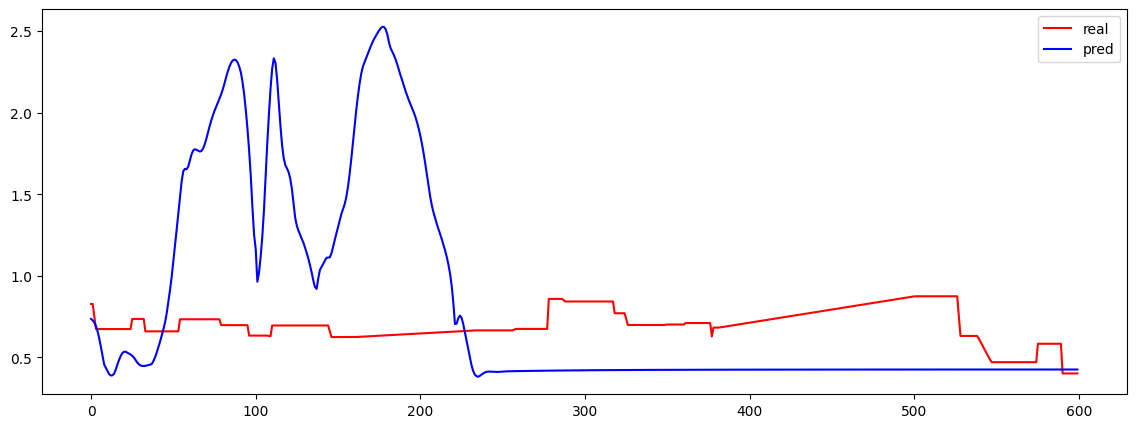

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


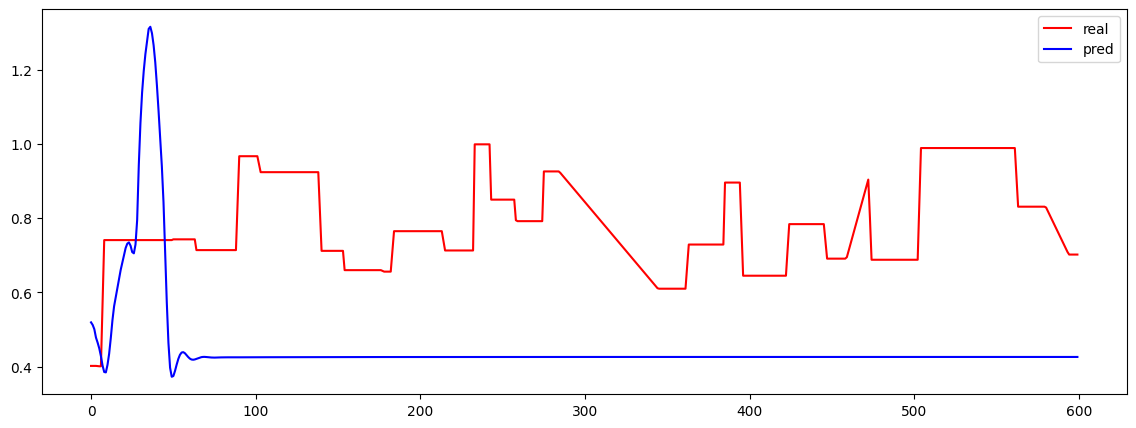

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


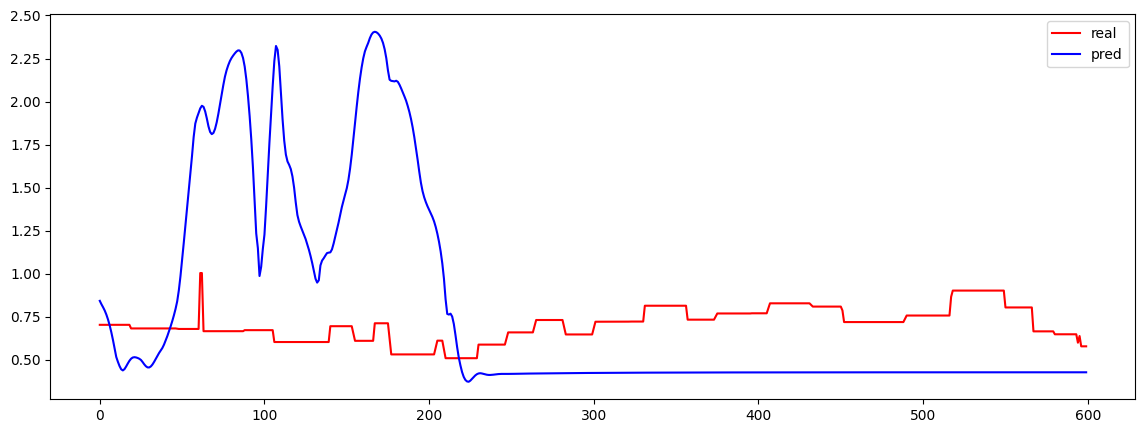

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


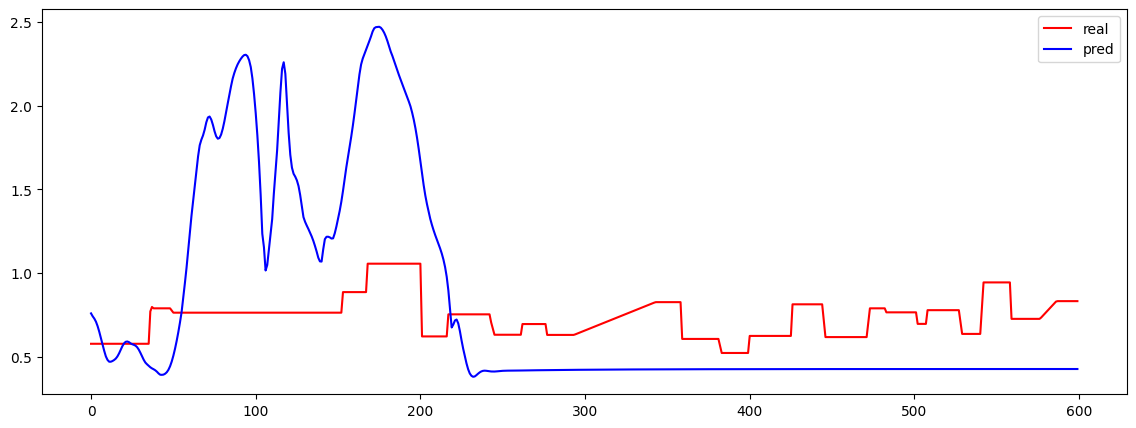

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


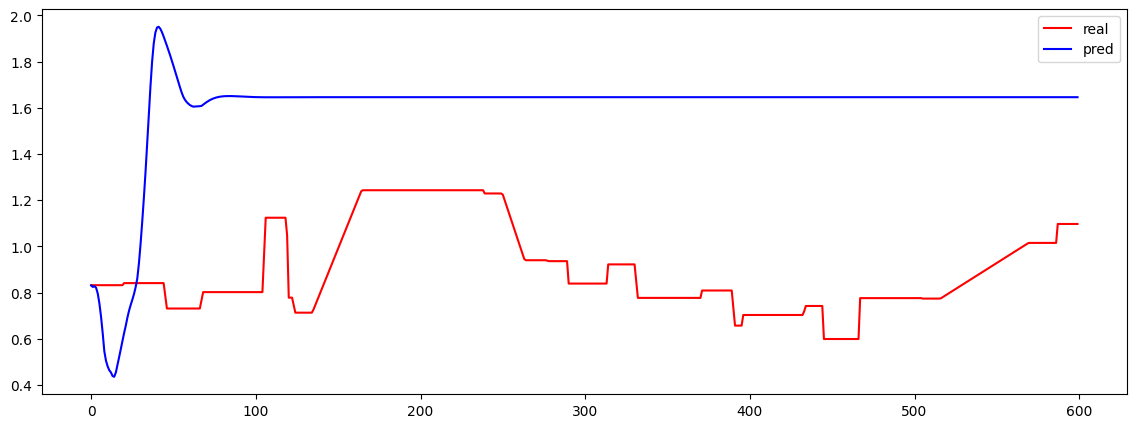

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


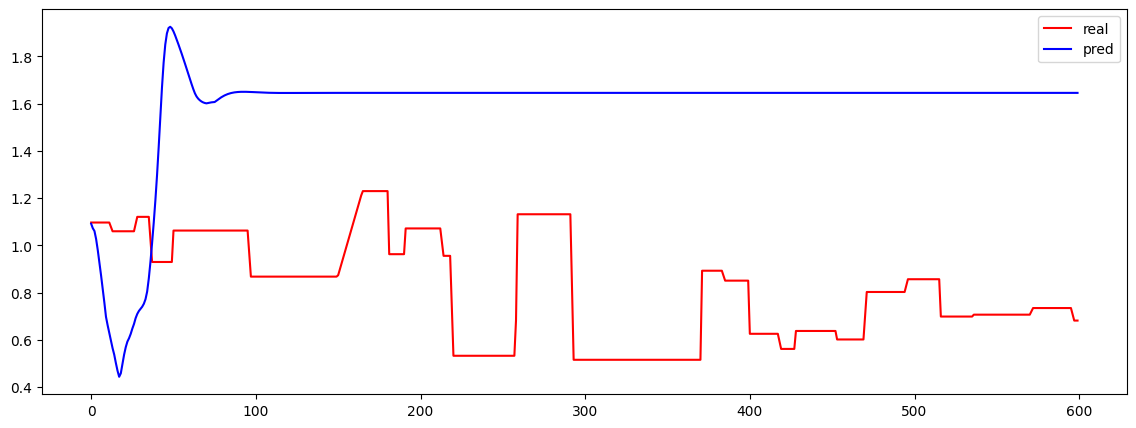

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


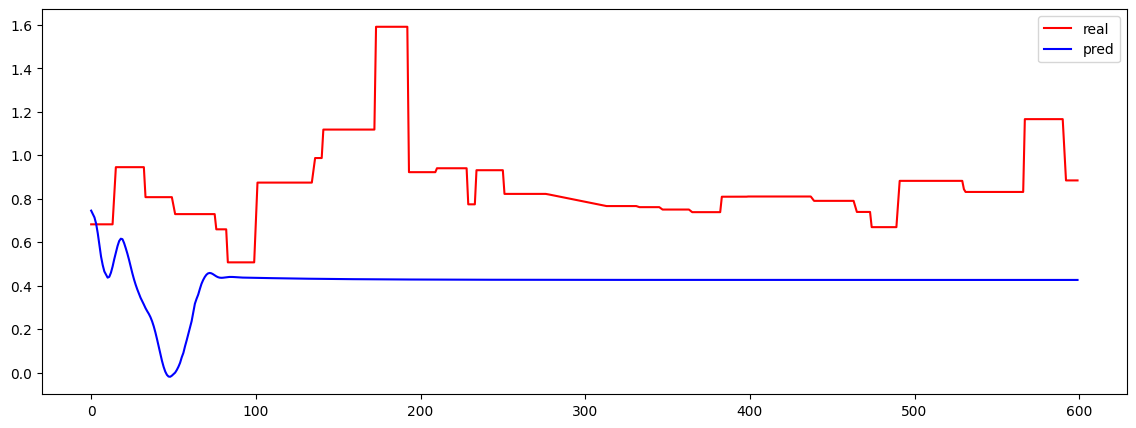

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


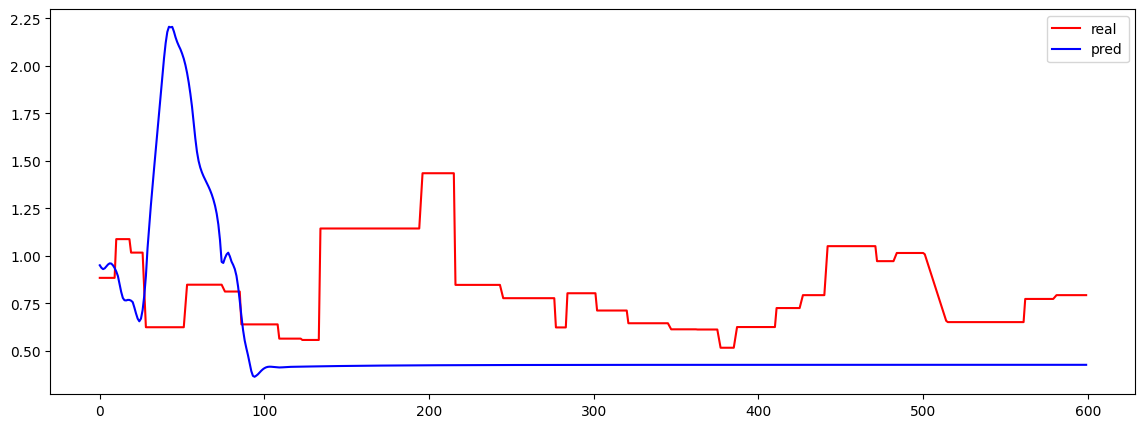

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


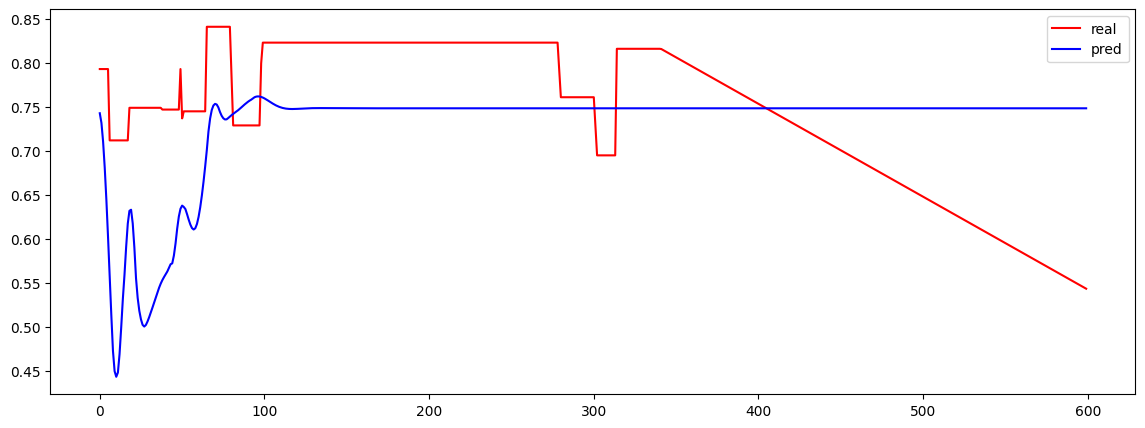

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


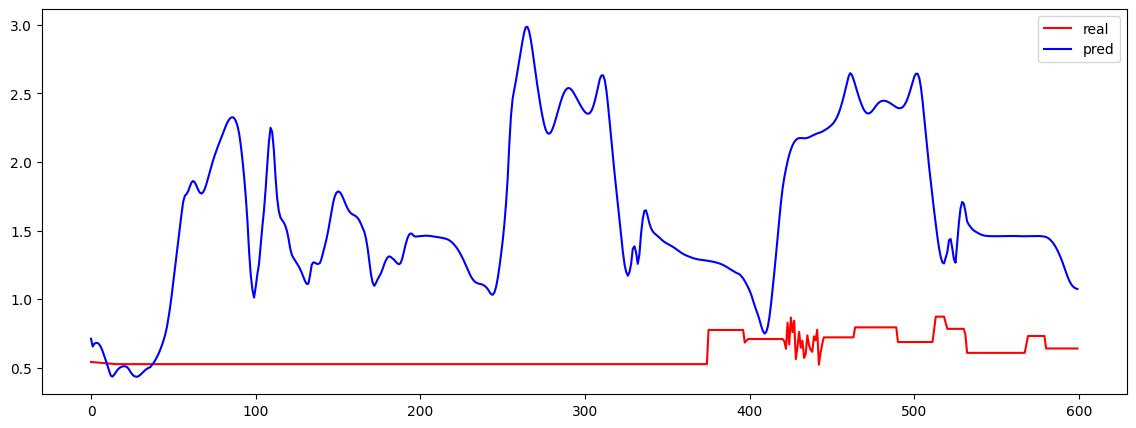

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


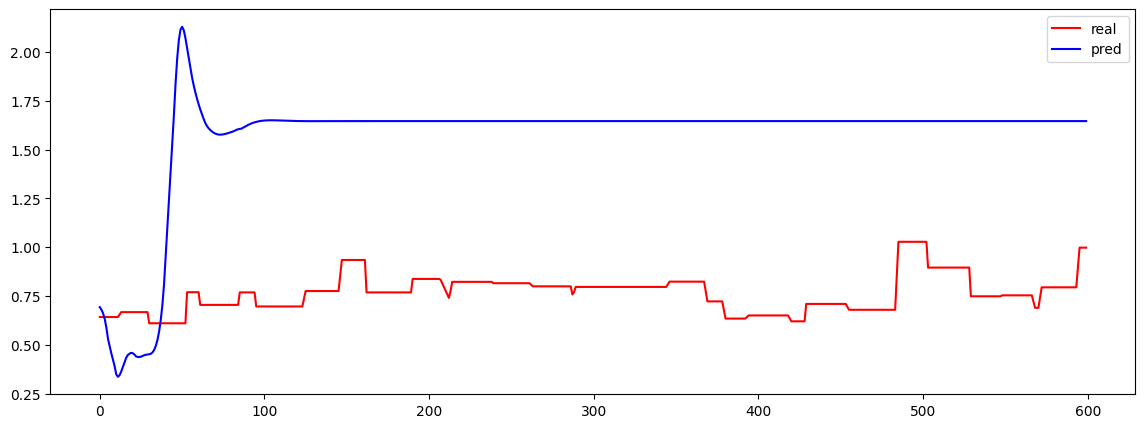

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


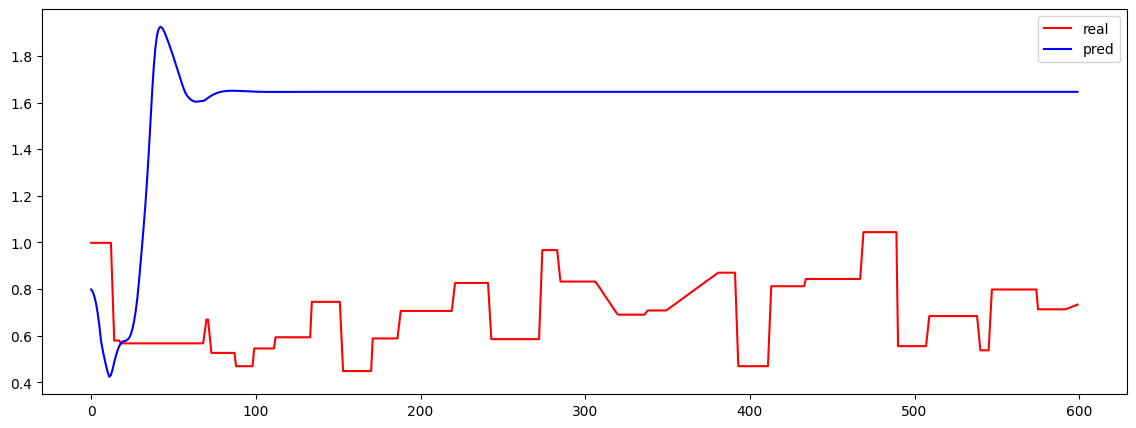

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


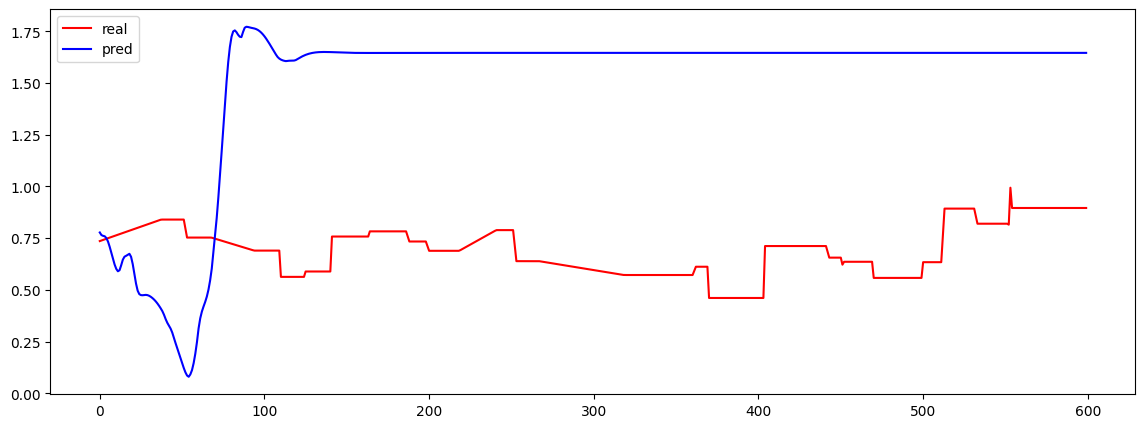

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


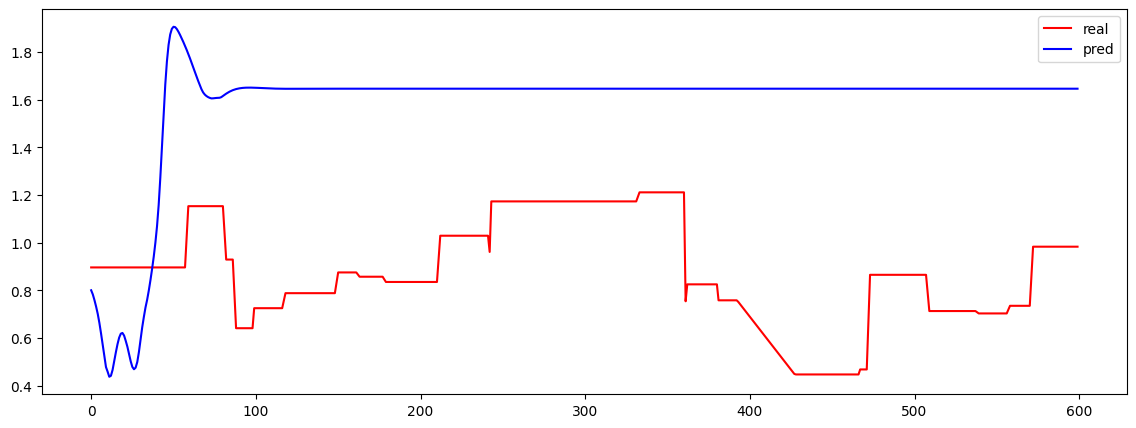

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


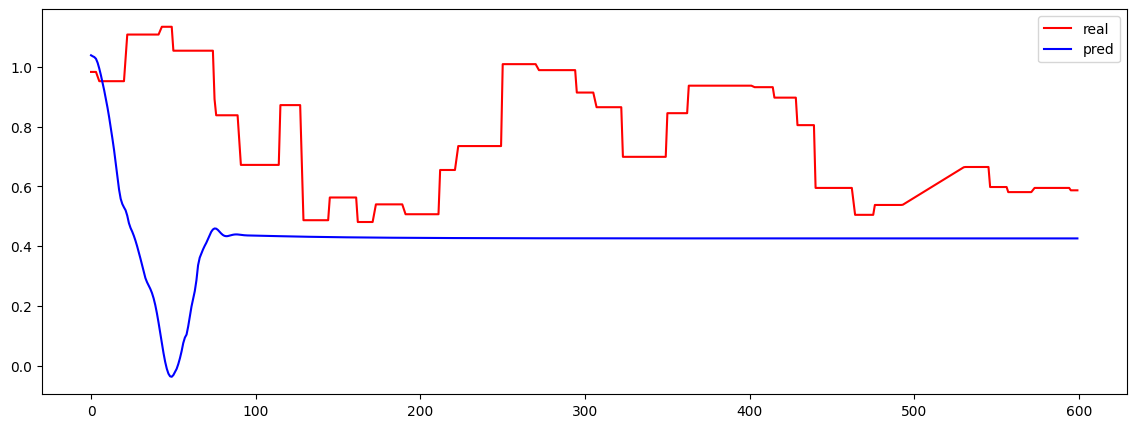

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


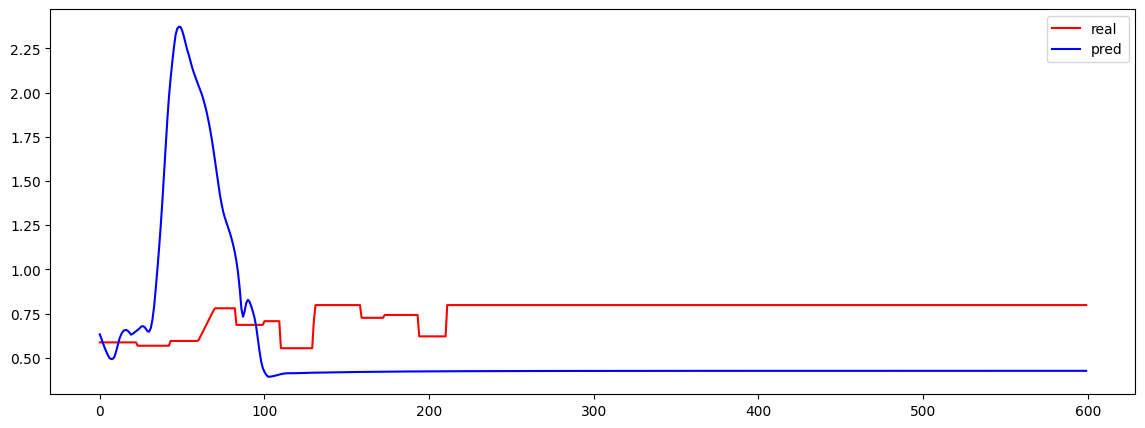

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


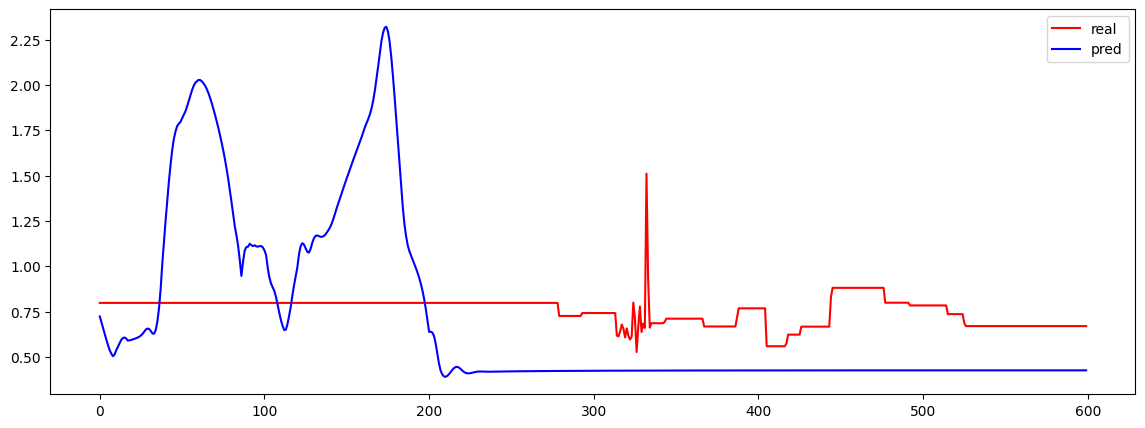

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


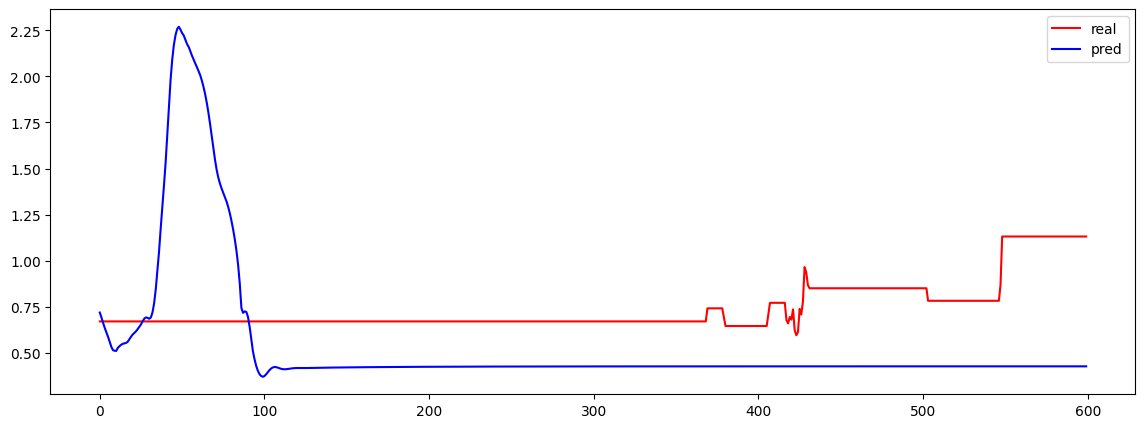

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


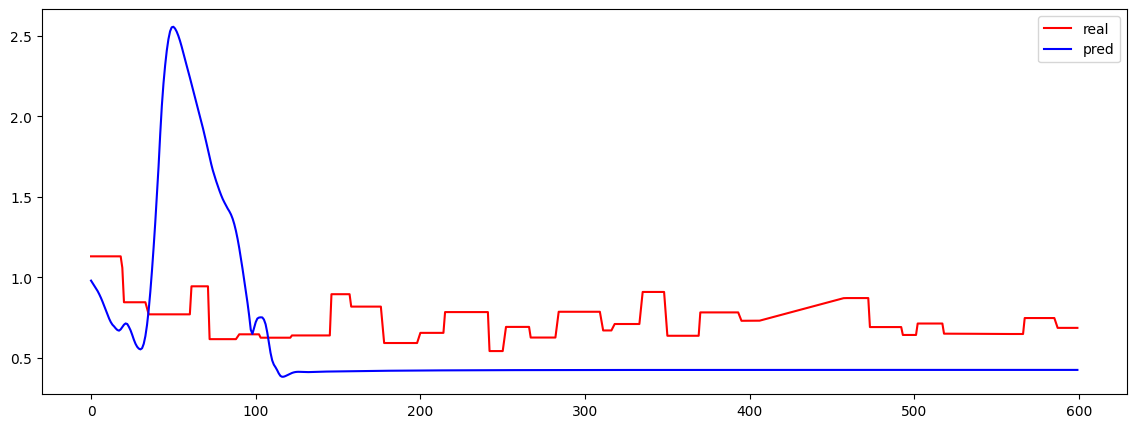

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


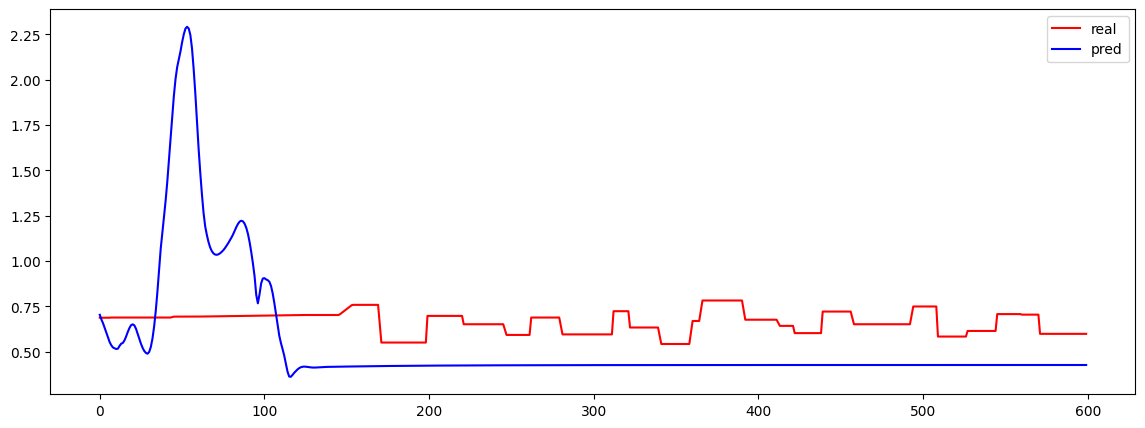

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


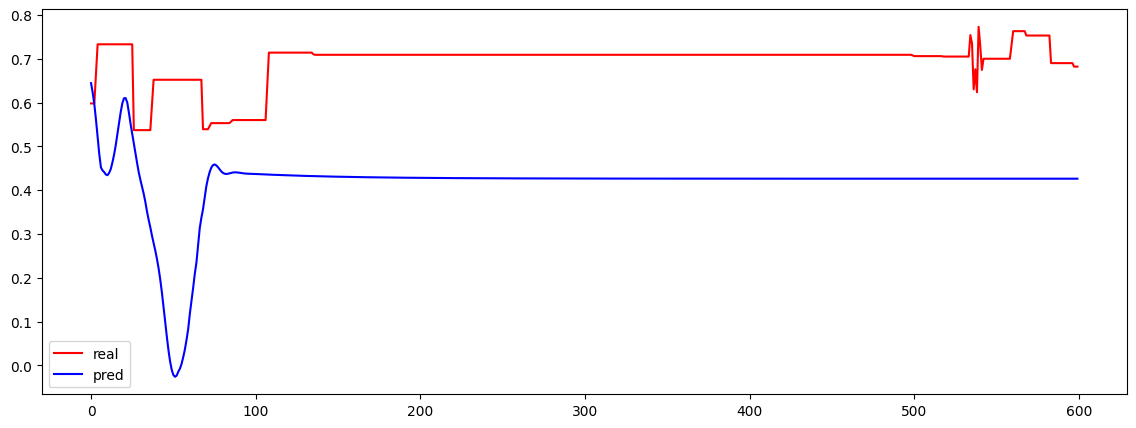

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


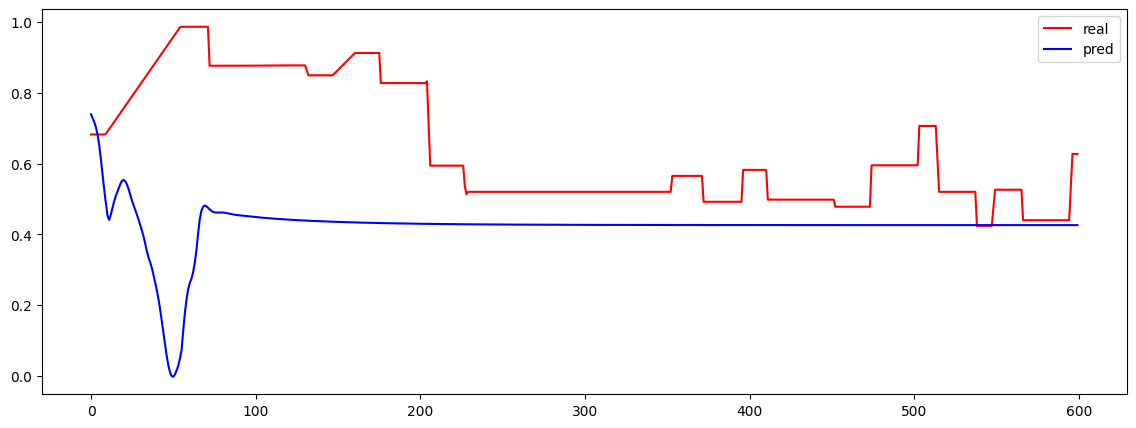

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


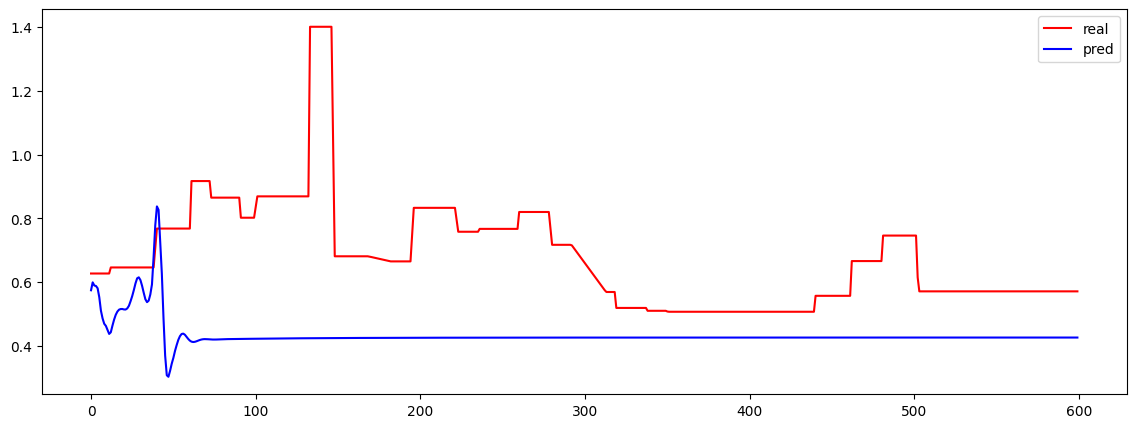

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


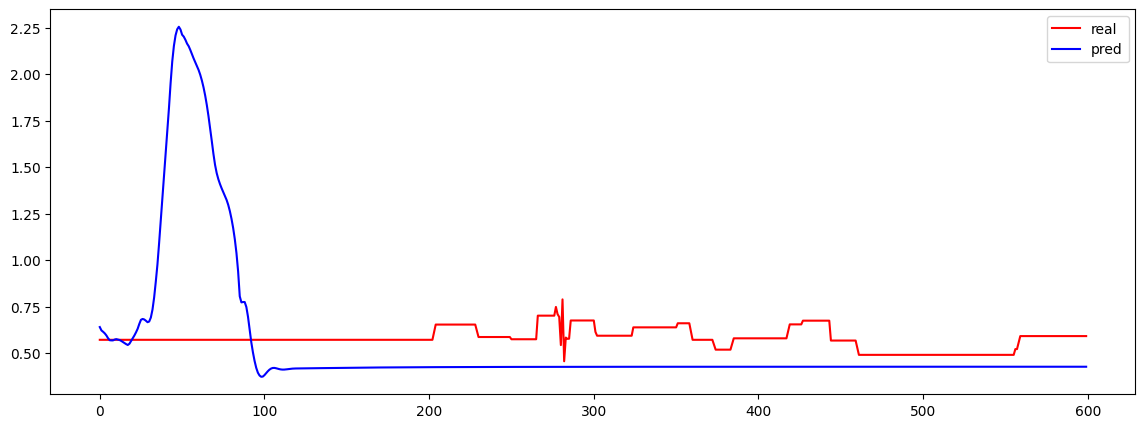

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


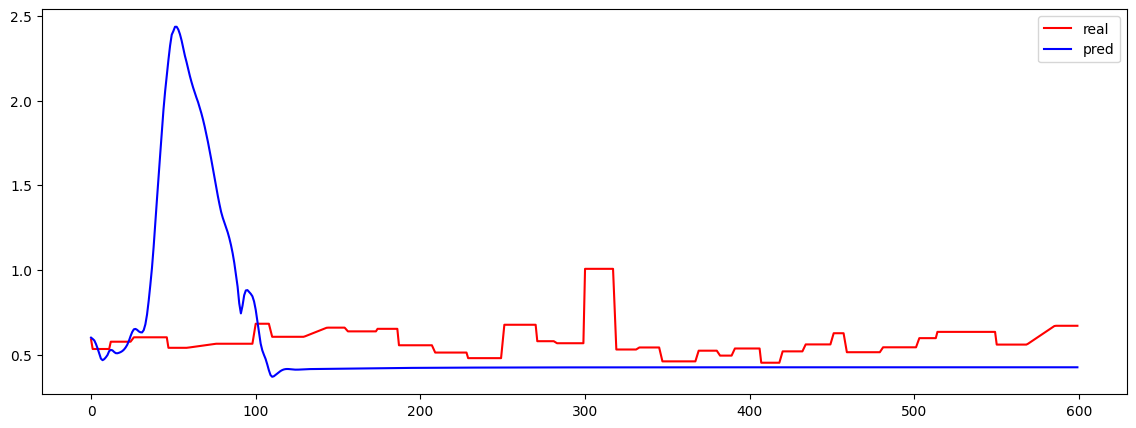

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


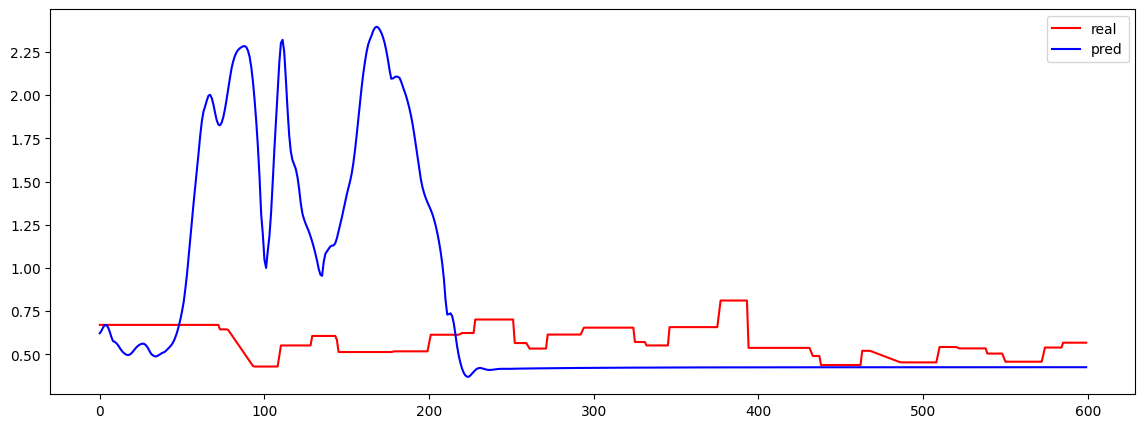

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


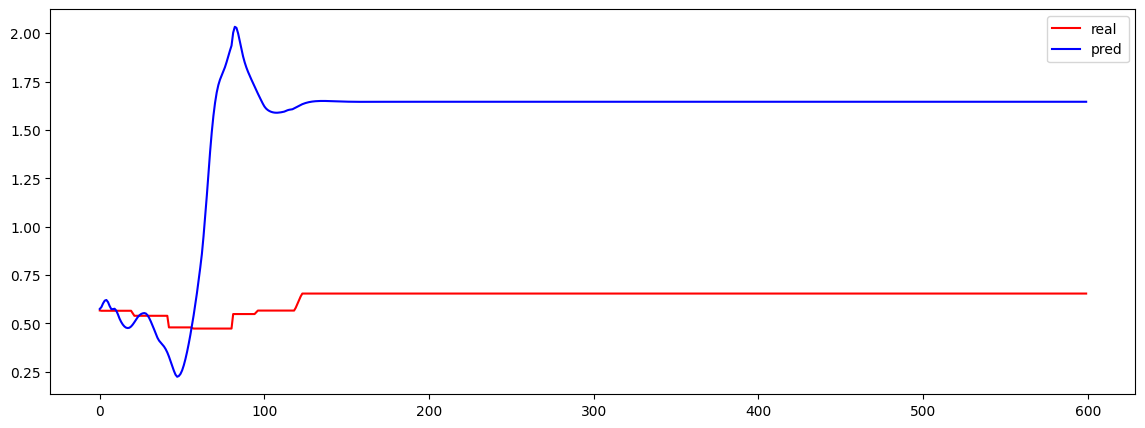

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


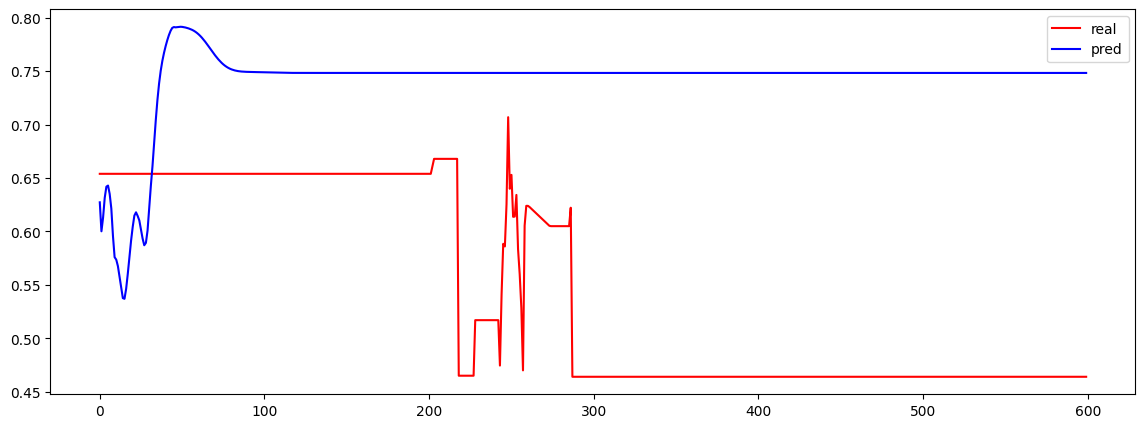

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


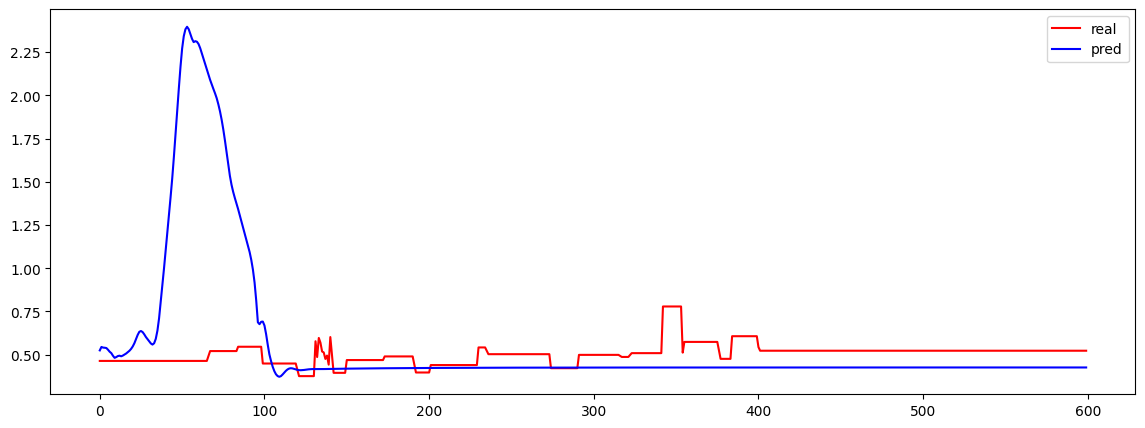

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


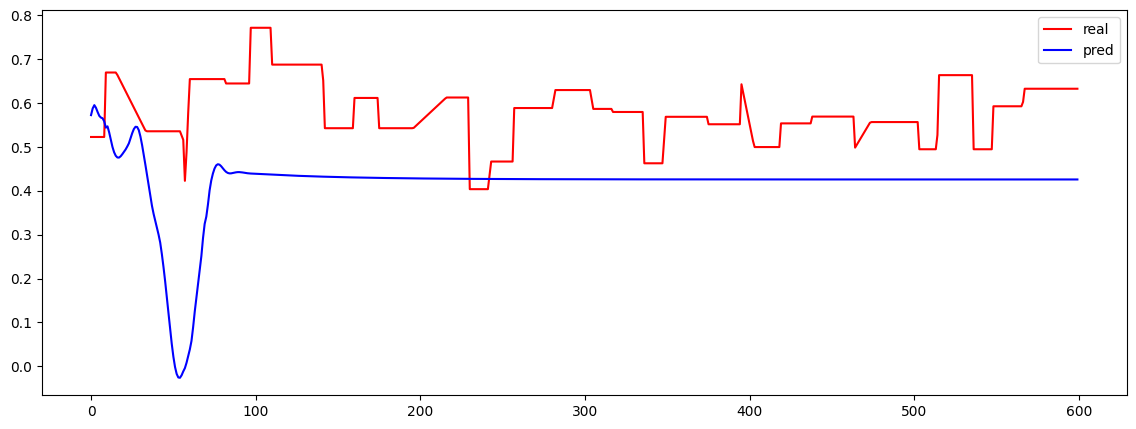

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


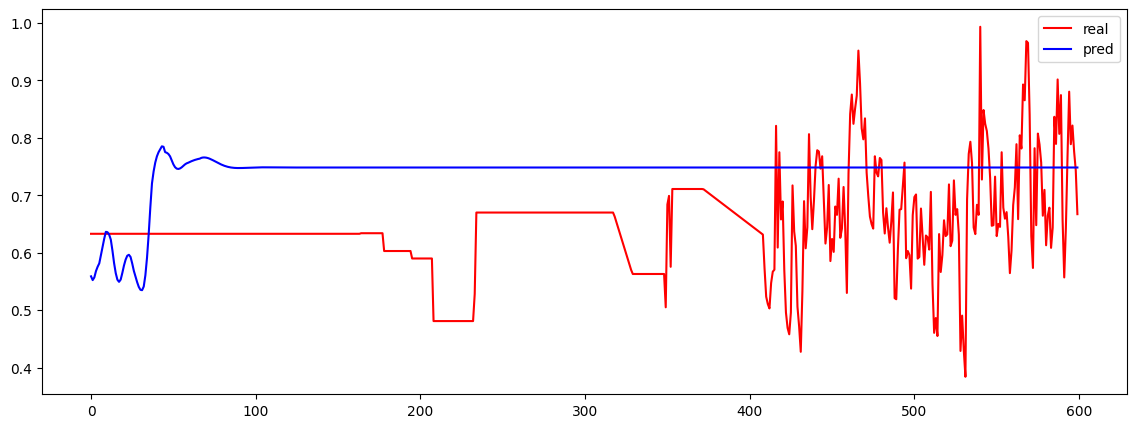

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


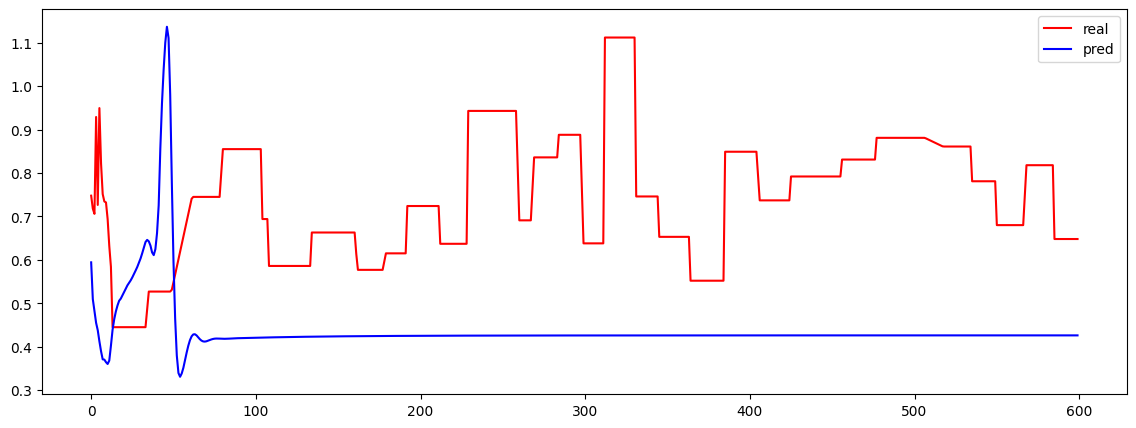

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


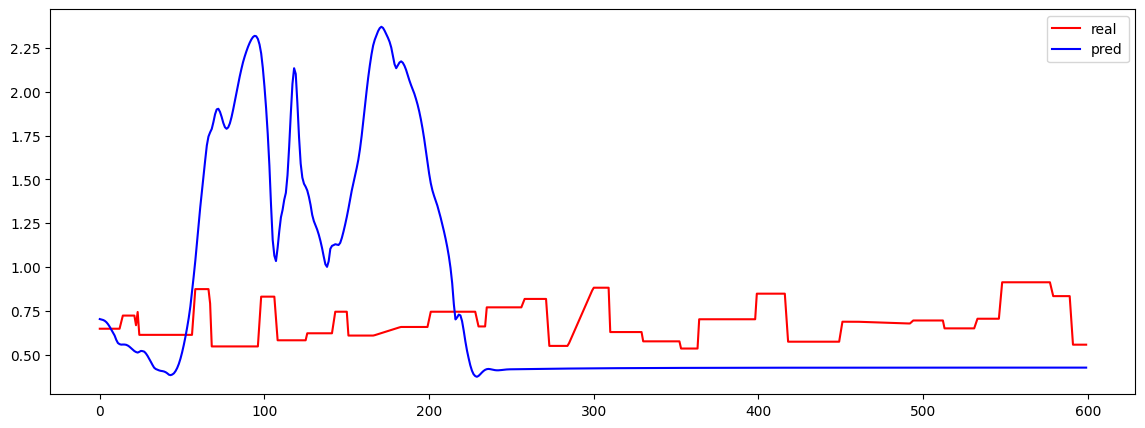

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


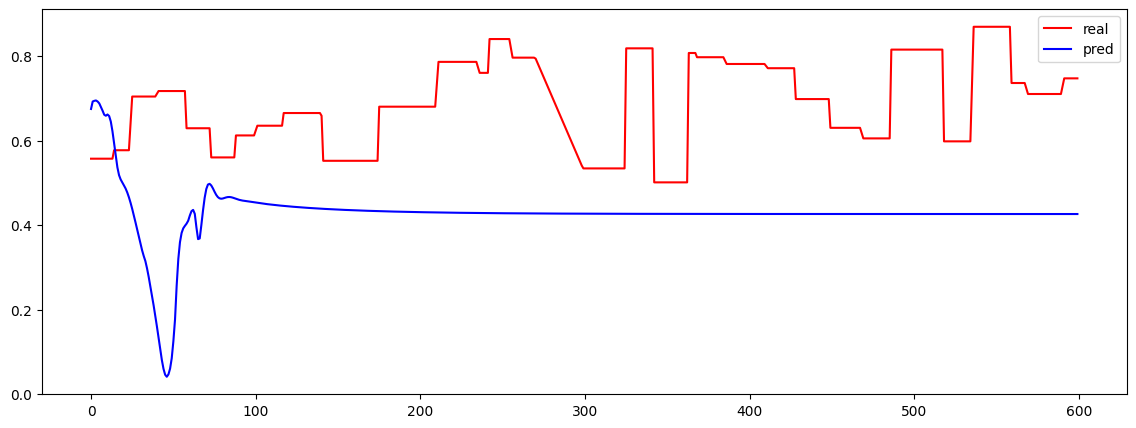

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


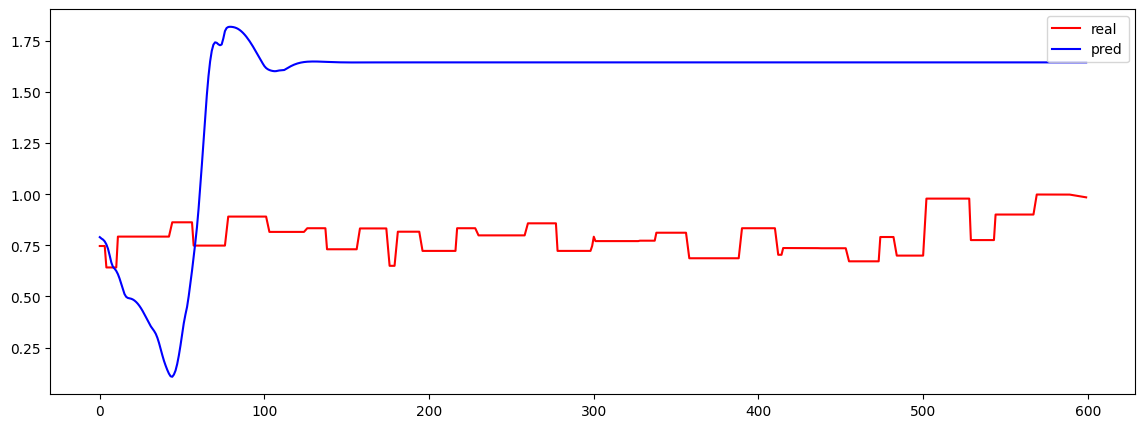

In [116]:

for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    bins_inference_model_pt(model, batch_x_test, batch_y_test)




## LSTM


In [117]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        # reshape
        ## lstm_o = lstm_o.view( -1, self.hidden_dim)
        
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/500 - Loss:  1.0277847051620483, val_loss: 0.6657678484916687
25/500 - Loss:  0.22945886850357056, val_loss: 0.18549832701683044
50/500 - Loss:  0.12126420438289642, val_loss: 0.10412776470184326
75/500 - Loss:  0.09002678841352463, val_loss: 0.07862313091754913
100/500 - Loss:  0.07546403259038925, val_loss: 0.06568048149347305
125/500 - Loss:  0.0675533264875412, val_loss: 0.05858100950717926
150/500 - Loss:  0.06303247064352036, val_loss: 0.05500092729926109
175/500 - Loss:  0.06010735034942627, val_loss: 0.05292120203375816
200/500 - Loss:  0.057949673384428024, val_loss: 0.05152461305260658
225/500 - Loss:  0.056350938975811005, val_loss: 0.050513625144958496
250/500 - Loss:  0.05518871545791626, val_loss: 0.049616049975156784
275/500 - Loss:  0.05428919941186905, val_loss: 0.04904082417488098
300/500 - Loss:  0.05353231728076935, val_loss: 0.04848071560263634
325/500 - Loss:  0.05302176624536514, val_loss: 0.04801969230175018
350/500 - Loss:  0.052281659096479416, val_loss: 0.0

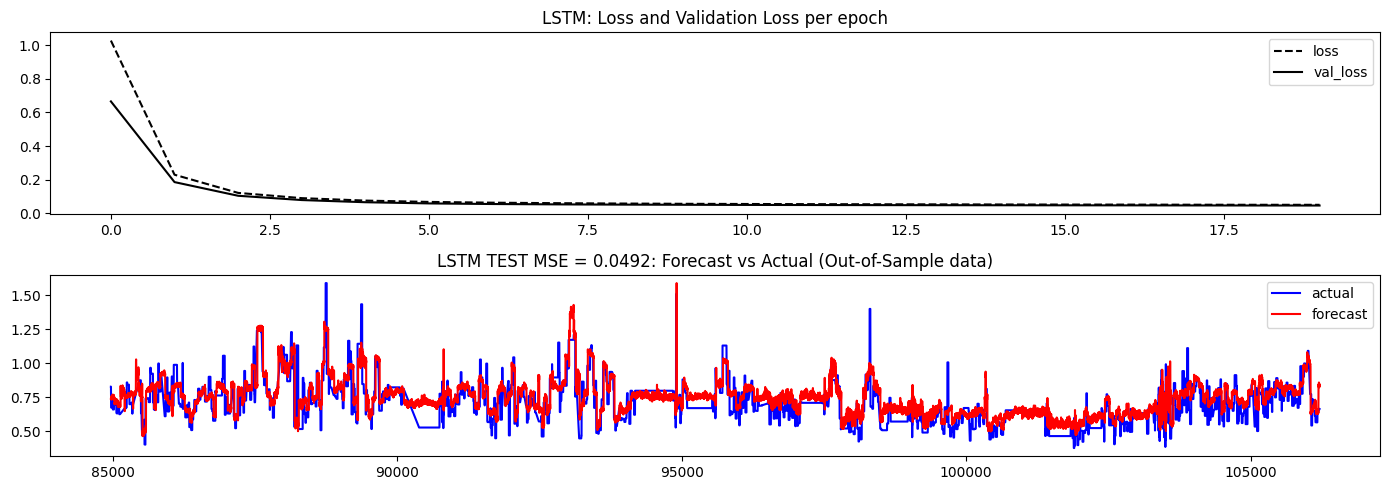

In [118]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM Inference



## Inference sanity check first


In [119]:

model = si_lstm


In [120]:

l_real, l_pred = inference_model_pt_2(model, model_type='LSTM', **params_si)


0
10000
20000


In [121]:

l_real[:20]


[0.8280000158792664,
 0.8280000158792664,
 0.7510000166267639,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615]

In [122]:

l_pred[:20]


[array([0.7398653], dtype=float32),
 array([0.74142134], dtype=float32),
 array([0.7469189], dtype=float32),
 array([0.75314397], dtype=float32),
 array([0.7404326], dtype=float32),
 array([0.73590875], dtype=float32),
 array([0.7393297], dtype=float32),
 array([0.74167764], dtype=float32),
 array([0.75552666], dtype=float32),
 array([0.758696], dtype=float32),
 array([0.7382835], dtype=float32),
 array([0.7326668], dtype=float32),
 array([0.7382226], dtype=float32),
 array([0.7391461], dtype=float32),
 array([0.7412975], dtype=float32),
 array([0.7419487], dtype=float32),
 array([0.7462426], dtype=float32),
 array([0.75659376], dtype=float32),
 array([0.7556149], dtype=float32),
 array([0.740095], dtype=float32)]

21242


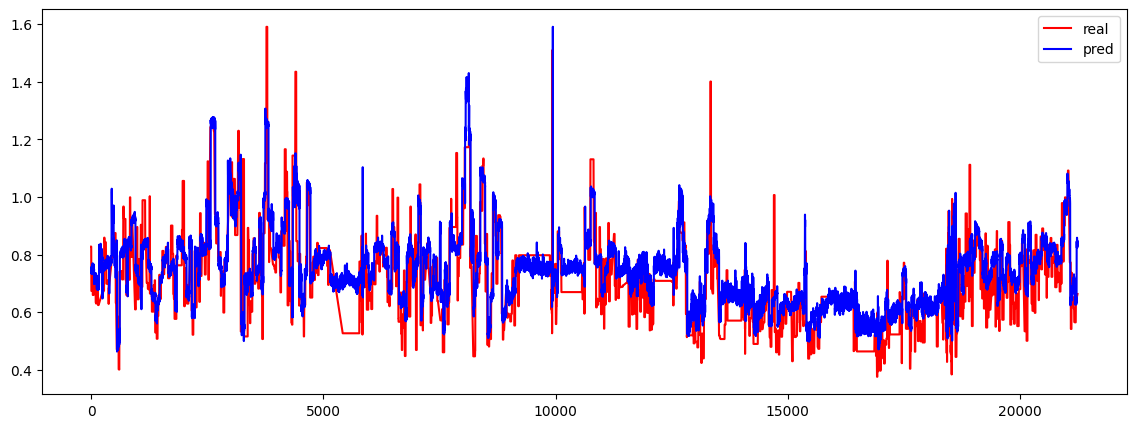

In [123]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [124]:

model = si_lstm


In [125]:

l_real, l_pred = inference_model_pt(model, model_type='LSTM', **params_si)


0
10000
20000


In [126]:

l_real[:50]


[0.8280000158792664,
 0.8280000158792664,
 0.7510000166267639,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.6740000173742615,
 0.7360000005841212,
 0.7360000005841212,
 0.7360000005841212,
 0.7360000005841212,
 0.7360000005841212,
 0.7360000005841212,
 0.7360000005841212,
 0.7360000005841212,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445711407,
 0.6600000445

In [127]:

l_pred[:500]


[array([0.7398653], dtype=float32),
 array([0.7466599], dtype=float32),
 array([0.7482798], dtype=float32),
 array([0.7506573], dtype=float32),
 array([0.7516954], dtype=float32),
 array([0.7521413], dtype=float32),
 array([0.75195986], dtype=float32),
 array([0.75138175], dtype=float32),
 array([0.7505238], dtype=float32),
 array([0.7494726], dtype=float32),
 array([0.7482682], dtype=float32),
 array([0.7469224], dtype=float32),
 array([0.7454296], dtype=float32),
 array([0.74377584], dtype=float32),
 array([0.7419441], dtype=float32),
 array([0.73991776], dtype=float32),
 array([0.73768216], dtype=float32),
 array([0.73522484], dtype=float32),
 array([0.7325358], dtype=float32),
 array([0.7296074], dtype=float32),
 array([0.7264341], dtype=float32),
 array([0.7230121], dtype=float32),
 array([0.71933925], dtype=float32),
 array([0.71541464], dtype=float32),
 array([0.7112391], dtype=float32),
 array([0.70681447], dtype=float32),
 array([0.7021439], dtype=float32),
 array([0.6972321],

21242


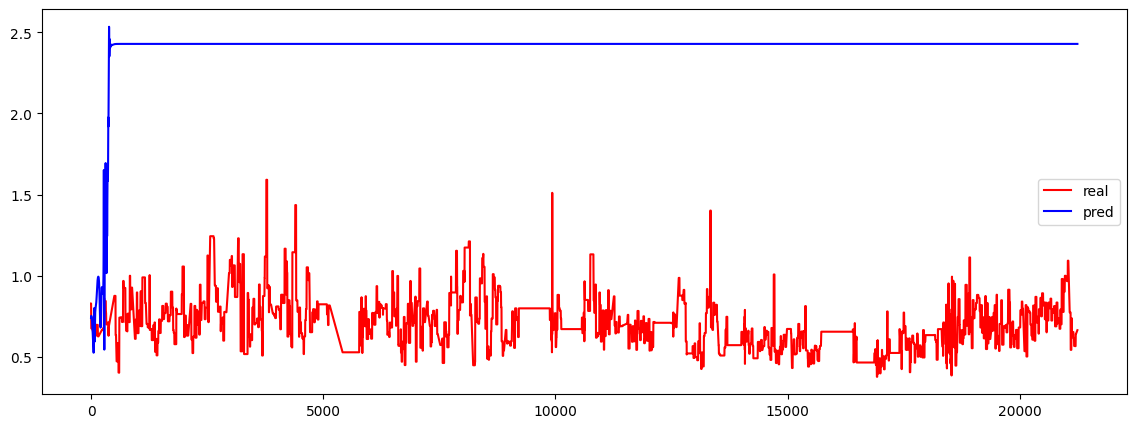

In [128]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [129]:

model = si_lstm


In [130]:


x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [131]:

x_test.shape


torch.Size([21242, 36])

In [132]:

bin_size = int( x_test.shape[0] / window )
bin_size 


10621

In [133]:

bin_size = 600


torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


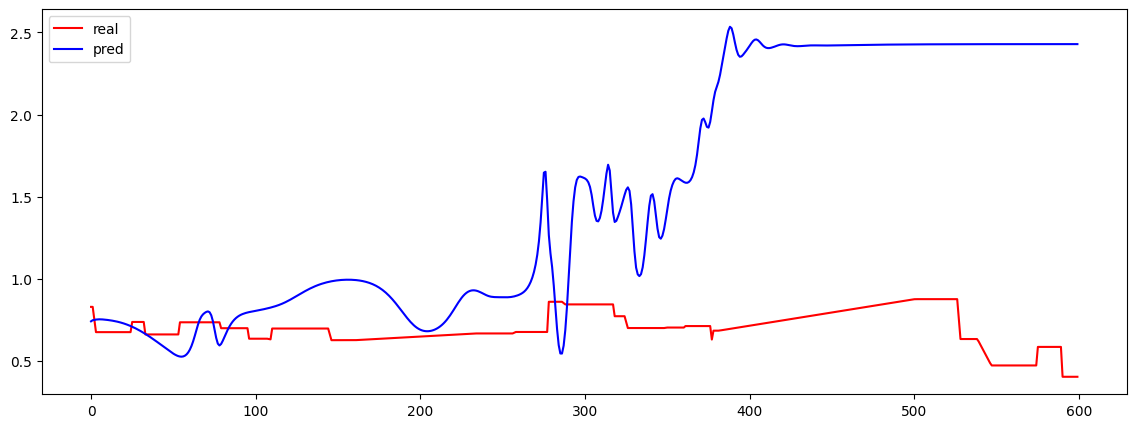

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


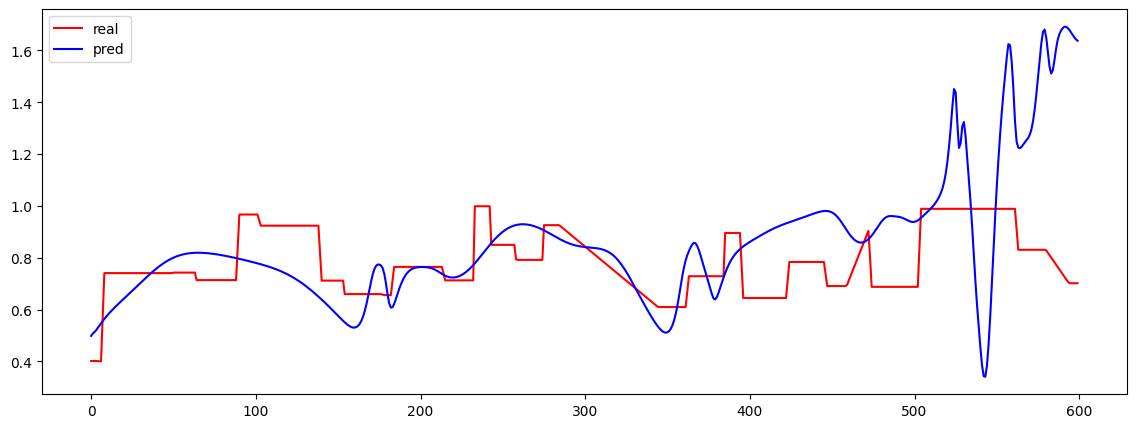

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


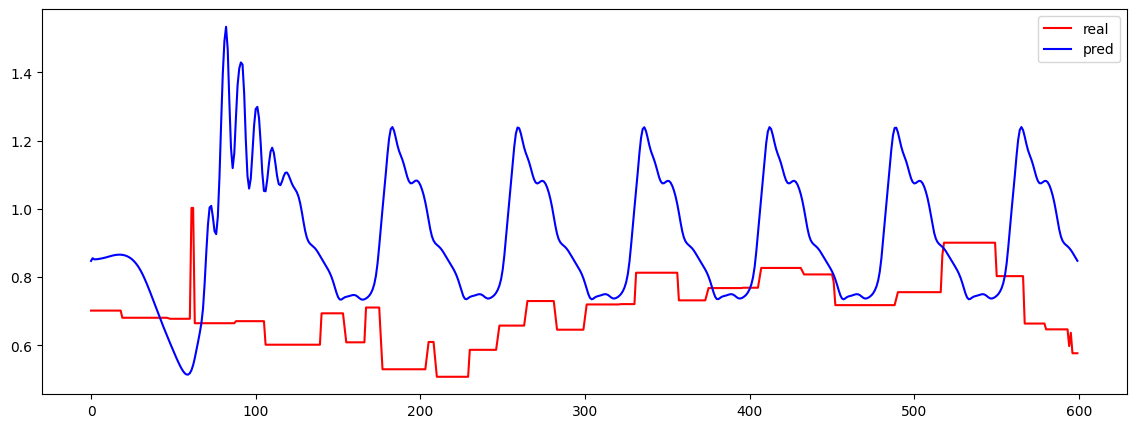

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


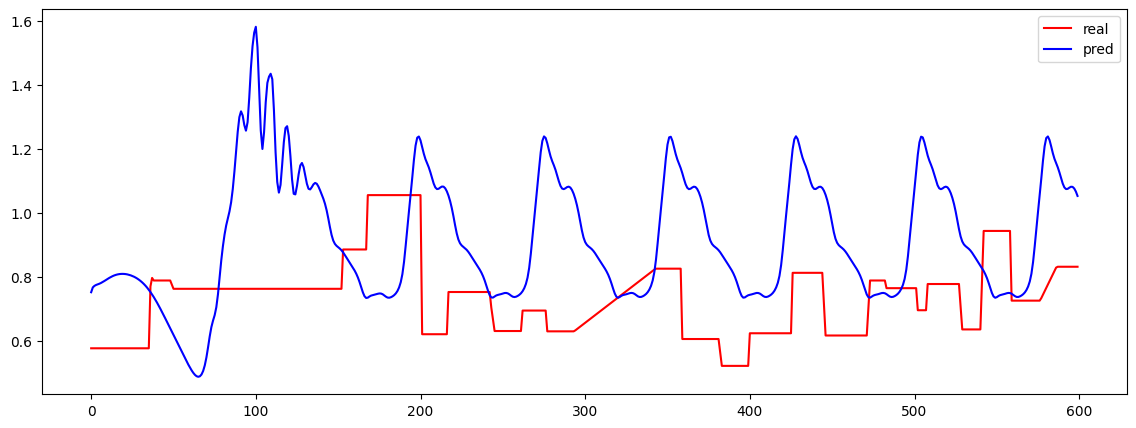

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


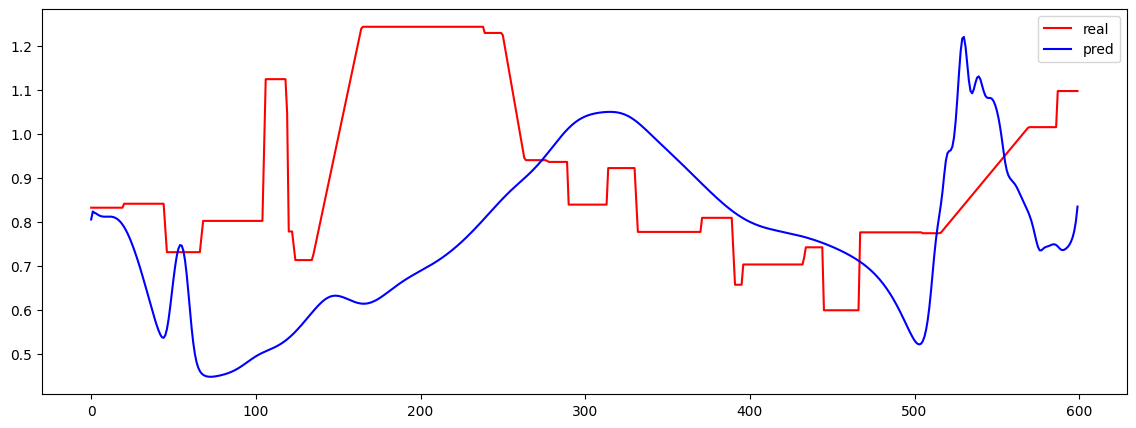

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


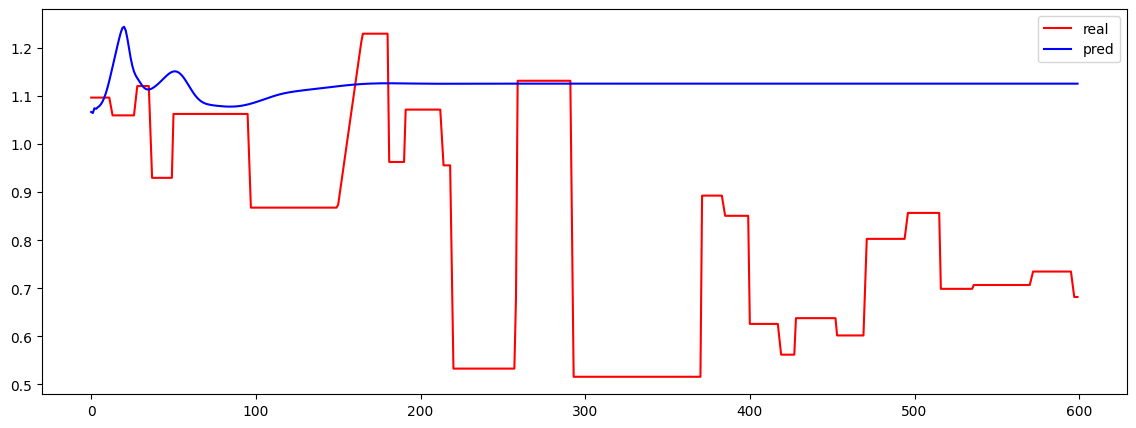

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


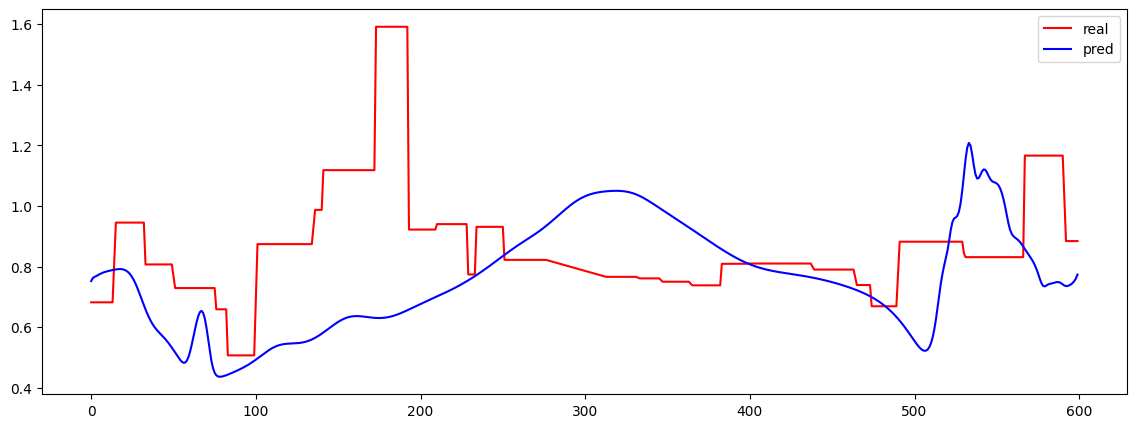

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


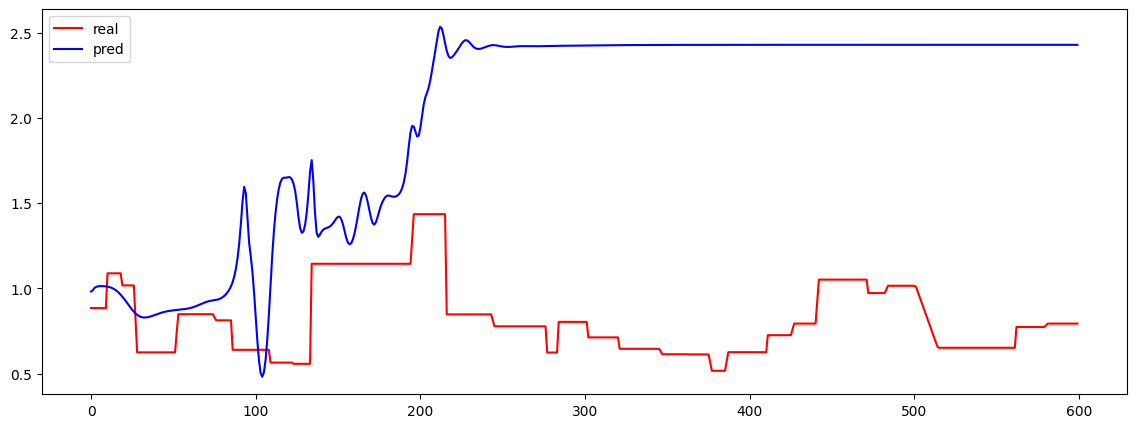

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


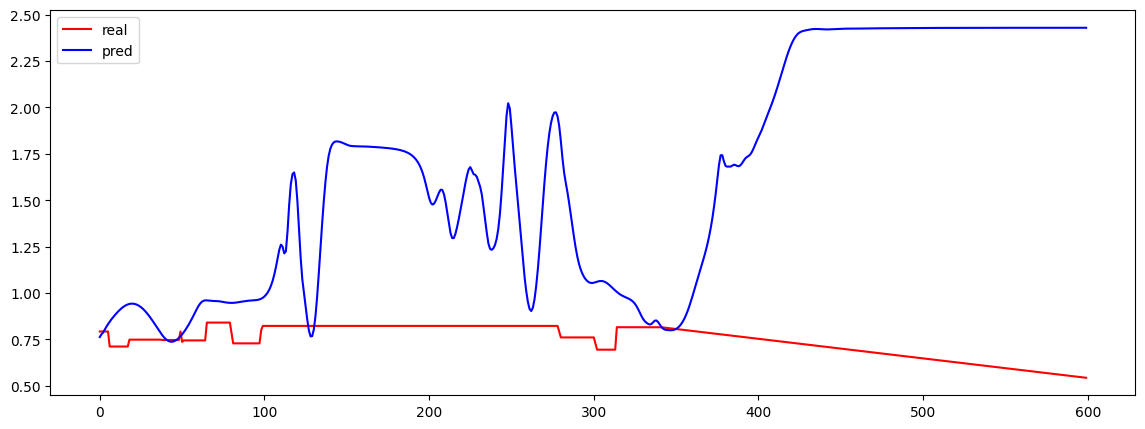

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


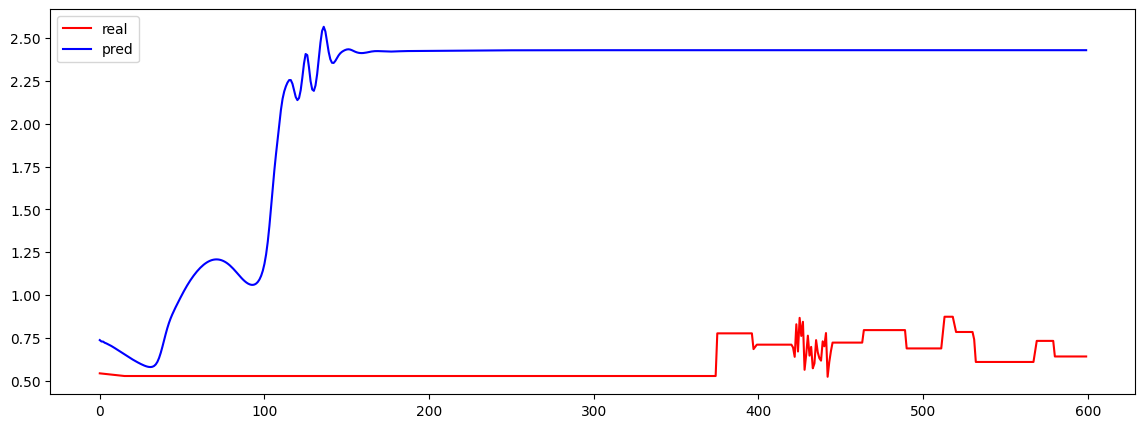

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


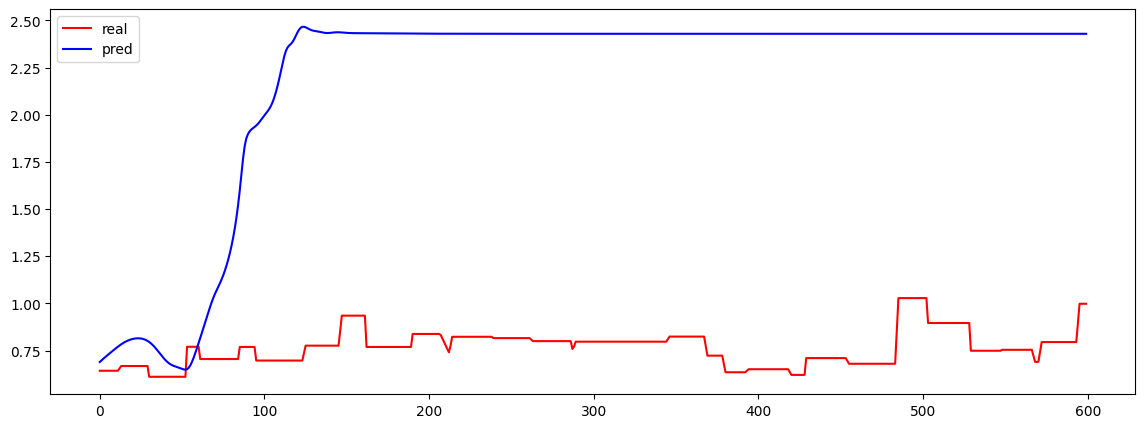

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


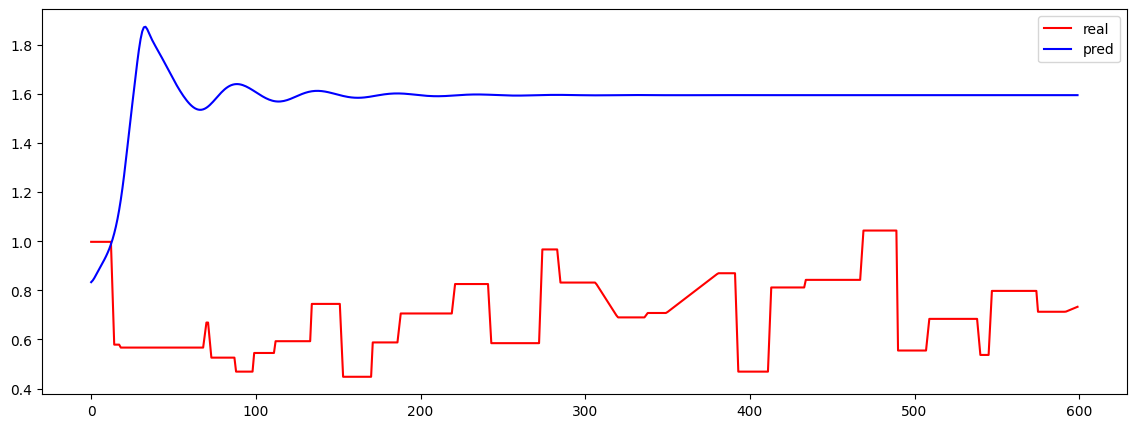

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


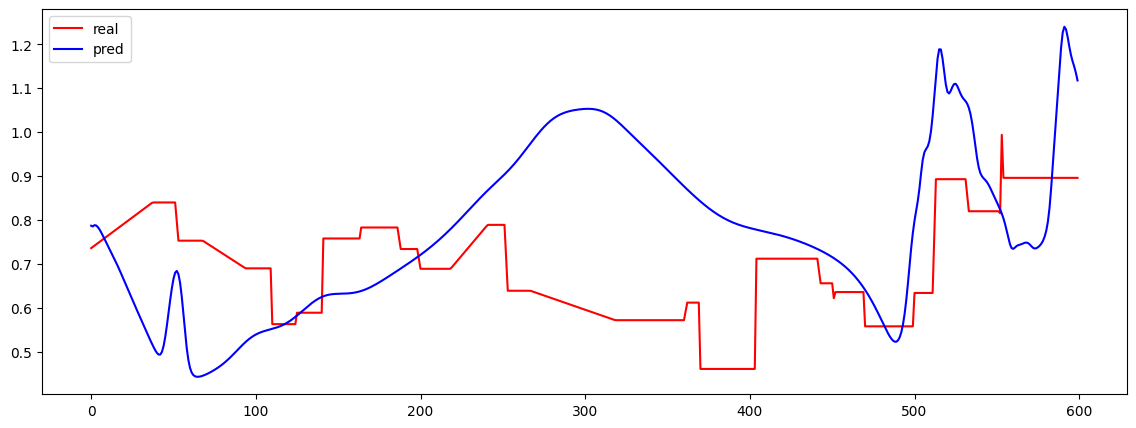

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


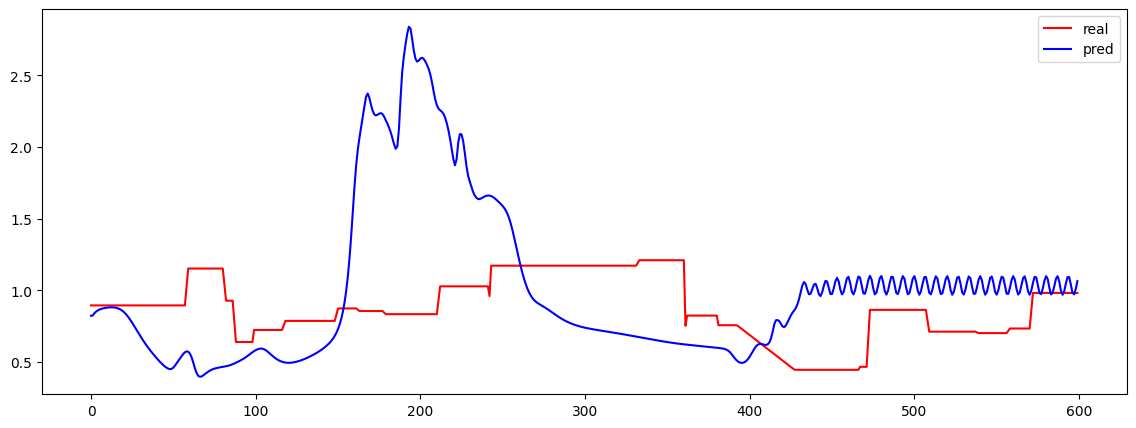

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


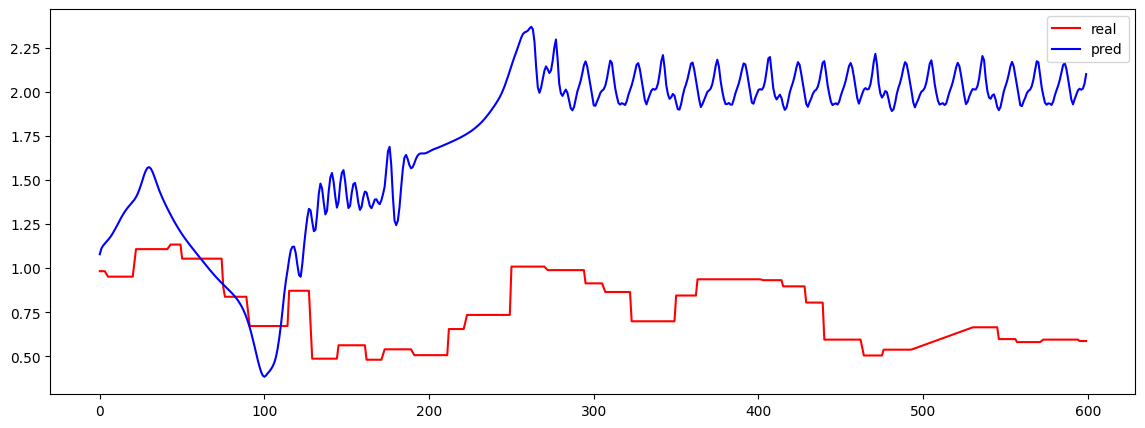

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


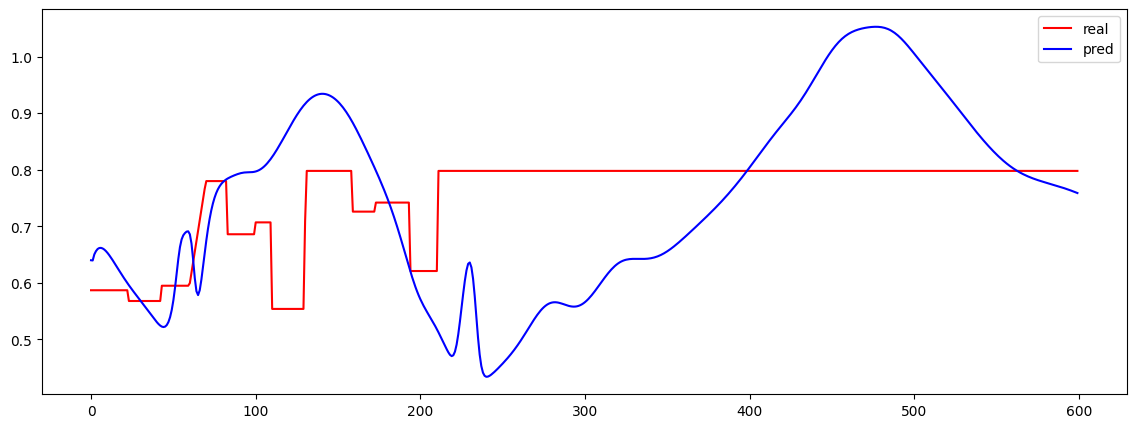

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


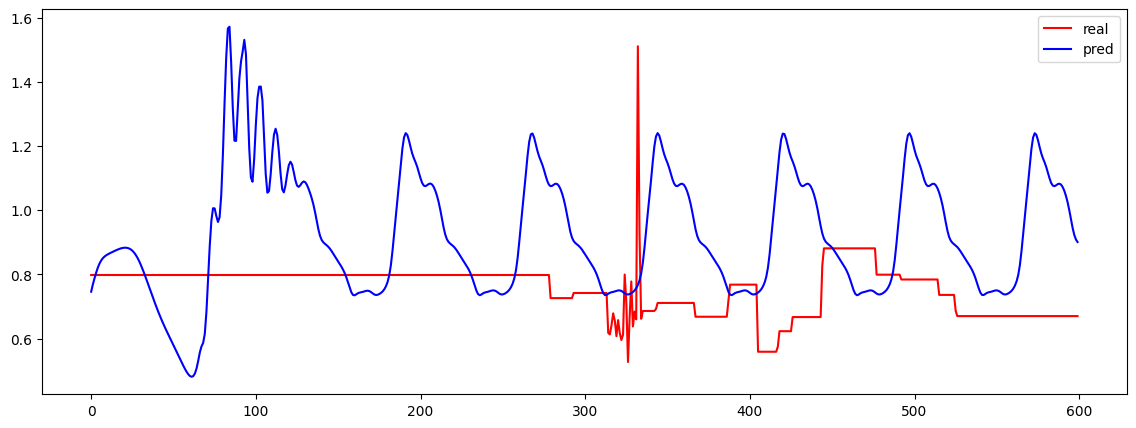

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


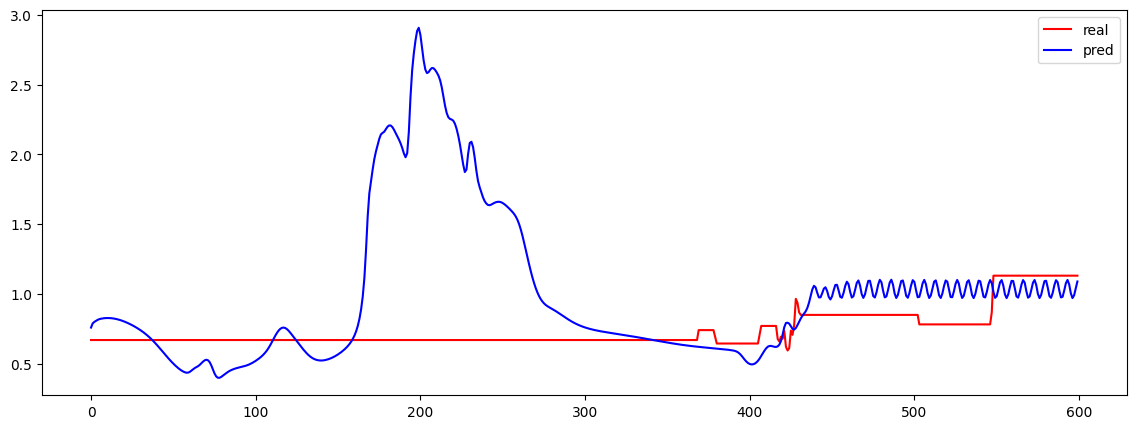

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


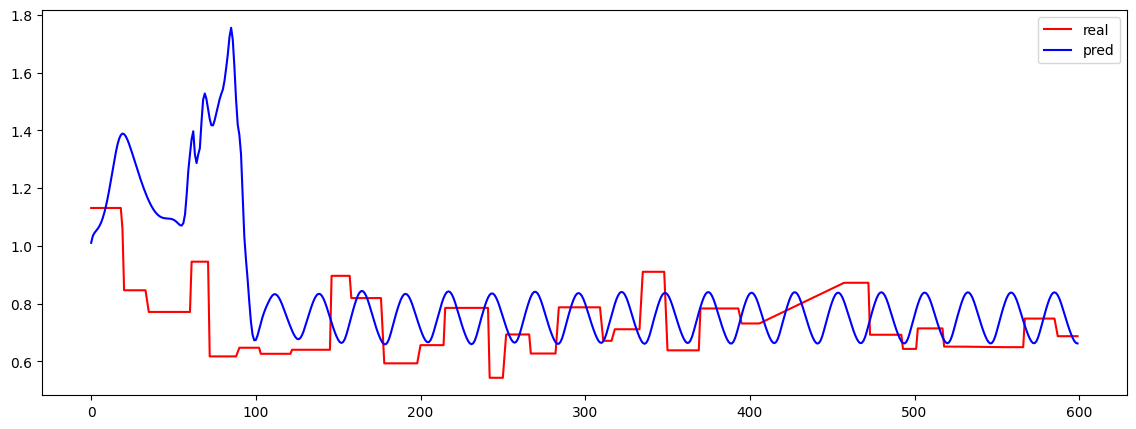

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


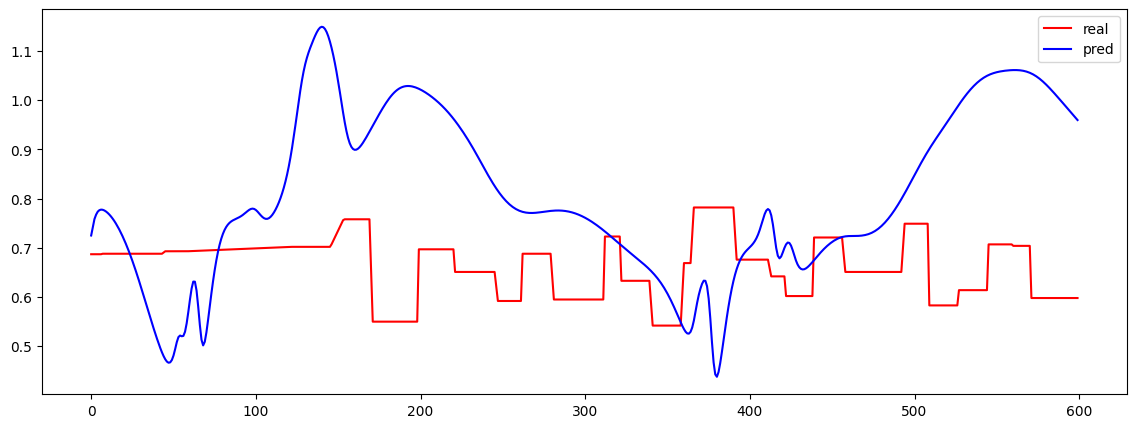

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


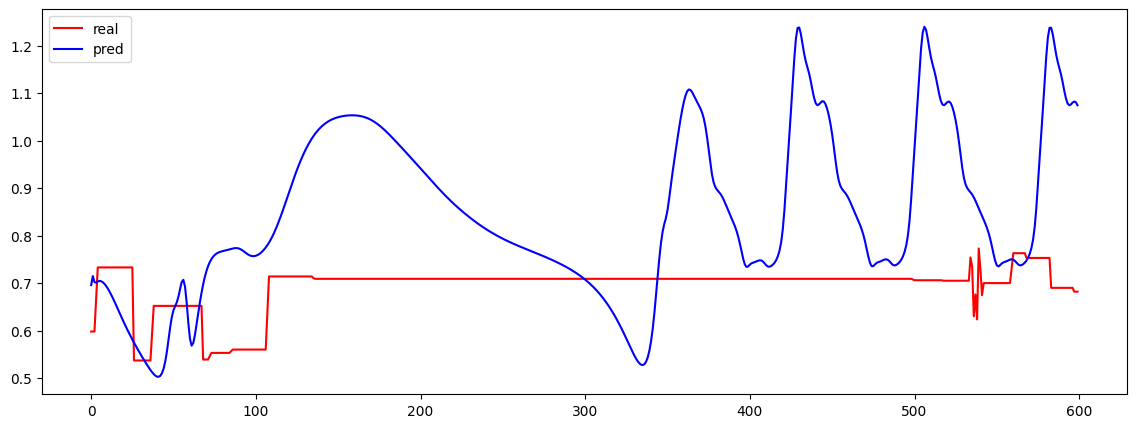

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


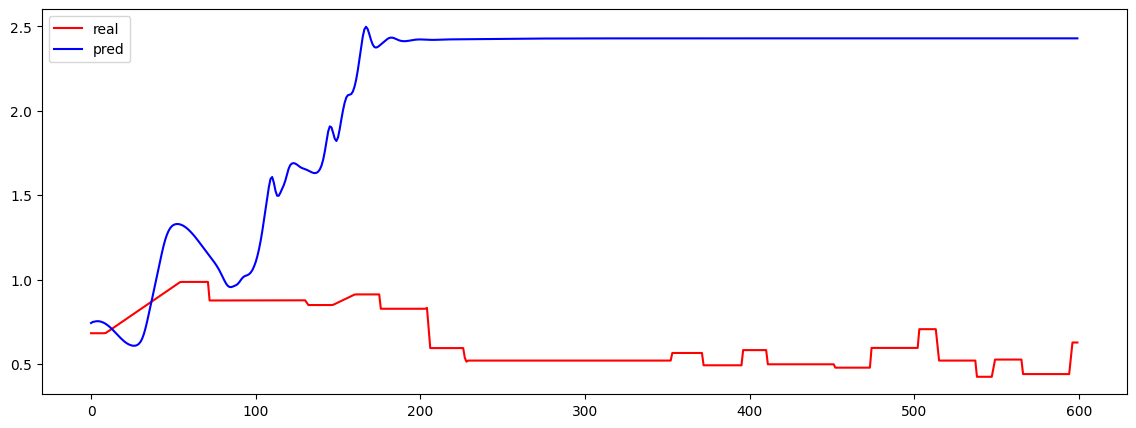

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


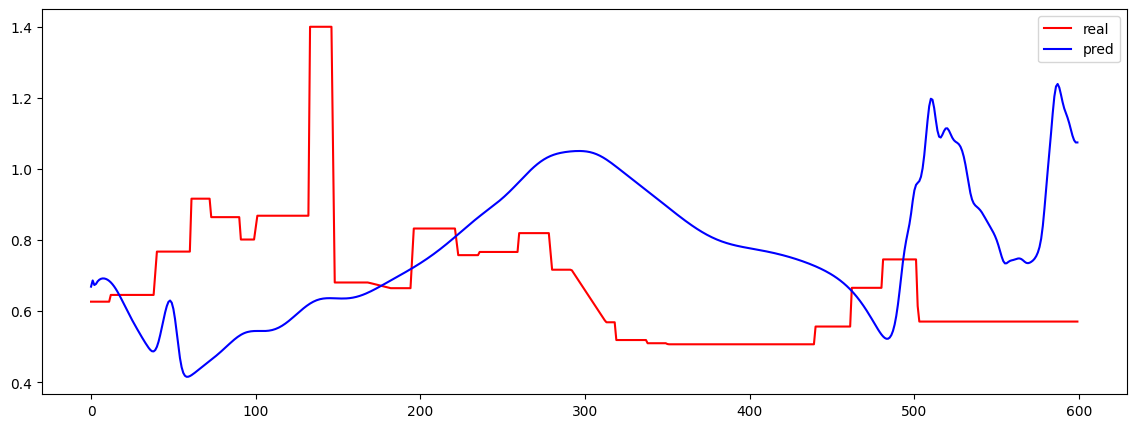

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


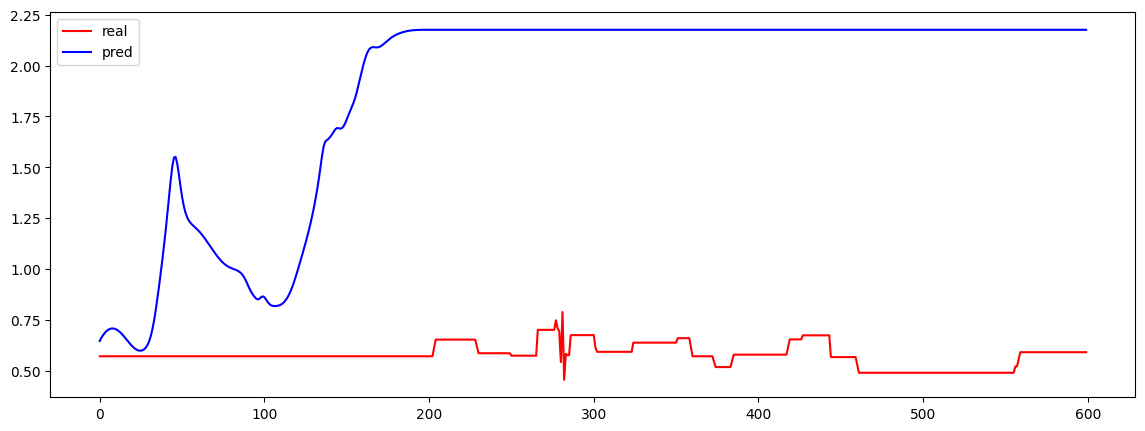

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


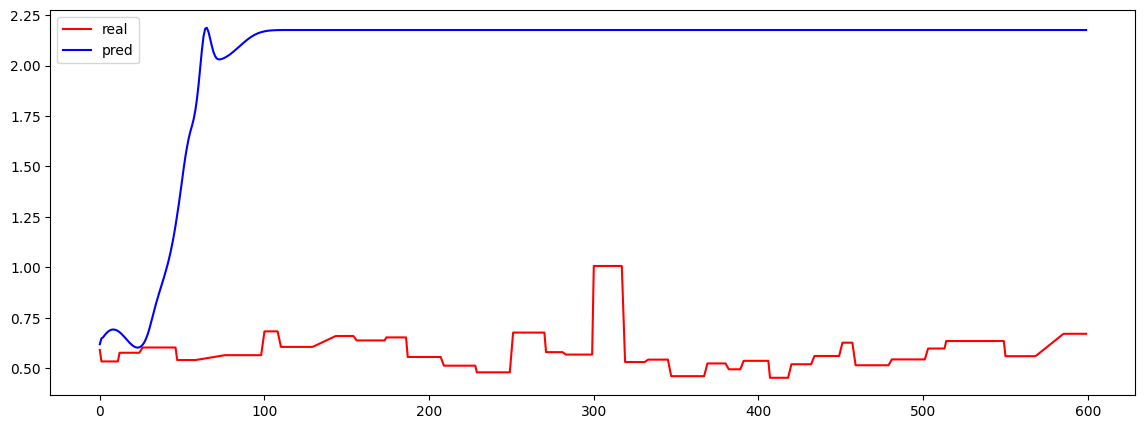

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


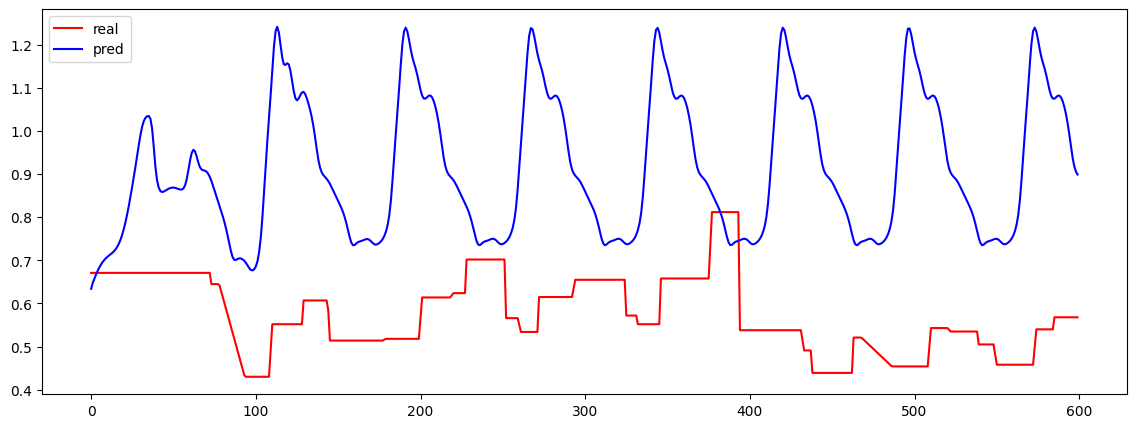

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


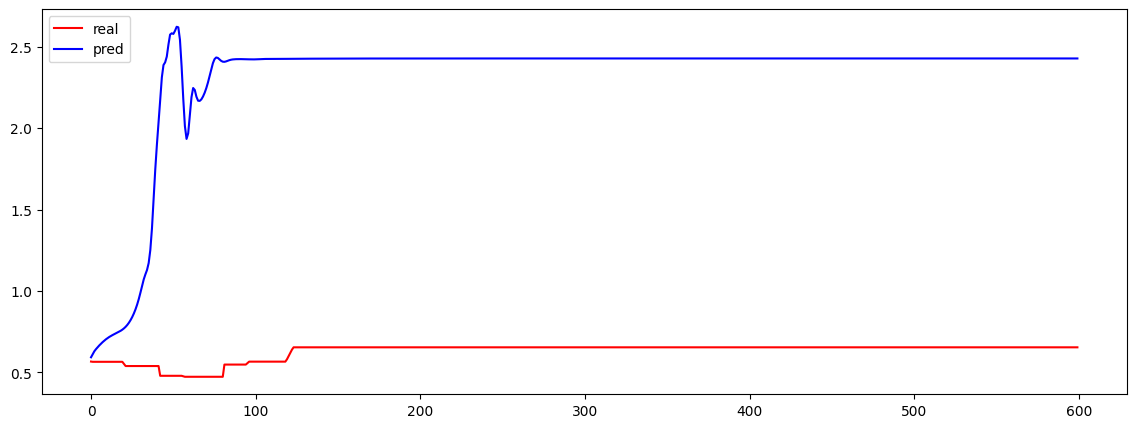

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


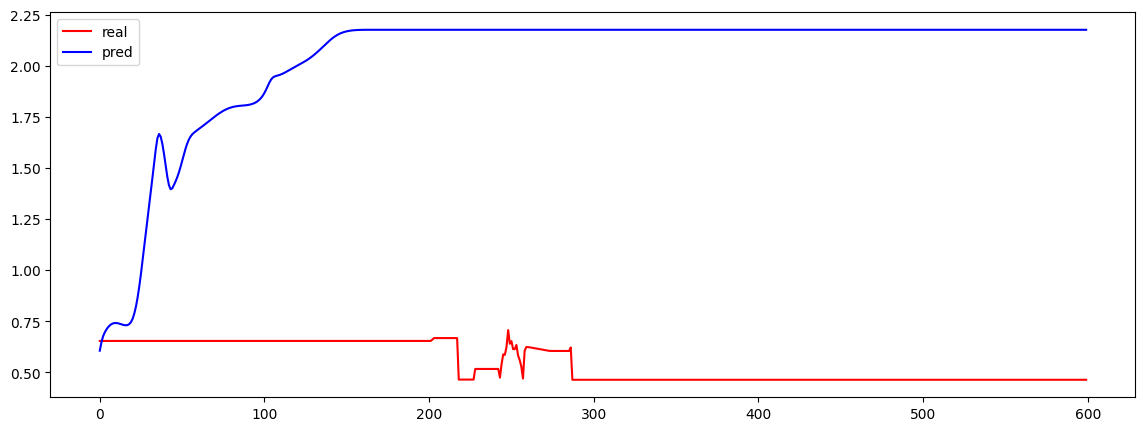

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


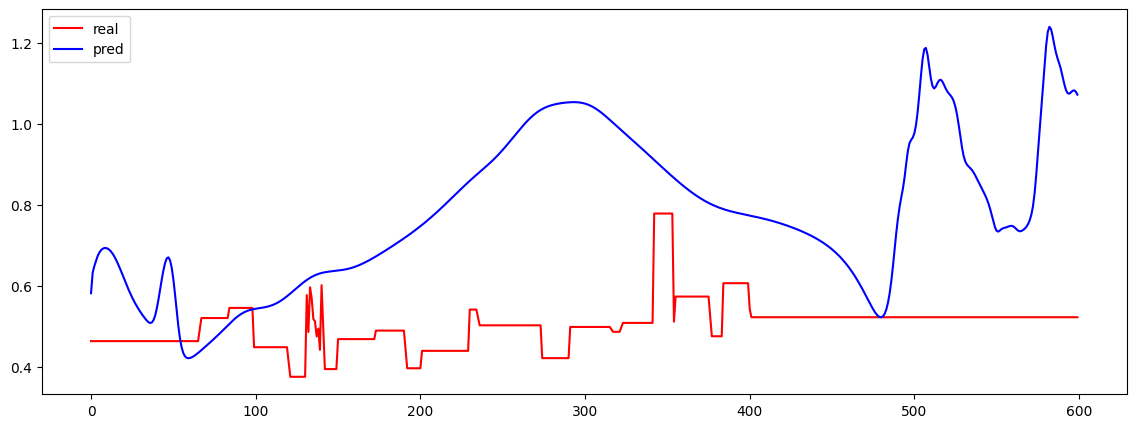

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


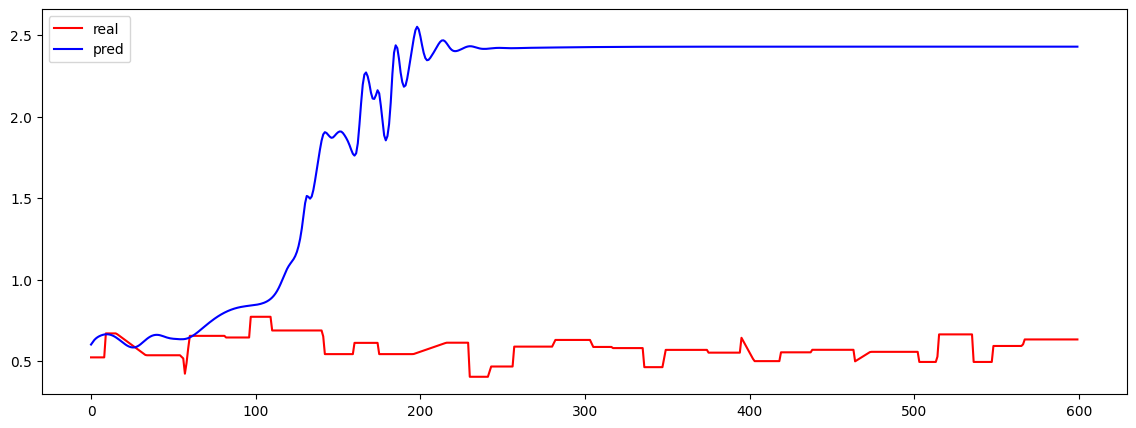

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


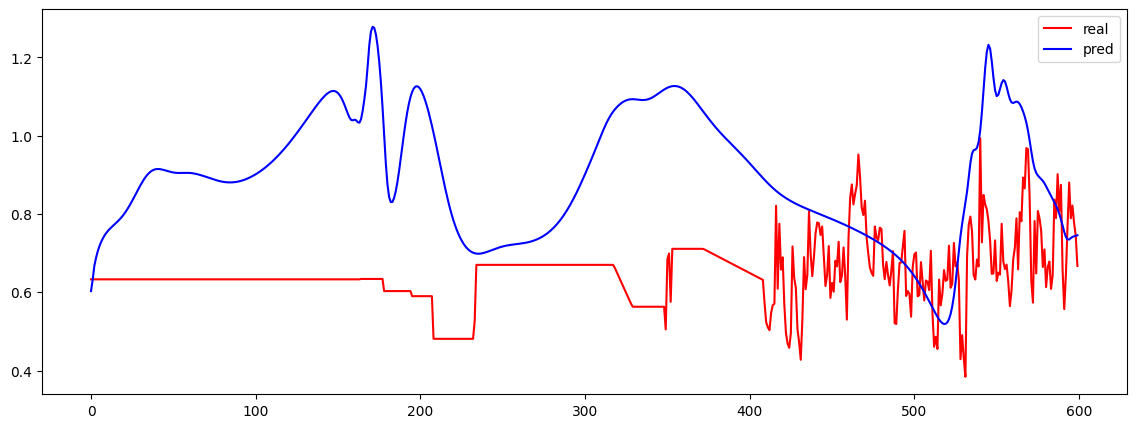

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


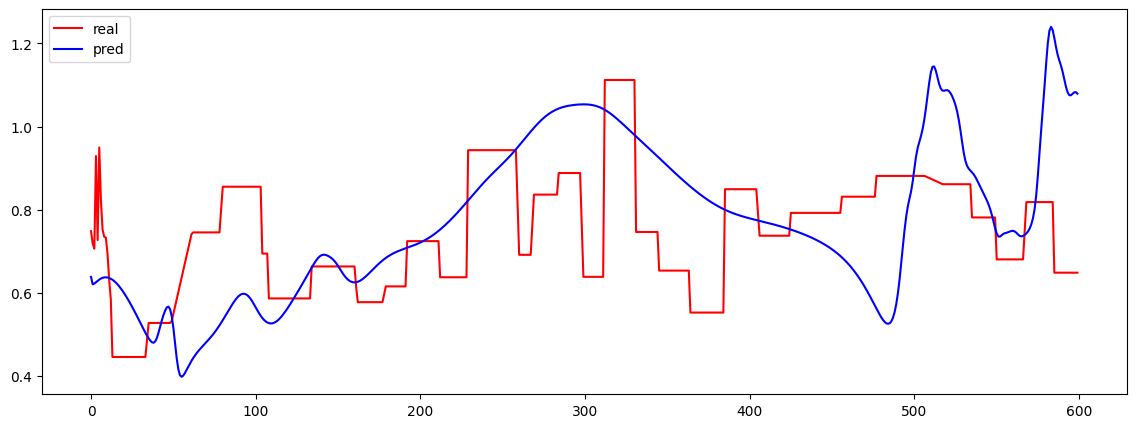

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


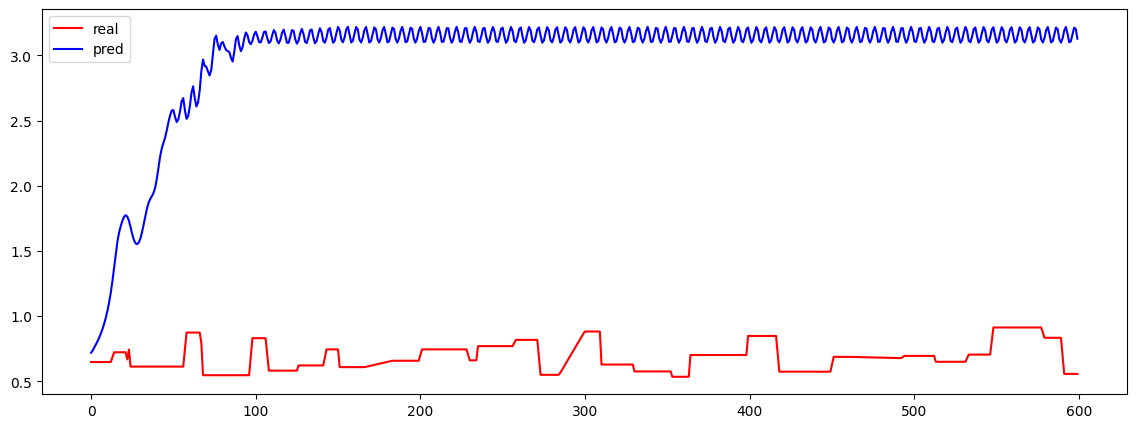

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


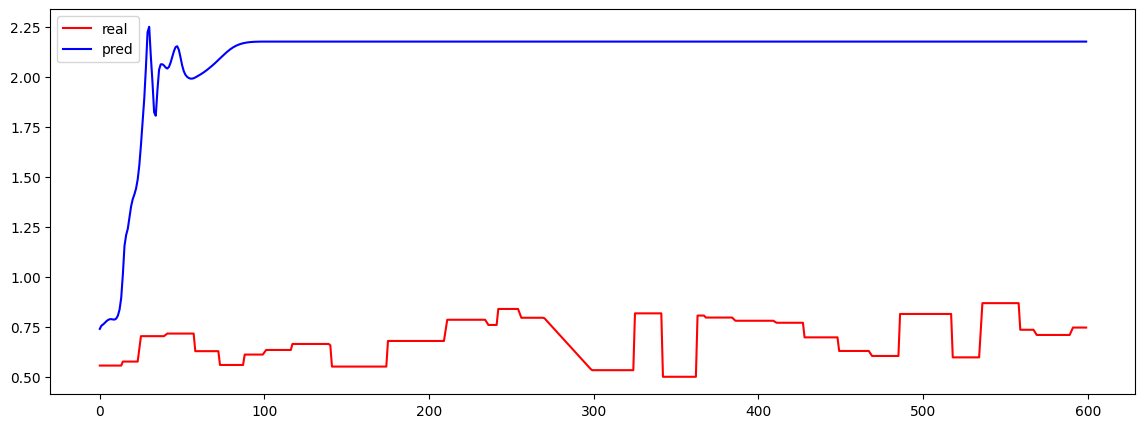

torch.Size([600, 36])
torch.Size([600, 19])
---------------
0
600


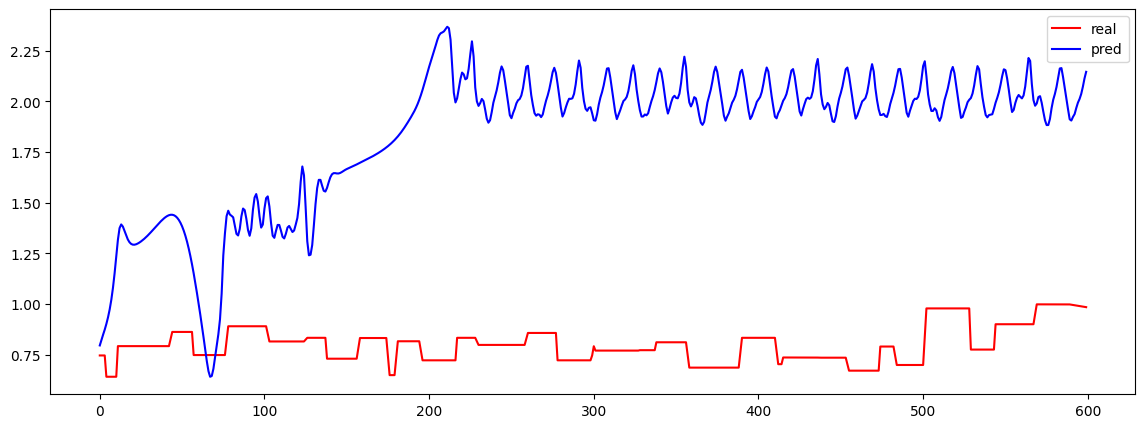

In [134]:



for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    bins_inference_model_pt(model, batch_x_test, batch_y_test)



## View all predicted Xs


In [135]:


            
            
def View_all_predicted_Xs(x_index, model, model_type='RNN', **kwargs):
 
    x_test, y_test   = kwargs['test_data']
 
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
 
    ## Plotting
    fig, ax = plt.subplots(2, 1) 
    
    ax[0].set_title(f"{model_type} TEST MSE = {0:.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, x_index]
    pred   =   pred[:, x_index]
    
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return 0, 0
    
           

            



ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


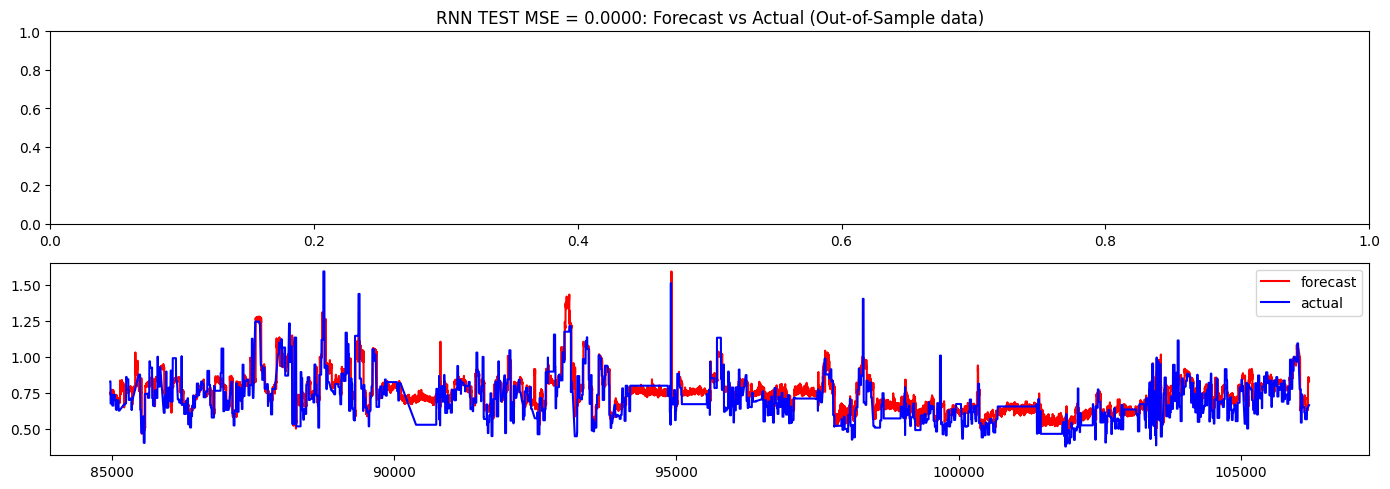

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


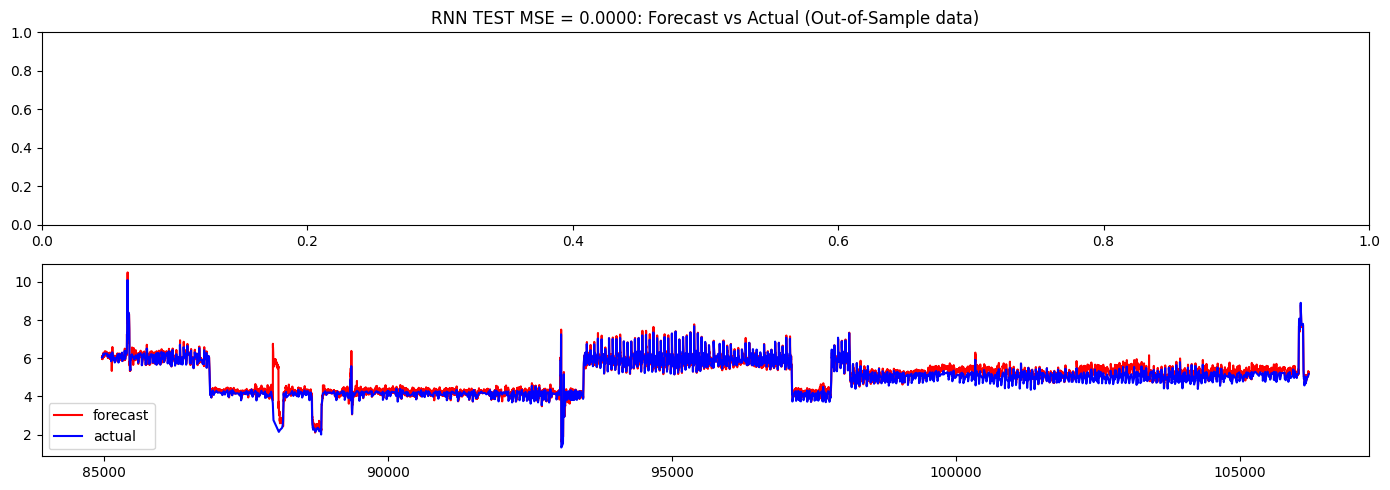

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


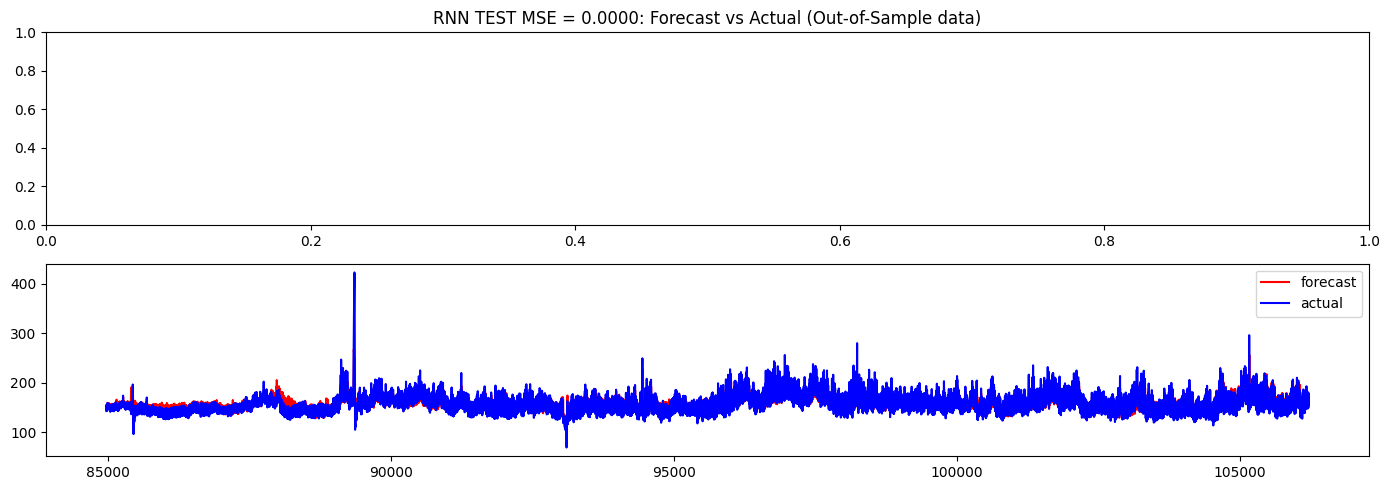

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


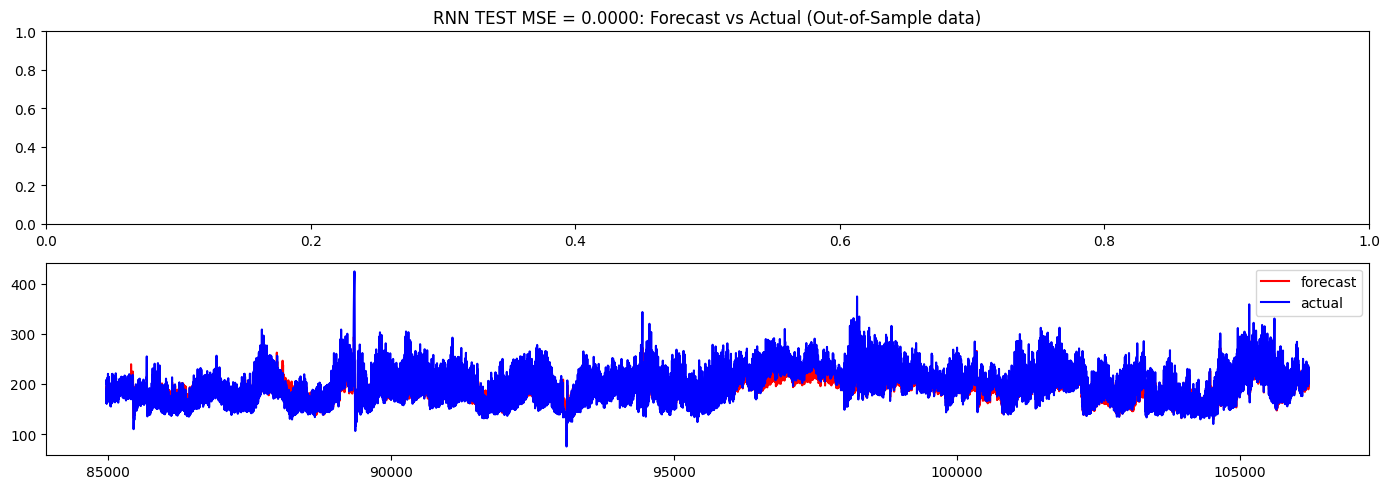

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


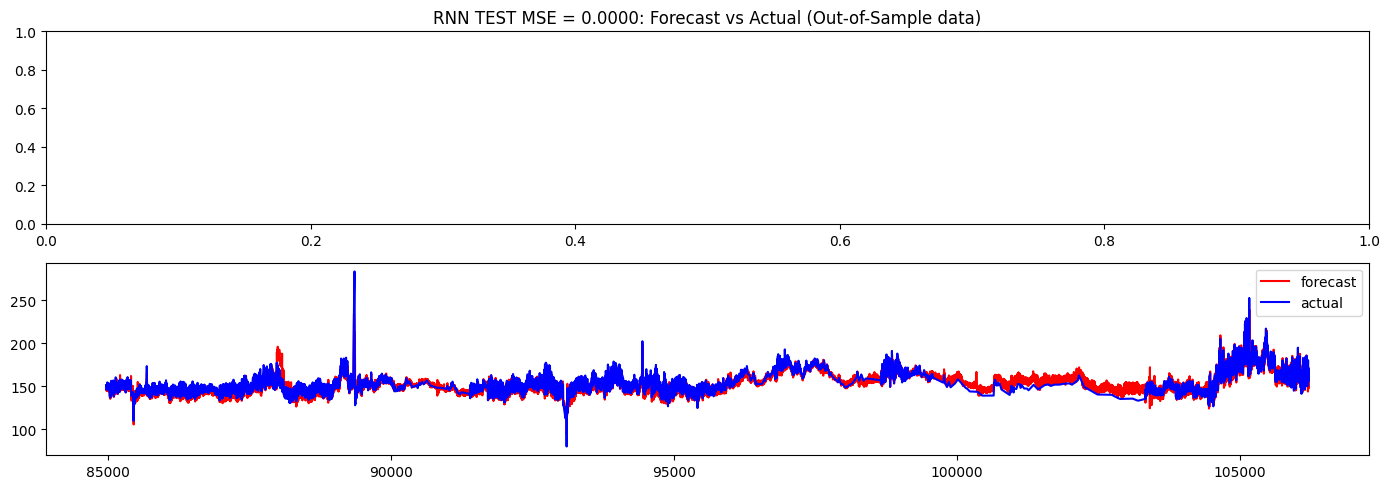

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


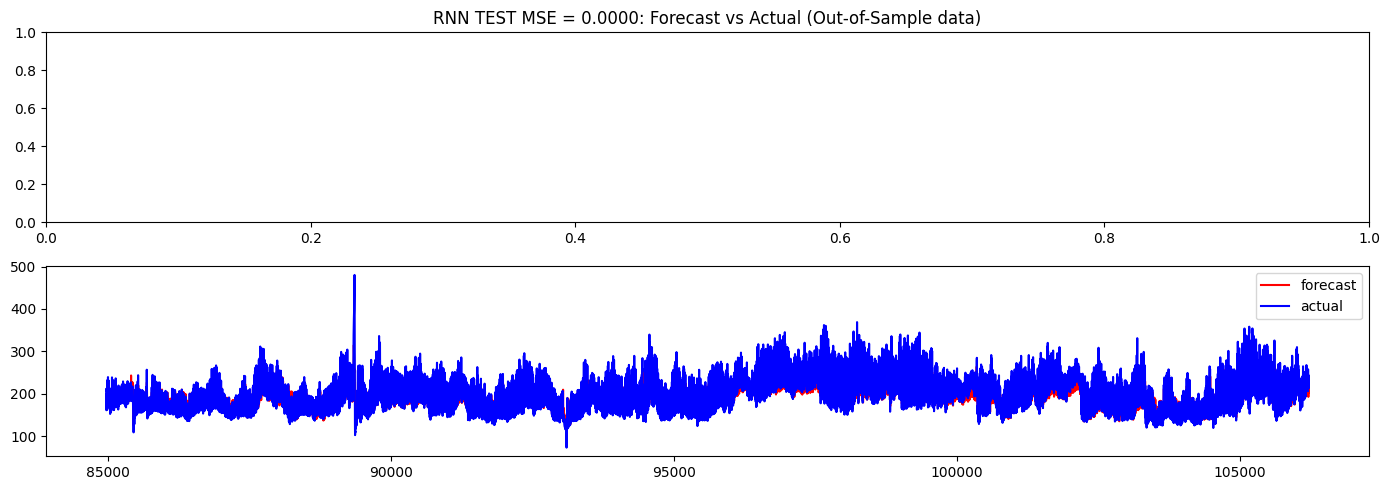

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


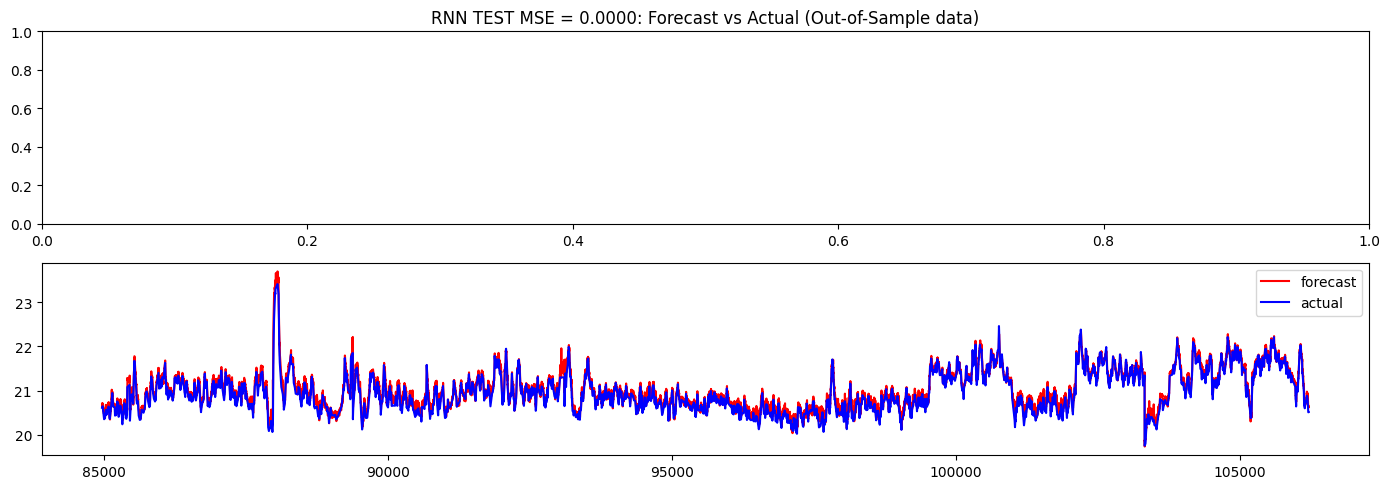

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


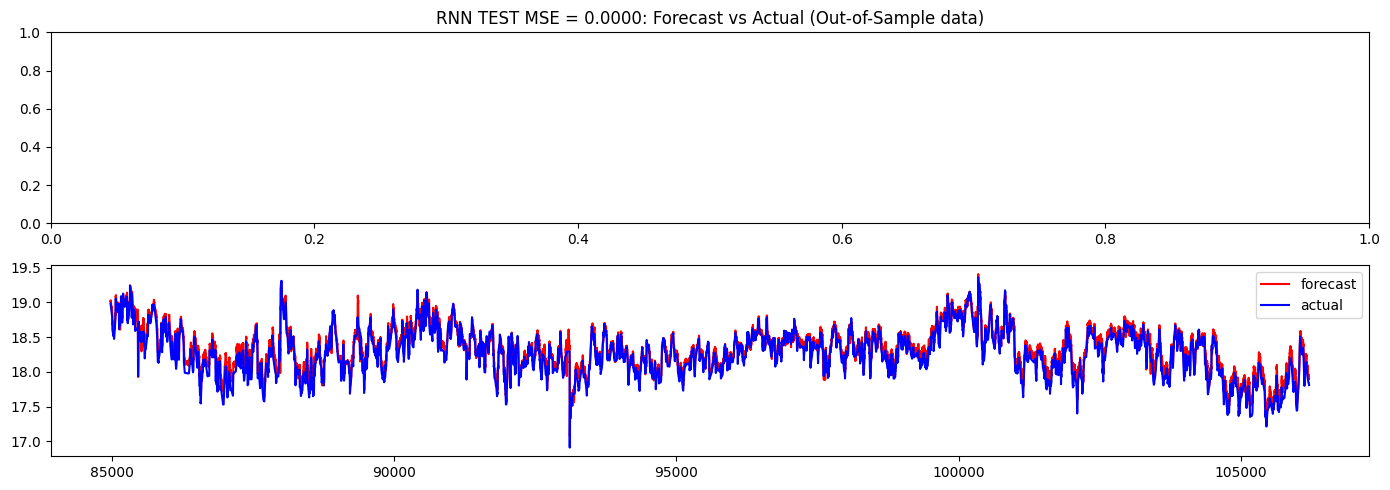

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


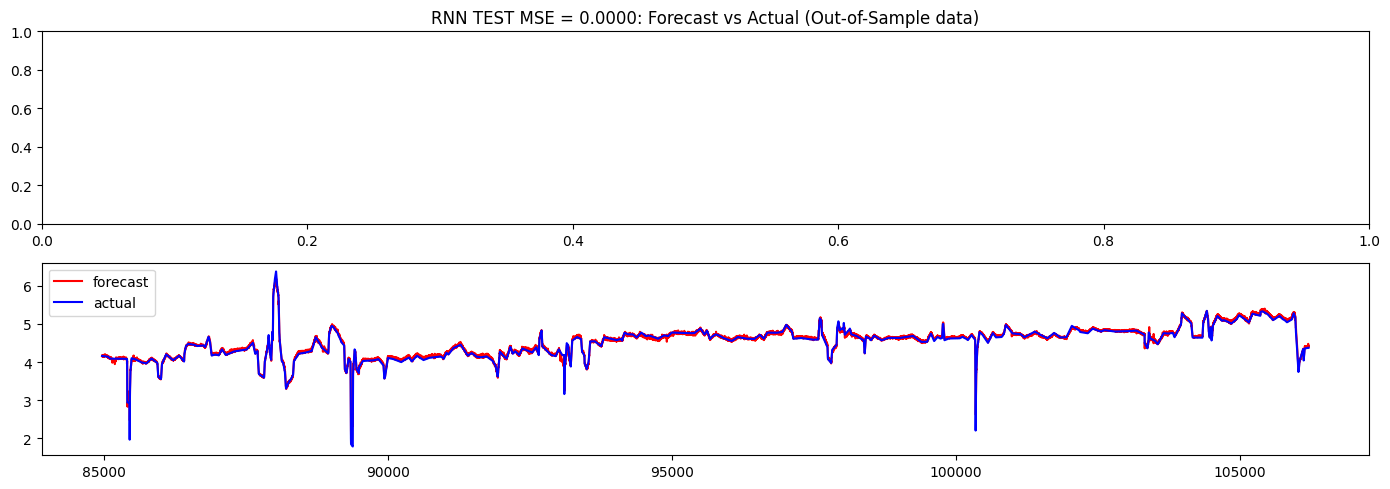

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


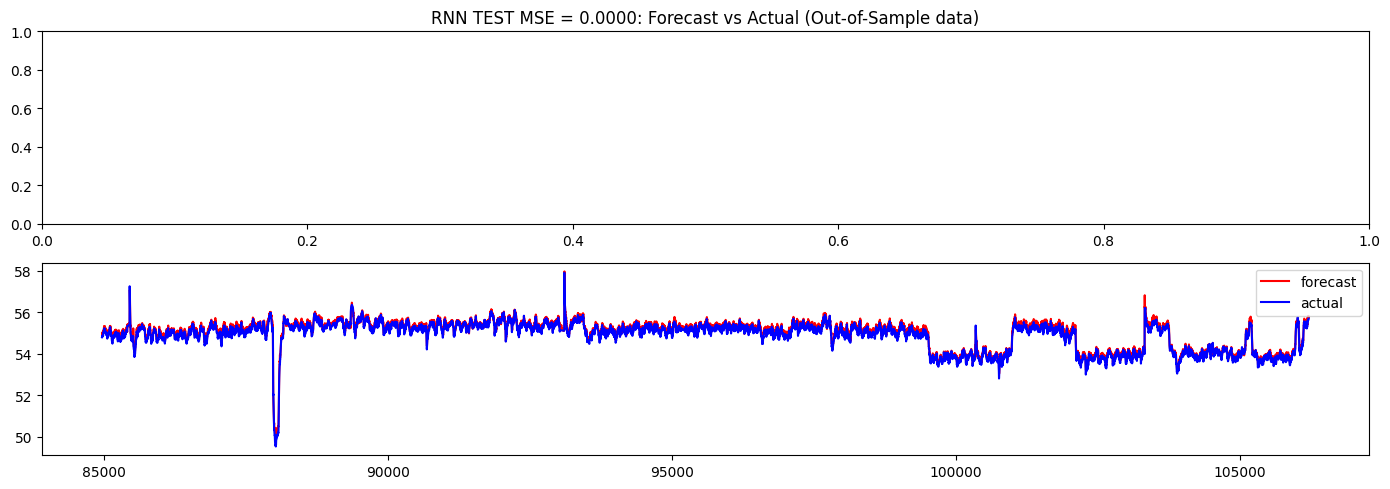

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


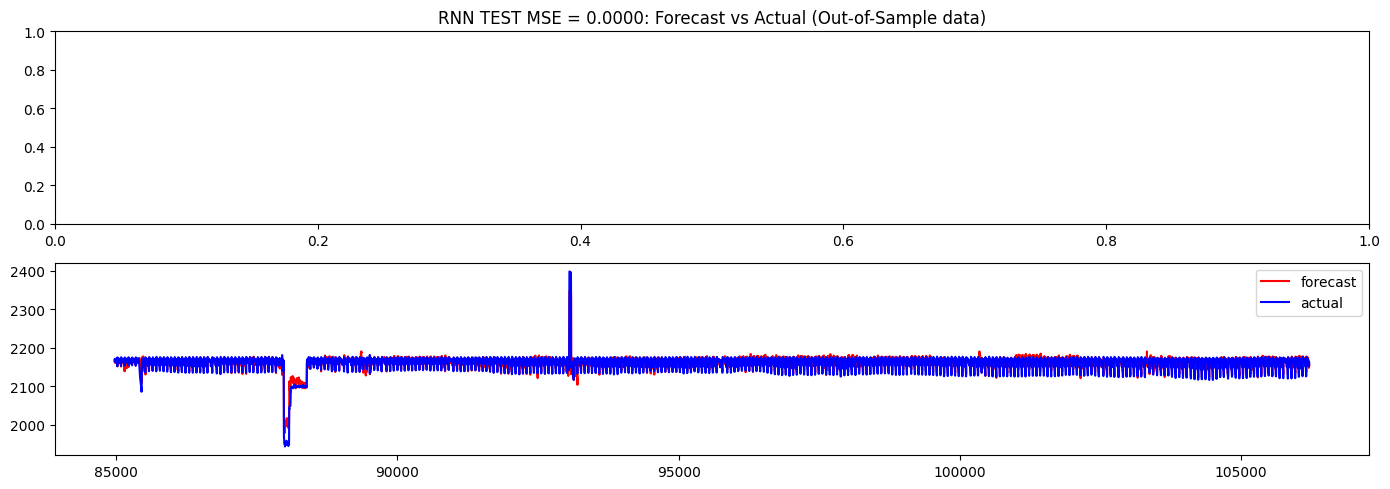

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


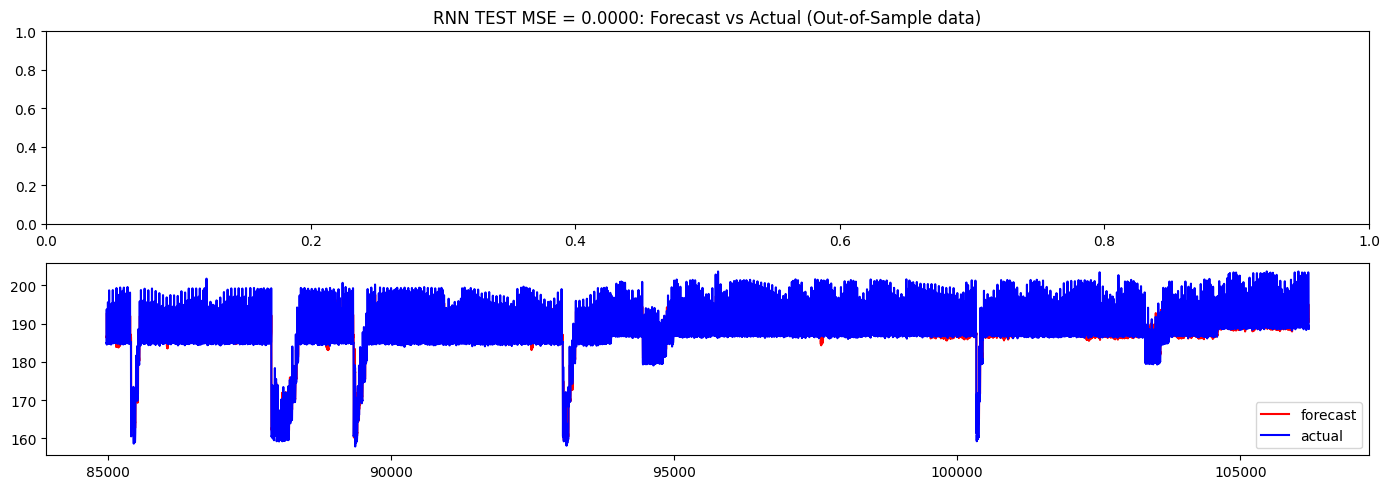

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


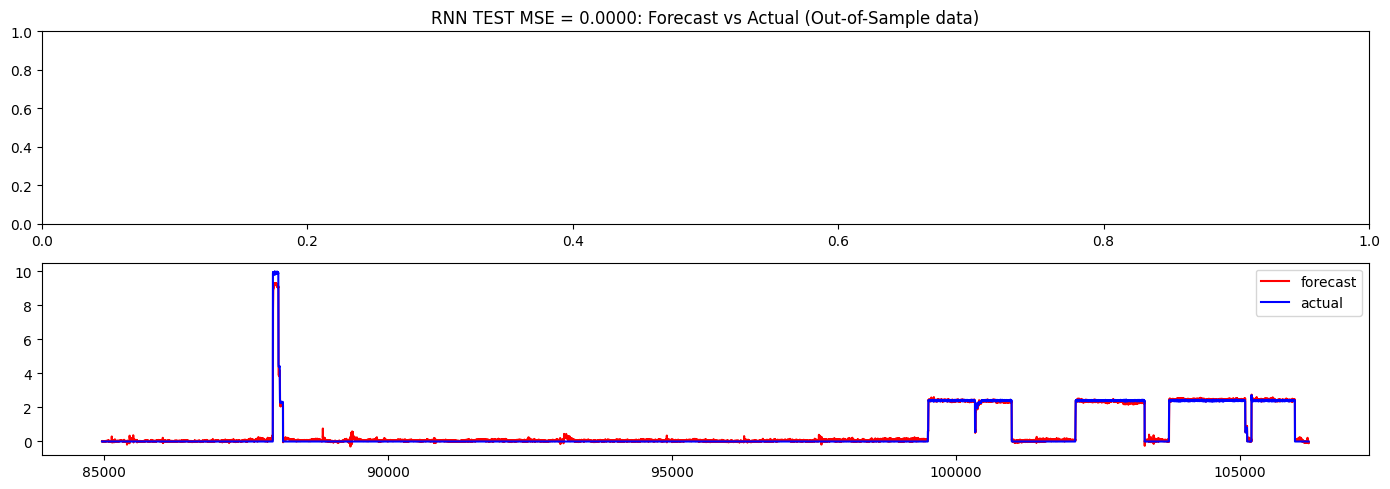

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


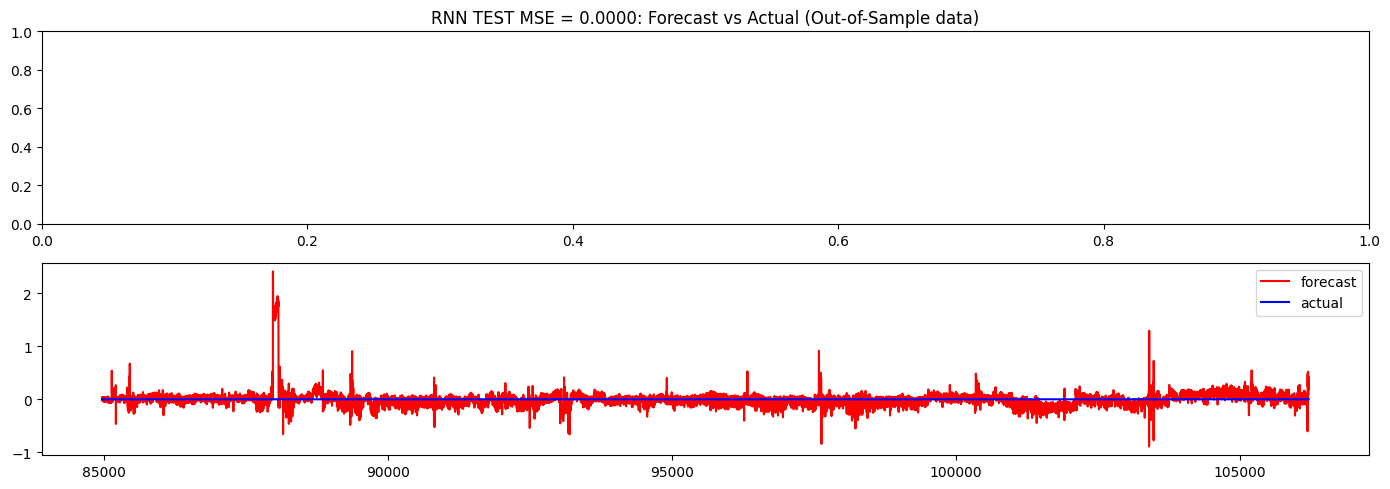

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


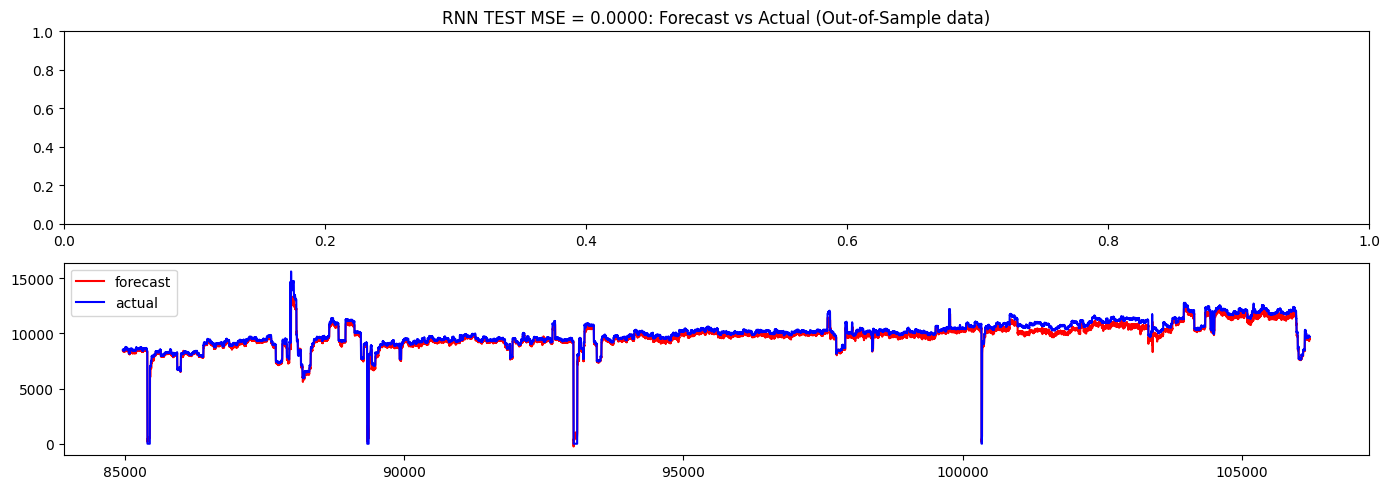

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


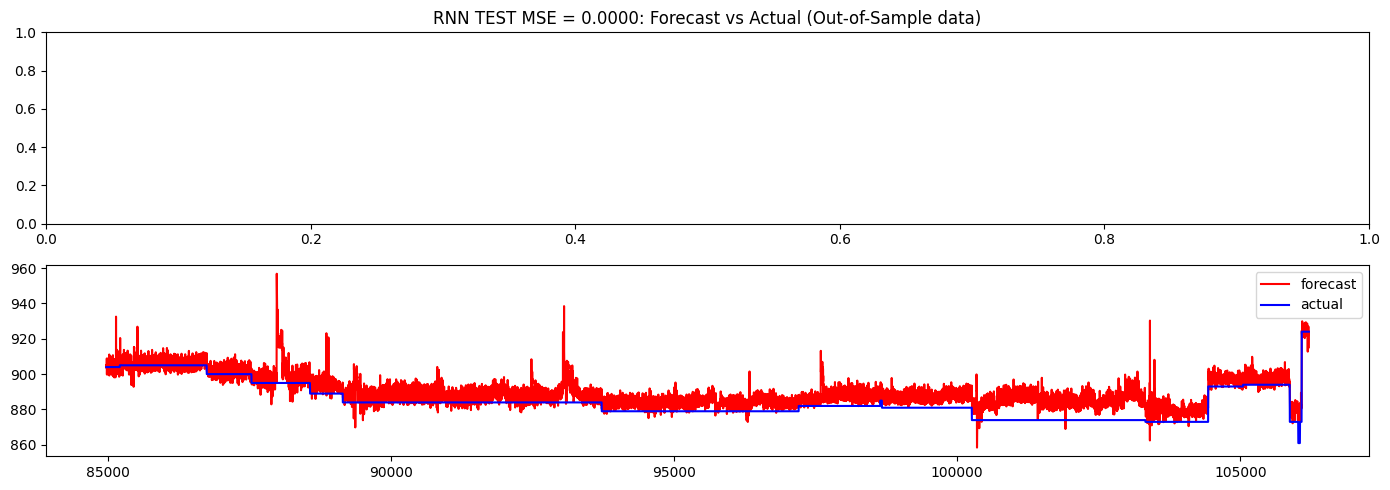

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


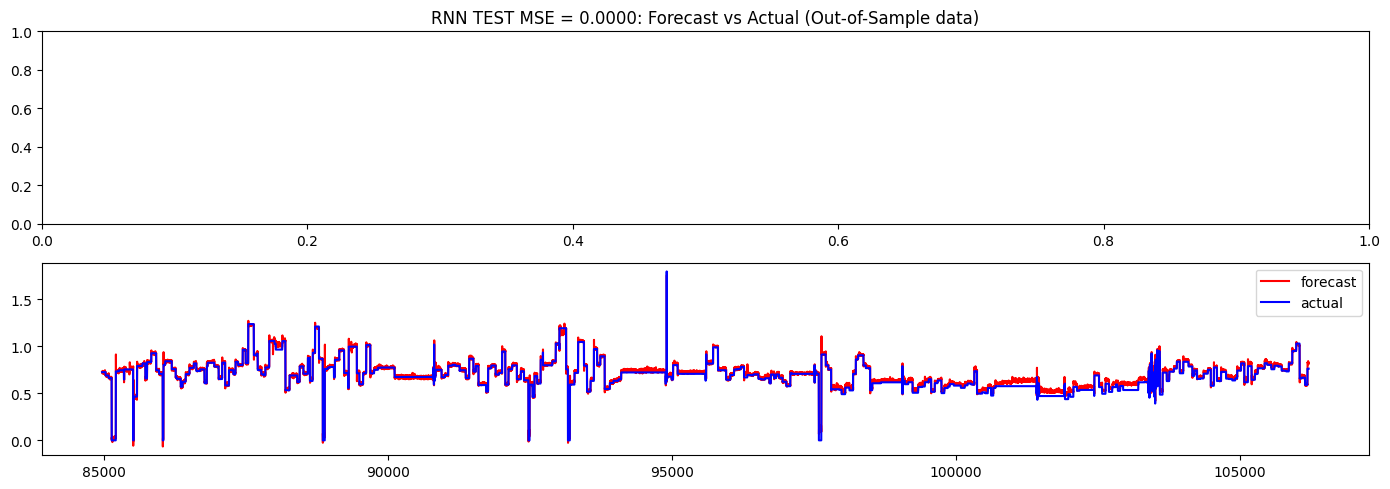

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


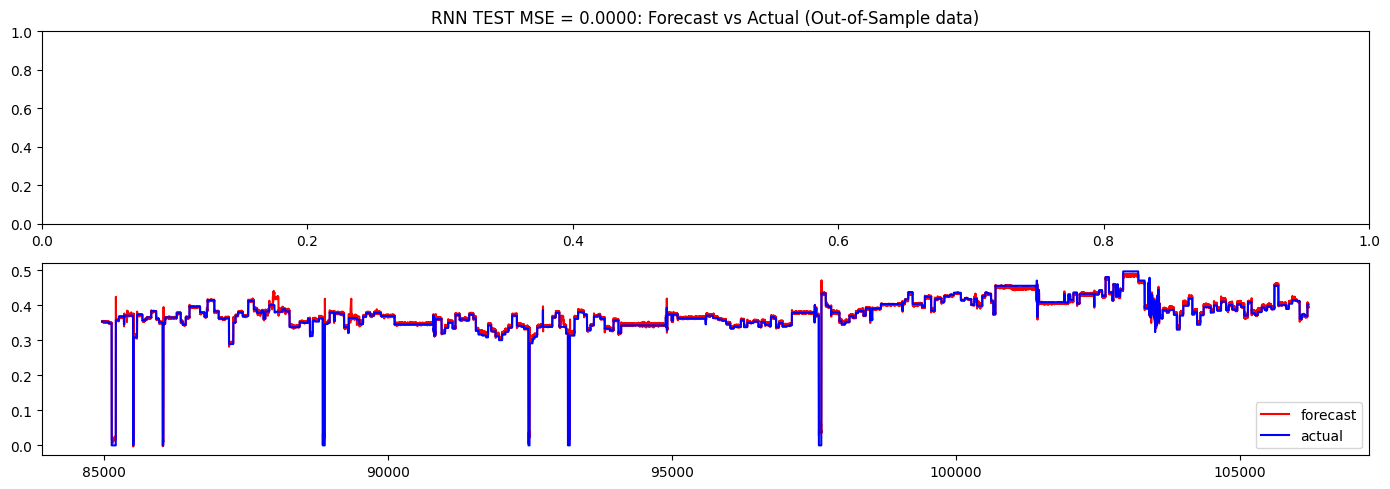

ricardo check this
torch.Size([21242, 19])
torch.Size([21242, 19])
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(55,)
(55,)
(19,)
(19,)
(21242, 19)
(1, 19)
(1, 19)
(21242, 19)
(21242, 19)


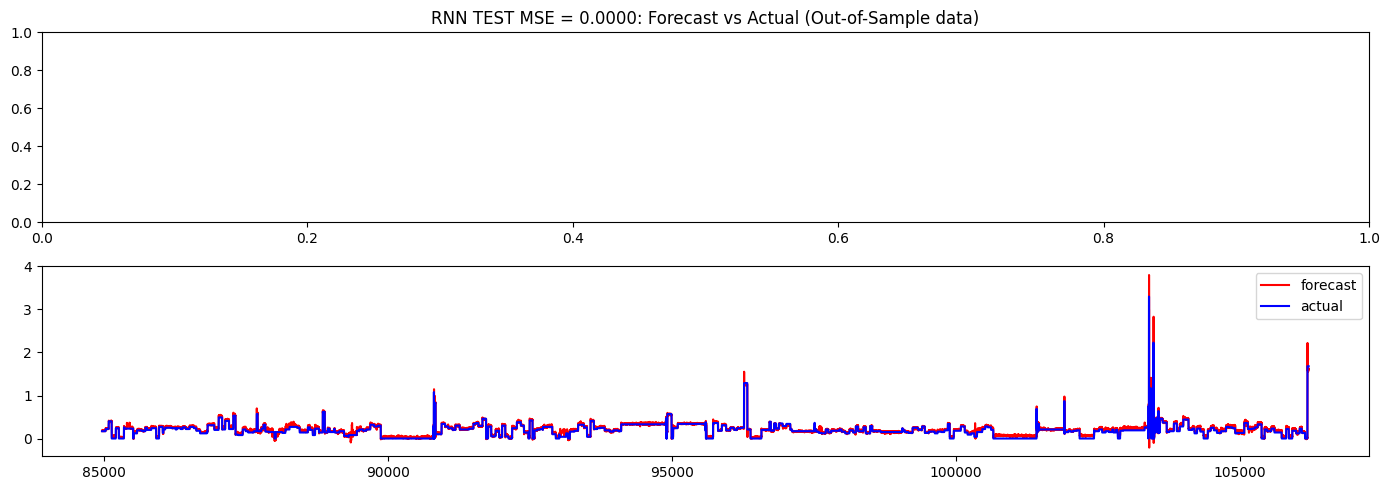

In [136]:

for i in range(19):

    x_index = i

    l1, l2 = View_all_predicted_Xs(x_index, model, model_type='RNN', **params_si )            
